# Cargar Librerias

In [ ]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm
import statsmodels.stats.outliers_influence as oi
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Cargar el dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Ruta al archivo en tu Google Drive (ajustala a la carpeta donde lo guardaste)
file_path = '/content/drive/MyDrive/TpCDN/NUEVOdataset.csv'

# Cargar dataset
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Mostrar primeras filas
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


A simple vista no notamos ningun valor nulo, fuera de formato o atipico en la primer visualizacion del dataset.

# ANALISIS EDA

## Paso 1: analisis descriptivo

In [ ]:
# Dimensiones del dataset
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

Filas: 9800, Columnas: 18


In [ ]:
# Información general de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
# Estadisticas basicas de las variables
df['Sales'].describe()

#Media = mean
#Mediana = 50%
#Desvío estándar = std

,Sales
count,9800.000000
mean,230.769059
std,626.651875
min,0.444000
25%,17.248000
50%,54.490000
75%,210.605000
max,22638.480000


Text(0.5, 1.0, 'Distribución de ventas')

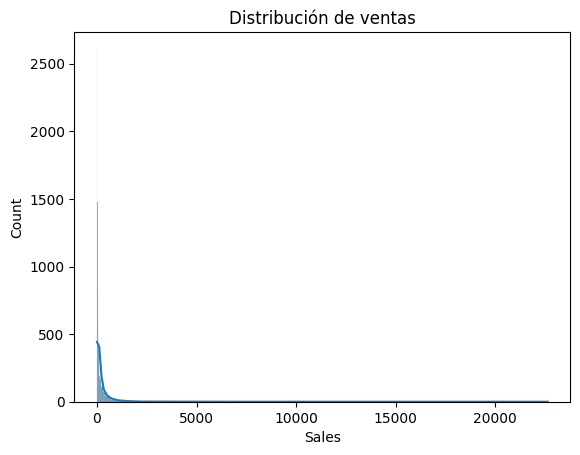

In [ ]:
sns.histplot(df['Sales'], kde=True)
plt.title("Distribución de ventas")


In [ ]:
from scipy.stats import skew, kurtosis
print("Asimetría:", skew(df['Sales']))
print("Curtosis:", kurtosis(df['Sales']))


Asimetría: 12.98149551275044
Curtosis: 304.2891692001746


La variable Sales presenta una asimetría positiva muy alta (12.98) y una curtosis excesiva (304.29), lo que indica una distribución altamente sesgada hacia la derecha y con presencia de valores atípicos extremos.

Esto significa que la mayoría de las ventas son bajas o medias, mientras que unas pocas órdenes con montos muy elevados elevan el promedio general. La distribución es hiper-leptocúrtica, dominada por picos concentrados y colas largas de outliers.

En consecuencia, la media no representa adecuadamente el comportamiento típico de las ventas, por lo que conviene analizar mediana y percentiles. Además, modelos sensibles a valores extremos (como regresión lineal o SVR) pueden sobreajustarse; se recomienda transformar la variable objetivo (por ejemplo, con log1p) y gestionar outliers antes de entrenar los modelos.

**Analisis de variables categoricas**

In [ ]:
# Lista de columnas categóricas a analizar
categorical_columns = [
    'Order ID', 'Ship Mode', 'Segment', 'Country', 'State',
    'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name'
]

# Análisis de valores únicos y conteos para cada variable categórica
for col in categorical_columns:
    print(f"\n# 🔹 {col}")
    print(f"\n🔸 {col} únicos:")
    print(df[col].unique())
    print(f"\n📊 Cantidad de registros por {col}:")
    print(df[col].value_counts())
    print("\n" + "-"*80)



# 🔹 Order ID

🔸 Order ID únicos:
['CA-2017-152156' 'CA-2017-138688' 'US-2016-108966' ... 'CA-2015-127166'
 'CA-2017-125920' 'CA-2016-128608']

📊 Cantidad de registros por Order ID:
Order ID
CA-2018-100111    14
CA-2018-157987    12
CA-2017-165330    11
US-2017-108504    11
CA-2017-105732    10
                  ..
US-2016-110261     1
CA-2016-125710     1
US-2016-137960     1
CA-2016-124975     1
CA-2016-142202     1
Name: count, Length: 4922, dtype: int64

--------------------------------------------------------------------------------

# 🔹 Ship Mode

🔸 Ship Mode únicos:
['Second Class' 'Standard Class' 'First Class' 'Same Day']

📊 Cantidad de registros por Ship Mode:
Ship Mode
Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: count, dtype: int64

--------------------------------------------------------------------------------

# 🔹 Segment

🔸 Segment únicos:
['Consumer' 'Corporate' 'Home Office']

📊 Cantidad de registros por Segment:
Se

## Paso 2: Ajuste de tipos de variables


In [ ]:
#pasar Postal Code de float a object, ya que segun su escala de medicion es una variable categorica ordinal.
df['Postal Code'] = df['Postal Code'].astype(object)

In [ ]:
# Información general de las columnas con dato cambiado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   object 
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
# Análisis de valores únicos y conteos para la nueva variable categórica
colu1 = 'Postal Code'  #  definí aquí el nombre exacto de la columna a analizar

print(f"\n# 🔹 {colu1}")
print(f"\n🔸 {colu1} únicos: {df[colu1].nunique()}")  # cantidad de valores únicos
print(f"\n📋 Lista de valores únicos:")
print(df[colu1].unique())
print(f"\n📊 Cantidad de registros por {colu1}:")
print(df[colu1].value_counts())



# 🔹 Postal Code

🔸 Postal Code únicos: 626

📋 Lista de valores únicos:
[42420.0 90036.0 33311.0 90032.0 28027.0 98103.0 76106.0 53711.0 84084.0
 94109.0 68025.0 19140.0 84057.0 90049.0 77095.0 75080.0 77041.0 60540.0
 32935.0 55122.0 48185.0 19901.0 47150.0 10024.0 12180.0 90004.0 60610.0
 85234.0 22153.0 10009.0 49201.0 38109.0 77070.0 35601.0 94122.0 27707.0
 60623.0 29203.0 55901.0 55407.0 97206.0 55106.0 80013.0 28205.0 60462.0
 10035.0 50322.0 43229.0 37620.0 19805.0 61701.0 85023.0 95661.0 64055.0
 91104.0 43055.0 53132.0 85254.0 95123.0 98105.0 98115.0 73034.0 90045.0
 19134.0 88220.0 78207.0 77036.0 62521.0 71203.0 6824.0 75051.0 92374.0
 45011.0 7090.0 19120.0 44312.0 80219.0 75220.0 37064.0 90604.0 48601.0
 44256.0 43017.0 48227.0 38401.0 33614.0 95051.0 55044.0 92037.0 77506.0
 94513.0 27514.0 7960.0 45231.0 94110.0 90301.0 33319.0 80906.0 7109.0
 48180.0 8701.0 22204.0 80004.0 7601.0 33710.0 19143.0 90805.0 92345.0
 37130.0 84041.0 78745.0 1852.0 31907.0 6040.0 78550.0 857

In [ ]:
df.drop('Row ID',axis = 1, inplace = True) # Dropeamos columna Row ID
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y') # convertimos orderDate a formato datetime
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')   # convertimos shipDate a formato datetime

In [ ]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
#Esto me va a servir cuando haga las series de tiempo (no lo voy a usar hasta ese momento)
df_SeriesDeTiempo = df.copy()


In [ ]:
# ordenamos los datos por fecha (mas antiguo a mas reciente)
df.sort_values(by=['Order Date'], inplace=True, ascending=True)

## Paso 3: Detección y Tratamiento de Datos Ausentes

In [ ]:
# Revisión de valores nulos
df.isnull().sum()

,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0
State,0


Como los datos ausentes de codigo postal tienen una ciudad correspondiente, optamos por no eliminarlos y agregarles el codigo postal correspondiente (mediante el tratamiento por imputacion de valor atribuido).

In [ ]:
df[df['Postal Code'].isnull()]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
5274,CA-2016-162887,2016-11-07,2016-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
9741,CA-2016-117086,2016-11-08,2016-11-12,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",4404.90
9146,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9148,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9147,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
8798,US-2017-150140,2017-04-06,2017-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9388,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04
9387,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9386,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92


Notamos que el codigo postal esta ausente solo para registros pertenecientes a la "City": "Burlington".

In [ ]:
df['Postal Code'] = df['Postal Code'].fillna(5401) # Le agregamos el codigo postal de la ciudad "Burlington".

/tmp/ipython-input-1315482715.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Postal Code'] = df['Postal Code'].fillna(5401) # Le agregamos el codigo postal de la ciudad "Burlington".


In [ ]:
print(df.isnull().sum())

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64


## Paso 4: Identificación de Outliers

Generamos gráficos de tipo boxplot para identificar visualmente posibles valores atípicos en Sales (unica variable numerica)

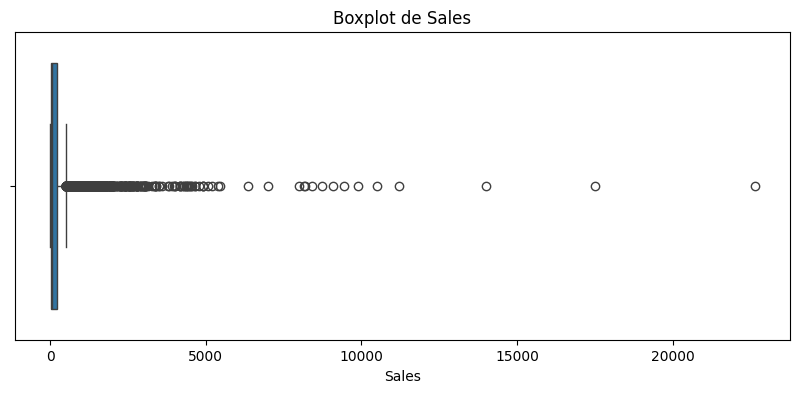

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Sales'])
plt.title("Boxplot de Sales")
plt.show()

Aplicamos el método del rango intercuartílico (IQR) para detectar y cuantificar de manera objetiva los outliers presentes

In [ ]:
col = 'Sales'

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
perc_outliers = len(outliers) / len(df) * 100

print(f"Porcentaje de outliers en {col}: {perc_outliers:.2f}%")

print(f"{col} - Outliers encontrados: {len(outliers)}")

Porcentaje de outliers en Sales: 11.68%
Sales - Outliers encontrados: 1145


Vamos a generar una columna transformada con (log1p) para comprimir la escala de los outliers sin eliminarlos, mejorando la estabilidad y desempeño de los modelos que vamos a usar, mientras que los datos originales permanecen disponibles para interpretacion.

**Este paso se aplicara al finalizar el EDA, antes de empezar con el modelado de datos.**

## Paso 5: Análisis Preliminar y Examinación de Relaciones entre Variables


**Buscamos a los clientes mas valiosos**


Los clientes mas valiosos son los mas rentables para la empresa


Son los que mas compran o los que compran productos mas caros que el cliente promedio

In [ ]:
Top_customers = df.groupby("Customer Name")["Sales"] \
                  .sum() \
                  .sort_values(ascending=False) \
                  .head(20) \
                  .round(2) \
                  .reset_index()

Top_customers

,Customer Name,Sales
0,Sean Miller,25043.05
1,Tamara Chand,19052.22
2,Raymond Buch,15117.34
3,Tom Ashbrook,14595.62
4,Adrian Barton,14473.57
5,Ken Lonsdale,14175.23
6,Sanjit Chand,14142.33
7,Hunter Lopez,12873.30
8,Sanjit Engle,12209.44
9,Christopher Conant,12129.07


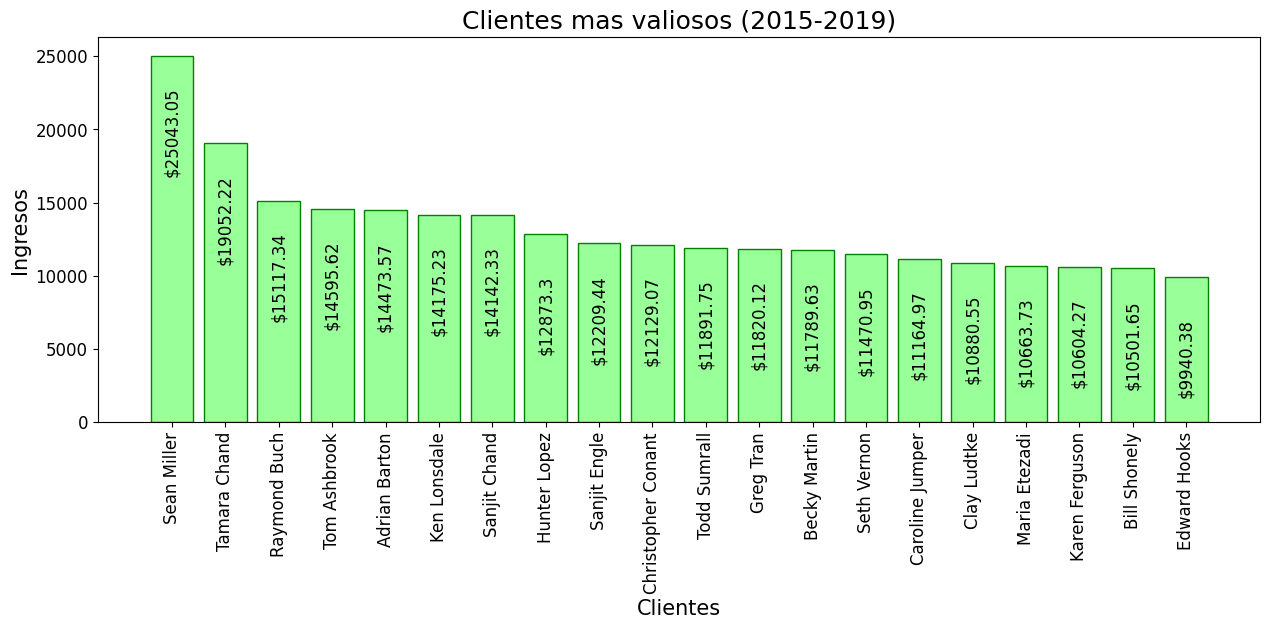

In [ ]:
plt.figure(figsize = (15,5))
plt.title("Clientes mas valiosos (2015-2019)", fontsize=18)
plt.bar(Top_customers["Customer Name"], Top_customers["Sales"],color= '#99ff99',edgecolor='green', linewidth = 1)
plt.xlabel("Clientes",fontsize=15)
plt.ylabel("Ingresos",fontsize=15)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in Top_customers["Sales"].items():
    plt.text(k,v-8000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');

**Buscamos que estados tienen/generan la mayor ganancia**

In [ ]:
Top_states = df.groupby("State")["Sales"] \
               .sum() \
               .sort_values(ascending=False) \
               .head(20) \
               .round(2) \
               .reset_index()
Top_states


,State,Sales
0,California,446306.46
1,New York,306361.15
2,Texas,168572.53
3,Washington,135206.85
4,Pennsylvania,116276.65
5,Florida,88436.53
6,Illinois,79236.52
7,Michigan,76136.07
8,Ohio,75130.35
9,Virginia,70636.72


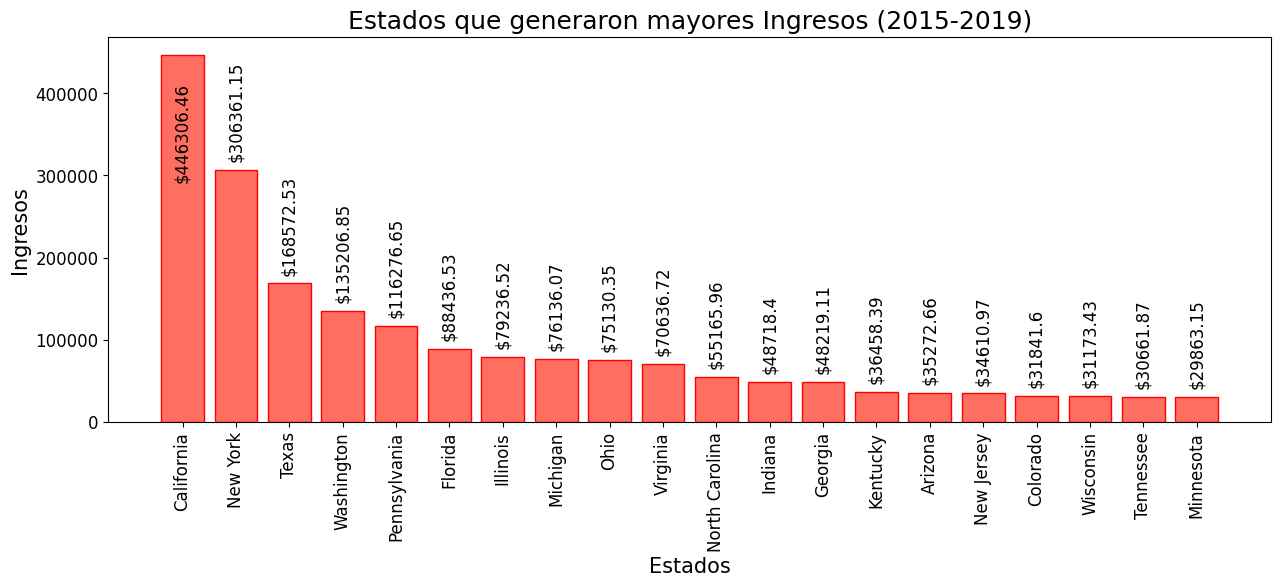

In [ ]:
plt.figure(figsize = (15,5))
plt.title("Estados que generaron mayores Ingresos (2015-2019)", fontsize=18)
plt.bar(Top_states["State"], Top_states["Sales"],color= '#FF6F61',edgecolor='Red', linewidth = 1)
plt.xlabel("Estados",fontsize=15)
plt.ylabel("Ingresos",fontsize=15)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in Top_states["Sales"].items():
    if v>400000:
        plt.text(k,v-150000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');
    else:
        plt.text(k,v+15000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');


**Buscamos que ciudades generaron mayor ganancia**

In [ ]:
Top_cities = df.groupby("City")["Sales"] \
               .sum() \
               .sort_values(ascending=False) \
               .head(20) \
               .round(2) \
               .reset_index()

Top_cities

,City,Sales
0,New York City,252462.55
1,Los Angeles,173420.18
2,Seattle,116106.32
3,San Francisco,109041.12
4,Philadelphia,108841.75
5,Houston,63956.14
6,Chicago,47820.13
7,San Diego,47521.03
8,Jacksonville,44713.18
9,Detroit,42446.94


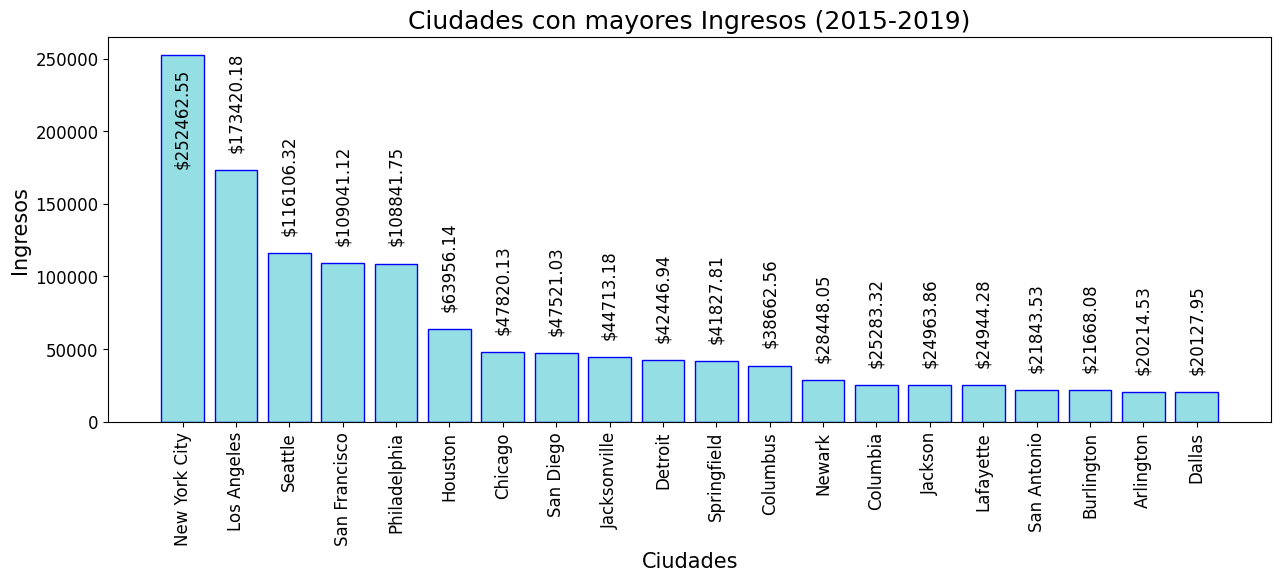

In [ ]:
plt.figure(figsize = (15,5))
plt.title("Ciudades con mayores Ingresos (2015-2019)", fontsize=18)
plt.bar(Top_cities["City"], Top_cities["Sales"],color= '#95DEE3',edgecolor='blue', linewidth = 1)
plt.xlabel("Ciudades",fontsize=15)
plt.ylabel("Ingresos",fontsize=15)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in Top_cities["Sales"].items():
    if v>250000:
        plt.text(k,v-75000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');
    else:
        plt.text(k,v+15000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');

**Ganancia generada por categoria**

In [ ]:
# Agrupar por Category y sumar solo Sales
Top_category = df.groupby("Category")["Sales"] \
                 .sum() \
                 .sort_values(ascending=False) \
                 .to_frame()  # Convertimos a dataframe

# Calcular el total de ventas por categoría
total_revenue_category = Top_category["Sales"].sum()
total_revenue_category_str = '$' + str(int(total_revenue_category))  # Convertir a int y agregar '$'

# Resetear índice para tener Category como columna normal
Top_category.reset_index(inplace=True)

Top_category, total_revenue_category_str


(          Category        Sales
 0       Technology  827455.8730
 1        Furniture  728658.5757
 2  Office Supplies  705422.3340,
 '$2261536')

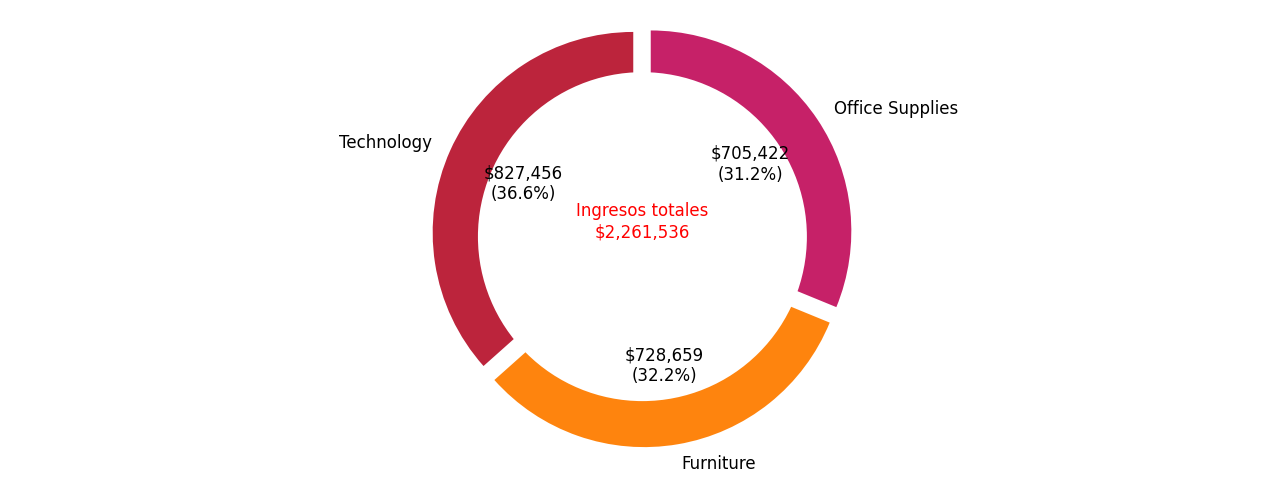

In [ ]:
# 🔹 Agrupar por categoría y sumar las ventas
Top_category = df.groupby("Category")["Sales"] \
    .sum() \
    .sort_values(ascending=False) \
    .to_frame() \
    .reset_index()

# 🔹 Calcular total de ventas por categoría
total_revenue_category = Top_category["Sales"].sum()

# --- Gráfico tipo donut con monto + porcentaje ---
plt.rcParams["figure.figsize"] = (13,5)
plt.rcParams['font.size'] = 12.0
plt.rcParams['font.weight'] = 6

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'${val:,}\n({pct:.1f}%)'   # Muestra monto + %
    return my_format

colors = ['#BC243C','#FE840E','#C62168']
explode = (0.05, 0.05, 0.05)

fig1, ax1 = plt.subplots()
ax1.pie(
    Top_category['Sales'],
    colors=colors,
    labels=Top_category['Category'],
    autopct=autopct_format(Top_category['Sales']),
    startangle=90,
    explode=explode
)

centre_circle = plt.Circle((0,0),0.82,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')

total_no_decimals = "${:,}".format(int(total_revenue_category))
ax1.annotate('Ingresos totales\n' + total_no_decimals,
             color='red', xy=(0, 0), fontsize=12, ha="center")

plt.tight_layout()
plt.show()



**Productos que generaron mayor ganancia**

In [ ]:
# Top 8 productos según ventas
Top_products = df.groupby("Product Name")["Sales"] \
                 .sum() \
                 .sort_values(ascending=False) \
                 .head(8) \
                 .to_frame()  # Convertimos a dataframe

# Redondear las ventas a 2 decimales
Top_products["Sales"] = Top_products["Sales"].round(2)

# Resetear índice para tener Product Name como columna normal
Top_products.reset_index(inplace=True)

# Calcular total de ventas de estos top productos
total_revenue_products = Top_products["Sales"].sum()

# Formatear total sin decimales y con separador de miles
total_revenue_products_str = "${:,}".format(int(total_revenue_products))

Top_products, total_revenue_products_str

(                                        Product Name     Sales
 0              Canon imageCLASS 2200 Advanced Copier  61599.82
 1  Fellowes PB500 Electric Punch Plastic Comb Bin...  27453.38
 2  Cisco TelePresence System EX90 Videoconferenci...  22638.48
 3       HON 5400 Series Task Chairs for Big and Tall  21870.58
 4         GBC DocuBind TL300 Electric Binding System  19823.48
 5   GBC Ibimaster 500 Manual ProClick Binding System  19024.50
 6               Hewlett Packard LaserJet 3310 Copier  18839.69
 7  HP Designjet T520 Inkjet Large Format Printer ...  18374.90,
 '$209,624')


Podemos observar que el producto "Canon imageCLASS 2200 Advanced Copier" generó los mayores ingresos, alrededor de 61.600 dólares

**Buscamos las sub categorias con mayor ingresos**

In [ ]:
# Top 10 sub-categorías según ventas
Top_subcat = df.groupby(['Category','Sub-Category'])['Sales'] \
               .sum() \
               .sort_values(ascending=False) \
               .head(10) \
               .to_frame()  # Convertimos a dataframe

# Convertir Sales a int
Top_subcat['Sales'] = Top_subcat['Sales'].astype(int)

# Ordenar por Category
Top_subcat = Top_subcat.sort_values("Category").reset_index()

# Calcular total de ventas por categoría
Top_subcat_1 = Top_subcat.groupby('Category')['Sales'] \
                         .sum() \
                         .to_frame() \
                         .reset_index()

Top_subcat, Top_subcat_1

(          Category Sub-Category   Sales
 0        Furniture       Chairs  322822
 1        Furniture       Tables  202810
 2        Furniture    Bookcases  113813
 3  Office Supplies      Storage  219343
 4  Office Supplies      Binders  200028
 5  Office Supplies   Appliances  104618
 6       Technology       Phones  327782
 7       Technology     Machines  189238
 8       Technology  Accessories  164186
 9       Technology      Copiers  146248,
           Category   Sales
 0        Furniture  639445
 1  Office Supplies  523989
 2       Technology  827454)

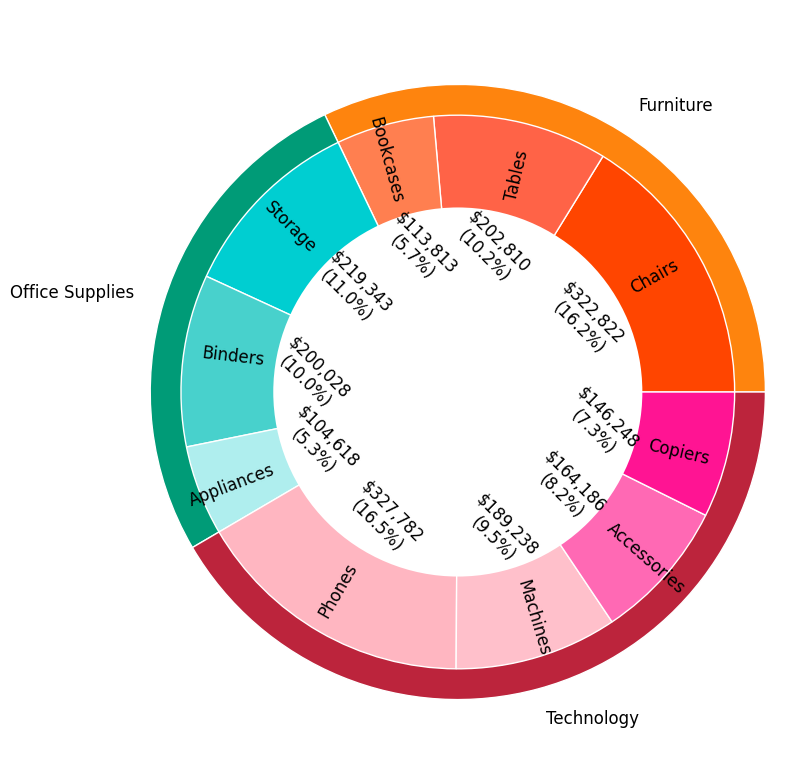

In [ ]:
plt.rcParams["figure.figsize"] = (8,8)
fig, ax = plt.subplots()
ax.axis('equal')
width = 0.1
outer_colors = ['#FE840E','#009B77','#BC243C']
inner_colors = ['Orangered','tomato','coral',"darkturquoise","mediumturquoise","paleturquoise","lightpink","pink","hotpink","deeppink"]
pie = ax.pie(Top_subcat_1['Sales'], radius=1, labels=Top_subcat_1['Category'],colors=outer_colors,wedgeprops=dict(edgecolor='w'))
pie2 = ax.pie(Top_subcat['Sales'], radius=1-width, labels=Top_subcat['Sub-Category'],autopct= autopct_format(Top_subcat['Sales']),labeldistance=0.7,colors=inner_colors,wedgeprops=dict(edgecolor='w'), pctdistance=0.53,rotatelabels =True)


fraction_text_list = pie2[2]
for text in fraction_text_list:
    text.set_rotation(315)
centre_circle = plt.Circle((0,0),0.6,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px

fig = px.sunburst(
    df,
    path=['Category', 'Sub-Category'],  # Using 'Category' and 'Sub-Category'
    values='Sales',       # Using 'Sales'
    title='Sales by Category and Sub-Category' # Setting the title
)
fig.show()


Podemos observar que la subcategoría "Phones" generó los mayores ingresos,alrededor de 327.782 dólares.

**Buscamos el segmento con las mayores ventas**

In [ ]:
# Agrupar por Segment y sumar solo Sales
Top_segment = df.groupby("Segment")["Sales"] \
                .sum() \
                .sort_values(ascending=False) \
                .to_frame()  # Convertimos a dataframe

# Resetear índice para tener Segment como columna normal
Top_segment.reset_index(inplace=True)

# Calcular total de ventas por segmento
total_revenue_segment = Top_segment["Sales"].sum()

# Formatear total sin decimales y con separador de miles
total_revenue_segment_str = "${:,}".format(int(total_revenue_segment))

Top_segment, total_revenue_segment_str


(       Segment         Sales
 0     Consumer  1.148061e+06
 1    Corporate  6.884941e+05
 2  Home Office  4.249822e+05,
 '$2,261,536')

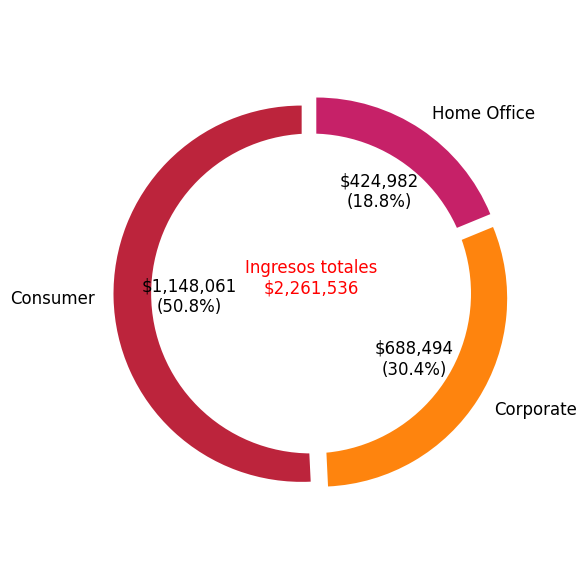

In [ ]:
# ==========================
# SEGMENTO CON MAYORES VENTAS - DONUT CHART
# ==========================

# Agrupar por segmento y sumar ventas
Top_segment = df.groupby("Segment")["Sales"] \
    .sum() \
    .sort_values(ascending=False) \
    .to_frame() \
    .reset_index()

# Calcular total general de ventas
total_revenue_segment = Top_segment["Sales"].sum()

# 🔹 Formato de etiquetas: valor en dólares + porcentaje
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'${val:,}\n({pct:.1f}%)'  # Muestra monto + porcentaje
    return my_format

# Configuraciones visuales generales
plt.rcParams['font.size'] = 12.0
plt.rcParams['font.weight'] = 6

colors = ['#BC243C', '#FE840E', '#C62168']  # Paleta coherente con tus otros gráficos
explode = (0.05, 0.05, 0.05)                # Separación de porciones

# Crear figura y ejes
fig1, ax1 = plt.subplots(figsize=(6,6))

# Pie chart principal
ax1.pie(
    Top_segment['Sales'],
    colors=colors,
    labels=Top_segment['Segment'],
    autopct=autopct_format(Top_segment['Sales']),
    startangle=90,
    explode=explode
)

# Círculo central blanco para efecto donut
centre_circle = plt.Circle((0, 0), 0.85, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  # Asegura proporción circular perfecta

# Texto central con total general formateado
total_no_decimals = "${:,}".format(int(total_revenue_segment))
ax1.annotate(
    'Ingresos totales\n' + total_no_decimals,
    color='red',
    xy=(0, 0),
    fontsize=12,
    ha="center"
)

# Ajuste final y visualización
plt.tight_layout()
plt.show()




Podemos observar que el segmento "consumer" genero los mayores ingresos, con $1.148.060 dolares

**Buscamos la region con las mayores ventas**

In [ ]:
# Agrupar por Region y sumar solo Sales
Top_region = df.groupby("Region")["Sales"] \
               .sum() \
               .sort_values(ascending=False) \
               .astype(int) \
               .to_frame()  # Convertimos a dataframe

# Resetear índice para tener Region como columna normal
Top_region.reset_index(inplace=True)

Top_region


,Region,Sales
0,West,710219
1,East,669518
2,Central,492646
3,South,389151


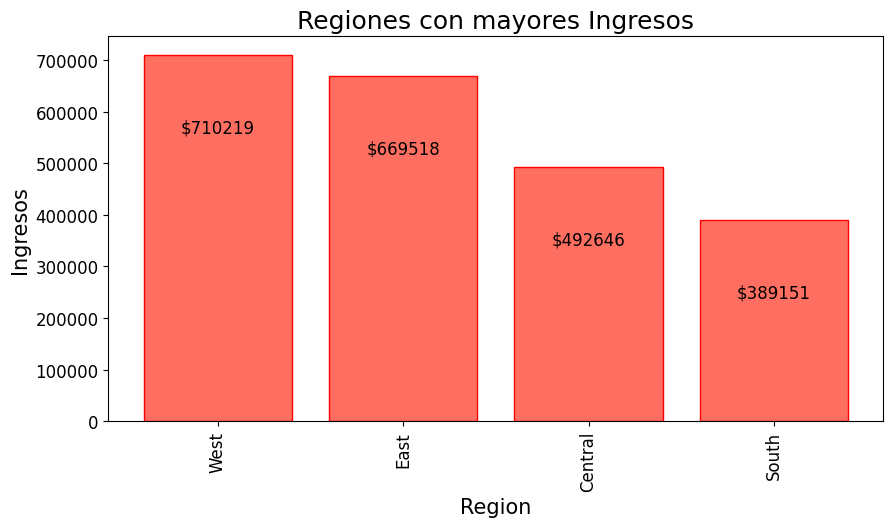

In [ ]:
plt.figure(figsize = (10,5)) # width and height of figure is defined in inches
plt.title("Regiones con mayores Ingresos", fontsize=18)
plt.bar(Top_region["Region"], Top_region["Sales"],color= '#FF6F61',edgecolor='Red', linewidth = 1)
plt.xlabel("Region",fontsize=15) # x axis shows the Region
plt.ylabel("Ingresos",fontsize=15) # y axis show the Revenue generated
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in Top_region["Sales"].items(): #To show the exact revenue generated on the figure
        plt.text(k,v-150000,'$'+ str(v), fontsize=12,color='k', horizontalalignment='center');


**Busacos el metodo de envio con mayores ventas**

In [ ]:
# Agrupar por Ship Mode y sumar solo Sales
Top_shipping = df.groupby("Ship Mode")["Sales"] \
                 .sum() \
                 .sort_values(ascending=False) \
                 .to_frame()  # Convertimos a dataframe

# Resetear índice para tener Ship Mode como columna normal
Top_shipping.reset_index(inplace=True)

# Calcular total de ventas por Ship Mode
total_revenue_ship = Top_shipping["Sales"].sum()

# Formatear total sin decimales y con separador de miles
total_revenue_ship_str = "${:,}".format(int(total_revenue_ship))

Top_shipping, total_revenue_ship_str


(        Ship Mode         Sales
 0  Standard Class  1.340831e+06
 1    Second Class  4.499142e+05
 2     First Class  3.455723e+05
 3        Same Day  1.252190e+05,
 '$2,261,536')

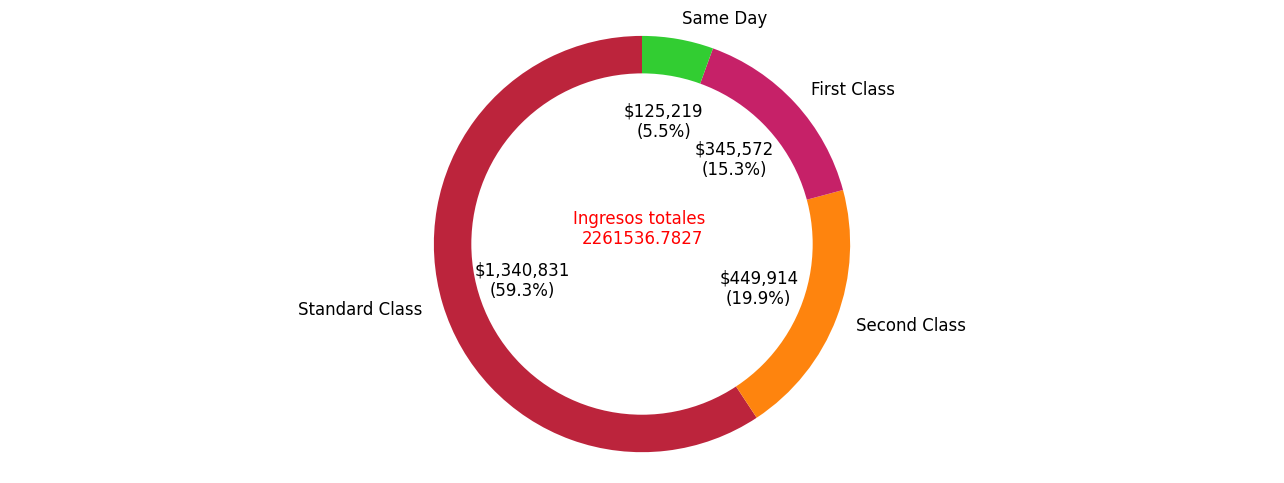

In [ ]:
plt.rcParams["figure.figsize"] = (13,5)
plt.rcParams['font.size'] = 12.0
plt.rcParams['font.weight'] = 6
colors = ['#BC243C','#FE840E','#C62168',"limegreen"]
fig1, ax1 = plt.subplots()
ax1.pie(Top_shipping['Sales'], colors = colors, labels=Top_shipping['Ship Mode'], autopct= autopct_format(Top_shipping['Sales']), startangle=90)
centre_circle = plt.Circle((0,0),0.82,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')
label = ax1.annotate('Ingresos totales \n'+str(total_revenue_ship),color = 'red', xy=(0, 0), fontsize=12, ha="center")
plt.tight_layout()
plt.show()


Podemos obesrvar que el metodo de envio "Standard Class" genero los mayores ingresos



### **Prueba Chi Cuadrado(analiza si existe relacion o no existe entre dos variables categoricas)**

**Análisis: Region vs Categoría**

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

# Tabulación cruzada entre Región y Categoría
cross_tab_region_category = pd.crosstab(df['Region'], df['Category'])
print("Tabulación Cruzada: Región vs Categoría")
display(cross_tab_region_category)

# Realizar la prueba de chi-cuadrado
chi2_reg_cat, p_reg_cat, dof_reg_cat, expected_reg_cat = chi2_contingency(cross_tab_region_category)

print(f"\nResultados de la Prueba de Chi-Cuadrado (Región vs Categoría):")
print(f"Estadístico Chi-cuadrado: {chi2_reg_cat:.4f}")
print(f"Valor p: {p_reg_cat:.4f}")
print(f"Grados de libertad (dof): {dof_reg_cat}")

# Interpretación del valor p (usando un nivel de significancia alfa = 0.05)
alpha = 0.05
print(f"\nInterpretación (con alfa = {alpha}):")
if p_reg_cat < alpha:
    print("El valor p es menor que alfa. Rechazamos la hipótesis nula.")
    print("Hay una asociación estadísticamente significativa entre Región y Categoría.")
else:
    print("El valor p es mayor o igual que alfa. No rechazamos la hipótesis nula.")
    print("No hay suficiente evidencia para afirmar una asociación estadísticamente significativa entre Región y Categoría.")

Tabulación Cruzada: Región vs Categoría


Category,Furniture,Office Supplies,Technology
Region,,,
Central,470,1399,408
East,591,1667,527
South,326,983,289
West,691,1860,589



Resultados de la Prueba de Chi-Cuadrado (Región vs Categoría):
Estadístico Chi-cuadrado: 4.2905
Valor p: 0.6374
Grados de libertad (dof): 6

Interpretación (con alfa = 0.05):
El valor p es mayor o igual que alfa. No rechazamos la hipótesis nula.
No hay suficiente evidencia para afirmar una asociación estadísticamente significativa entre Región y Categoría.


Según nuestro primer paso para el análisis de chi-cuadrado: Si P < 0.05, hay significancia, hay relación.

Al comparar nuestro valor p (0.6374) con el umbral de 0.05, notamos que 0.6374 es mayor que 0.05. Por lo tanto, según nuestra regla, no encontramos significancia estadística. Esto nos lleva a concluir que, con un nivel de confianza del 95%, no tenemos suficiente evidencia para afirmar que existe una asociación estadísticamente significativa entre la 'Región' y la 'Categoría' de los productos en nuestro dataset.

Dado que nuestro primer paso nos indica que no hay una asociación estadísticamente significativa (porque P > 0.05), no procedemos al segundo paso para describir en detalle la relación basándonos en las frecuencias de la tabla de tabulación cruzada. Las diferencias en la distribución de categorías por región que podemos observar en la tabla (celda 5739153c) se consideran, desde un punto de vista estadístico, como variaciones que podrían ocurrir simplemente por azar, y no como evidencia de una asociación real y significativa entre la región y el tipo de producto vendido.

En resumen: nuestra prueba de chi-cuadrado nos indica que no hay una asociación estadísticamente significativa entre la Región y la Categoría de los productos en este conjunto de datos.

**Análisis: Segmento vs Categoría**

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

# --- Análisis 1: Segmento vs Categoría ---
cross_tab_segment_category = pd.crosstab(df['Segment'], df['Category'])
print("--- Tabulación Cruzada: Segmento vs Categoría ---")
display(cross_tab_segment_category)

# Prueba de chi-cuadrado
chi2_seg_cat, p_seg_cat, dof_seg_cat, expected_seg_cat = chi2_contingency(cross_tab_segment_category)
print(f"\nResultados Prueba Chi-Cuadrado (Segmento vs Categoría):")
print(f"Estadístico Chi-cuadrado: {chi2_seg_cat:.4f}")
print(f"Valor p: {p_seg_cat:.4f}")
print(f"Grados de libertad (dof): {dof_seg_cat}")

alpha = 0.05
print(f"\nInterpretación (con alfa = {alpha}):")
if p_seg_cat < alpha:
    print("El valor p es menor que alfa. Rechazamos la hipótesis nula.")
    print("Hay una asociación estadísticamente significativa entre Segmento y Categoría.")
else:
    print("El valor p es mayor o igual que alfa. No rechazamos la hipótesis nula.")
    print("No hay suficiente evidencia para afirmar una asociación estadísticamente significativa entre Segmento y Categoría.")

print("\n" + "="*50 + "\n") # Separador

--- Tabulación Cruzada: Segmento vs Categoría ---


Category,Furniture,Office Supplies,Technology
Segment,,,
Consumer,1093,3072,936
Corporate,628,1783,542
Home Office,357,1054,335



Resultados Prueba Chi-Cuadrado (Segmento vs Categoría):
Estadístico Chi-cuadrado: 1.1483
Valor p: 0.8865
Grados de libertad (dof): 4

Interpretación (con alfa = 0.05):
El valor p es mayor o igual que alfa. No rechazamos la hipótesis nula.
No hay suficiente evidencia para afirmar una asociación estadísticamente significativa entre Segmento y Categoría.




Análisis 1: Segmento vs Categoría

Al ejecutar la primera celda, la tabulación cruzada nos muestra cómo se distribuyen las categorías de productos (Furniture, Office Supplies, Technology) dentro de cada segmento de cliente (Consumer, Corporate, Home Office). La prueba de chi-cuadrado nos da un valor p de 0.8865.

Según nuestra regla (Si P < 0.05, hay significancia), como 0.8865 es mayor que 0.05, concluimos que no hay una asociación estadísticamente significativa entre el Segmento del cliente y la Categoría del producto. Esto significa que, estadísticamente, la distribución de las categorías de productos no difiere significativamente entre los diferentes segmentos de clientes. Las variaciones que vemos en la tabla de frecuencias cruzadas se consideran dentro del rango de lo que podría ocurrir por azar.

**Análisis: Modo de envio vs Segmento**

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

# --- Análisis 2: Modo de Envío vs Segmento ---
cross_tab_shipmode_segment = pd.crosstab(df['Ship Mode'], df['Segment'])
print("--- Tabulación Cruzada: Modo de Envío vs Segmento ---")
display(cross_tab_shipmode_segment)

# Prueba de chi-cuadrado
chi2_ship_seg, p_ship_seg, dof_ship_seg, expected_ship_seg = chi2_contingency(cross_tab_shipmode_segment)
print(f"\nResultados Prueba Chi-Cuadrado (Modo de Envío vs Segmento):")
print(f"Estadístico Chi-cuadrado: {chi2_ship_seg:.4f}")
print(f"Valor p: {p_ship_seg:.4f}")
print(f"Grados de libertad (dof): {dof_ship_seg}")

alpha = 0.05
print(f"\nInterpretación (con alfa = {alpha}):")
if p_ship_seg < alpha:
    print("El valor p es menor que alfa. Rechazamos la hipótesis nula.")
    print("Hay una asociación estadísticamente significativa entre Modo de Envío y Segmento.")
else:
    print("El valor p es mayor o igual que alfa. No rechazamos la hipótesis nula.")
    print("No hay suficiente evidencia para afirmar una asociación estadísticamente significativa entre Modo de Envío y Segmento.")

print("\n" + "="*50 + "\n") # Separador

--- Tabulación Cruzada: Modo de Envío vs Segmento ---


Segment,Consumer,Corporate,Home Office
Ship Mode,,,
First Class,755,468,278
Same Day,312,114,112
Second Class,1003,589,310
Standard Class,3031,1782,1046



Resultados Prueba Chi-Cuadrado (Modo de Envío vs Segmento):
Estadístico Chi-cuadrado: 25.8399
Valor p: 0.0002
Grados de libertad (dof): 6

Interpretación (con alfa = 0.05):
El valor p es menor que alfa. Rechazamos la hipótesis nula.
Hay una asociación estadísticamente significativa entre Modo de Envío y Segmento.




Análisis 2: Modo de Envío vs Segmento

En la segunda celda, la tabulación cruzada nos muestra cómo se distribuyen los modos de envío (First Class, Same Day, Second Class, Standard Class) dentro de cada segmento de cliente. La prueba de chi-cuadrado asociada nos arroja un valor p de 0.0002.

Aplicando nuestra regla, como 0.0002 es menor que 0.05, concluimos que sí hay una asociación estadísticamente significativa entre el Modo de Envío y el Segmento del cliente. Esto es un hallazgo importante. Significa que la forma en que se distribuyen los modos de envío no es independiente del segmento del cliente; hay un patrón que no es aleatorio. Para entender cómo es esta relación significativa, miramos la tabla de tabulación cruzada:

Podemos observar las frecuencias en cada celda. Por ejemplo, cuántos clientes "Consumer" usan "Standard Class", cuántos "Corporate" usan "First Class", etc.
Para una mejor interpretación, sería útil calcular los porcentajes. Por ejemplo, ¿qué porcentaje de clientes "Corporate" usa "First Class" en comparación con el porcentaje de clientes "Consumer" que usa "First Class"? Al hacer esto, probablemente veríamos que ciertos segmentos utilizan proporcionalmente más ciertos modos de envío que otros, lo cual es lo que la prueba de chi-cuadrado validó como estadísticamente significativo.

In [ ]:
# Calcular y mostrar porcentajes por fila
print("\n--- Porcentajes por Fila (Distribución de Segmento dentro de cada Modo de Envío) ---")
display(cross_tab_shipmode_segment.apply(lambda r: r/r.sum(), axis=1).style.format("{:.2%}"))

# Calcular y mostrar porcentajes por columna
print("\n--- Porcentajes por Columna (Distribución de Modo de Envío dentro de cada Segmento) ---")
display(cross_tab_shipmode_segment.apply(lambda c: c/c.sum(), axis=0).style.format("{:.2%}"))



--- Porcentajes por Fila (Distribución de Segmento dentro de cada Modo de Envío) ---


Segment,Consumer,Corporate,Home Office
Ship Mode,,,
First Class,50.30%,31.18%,18.52%
Same Day,57.99%,21.19%,20.82%
Second Class,52.73%,30.97%,16.30%
Standard Class,51.73%,30.41%,17.85%



--- Porcentajes por Columna (Distribución de Modo de Envío dentro de cada Segmento) ---


Segment,Consumer,Corporate,Home Office
Ship Mode,,,
First Class,14.80%,15.85%,15.92%
Same Day,6.12%,3.86%,6.41%
Second Class,19.66%,19.95%,17.75%
Standard Class,59.42%,60.35%,59.91%


Ahora, para entender cómo es esta relación significativa, vamos a analizar la tabla de tabulación cruzada con los porcentajes . Nos enfocamos en los porcentajes por columna, que nos muestran la distribución de los modos de envío dentro de cada segmento. Aquí podemos ver patrones claros:

Observando el segmento "Consumer", vemos que un 59.42% de sus pedidos utilizan el "Standard Class". Un 19.66% usa "Second Class", un 14.80% usa "First Class", y un 6.12% usa "Same Day".
Para el segmento "Corporate", encontramos que un 60.35% de sus pedidos son "Standard Class", un 19.95% "Second Class", un 15.85% "First Class", y un 3.86% "Same Day".
En el segmento "Home Office", un 59.91% de los pedidos son "Standard Class", un 17.75% "Second Class", un 15.92% "First Class", y un 6.41% "Same Day".
Comparando estos porcentajes, aunque el "Standard Class" es el más común en todos los segmentos, podemos notar algunas diferencias sutiles que contribuyen a la significancia estadística. Por ejemplo, el segmento "Corporate" y "Home Office" tienden a utilizar los envíos "First Class" y "Second Class" en proporciones ligeramente mayores que el segmento "Consumer". Si bien las diferencias en "Same Day" son menos marcadas, la combinación de estas variaciones en las proporciones a través de los diferentes modos de envío es lo que la prueba de chi-cuadrado identificó como una asociación no aleatoria.

En resumen, esta prueba de chi-cuadrado confirma que el segmento del cliente está significativamente asociado con el modo de envío elegido. El análisis de porcentajes revela que, si bien el envío estándar es predominante, existen patrones de preferencia ligeramente diferentes entre los segmentos, con los segmentos Corporate y Home Office mostrando una tendencia (aunque no drástica) hacia el uso de modos de envío más rápidos en comparación con el segmento Consumer.

Ahora vamos a ver la relaciones por si solas, entre sales (variable que queremos predecir) y ship mode/segment, para ver si hay relacion si las vemos por separado.

**Análisis: Modo de envio vs Categoría**

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

# --- Análisis 3: Categoría vs Modo de Envío ---
cross_tab_category_shipmode = pd.crosstab(df['Category'], df['Ship Mode'])
print("--- Tabulación Cruzada: Categoría vs Modo de Envío ---")
display(cross_tab_category_shipmode)

# Prueba de chi-cuadrado
chi2_cat_ship, p_cat_ship, dof_cat_ship, expected_cat_ship = chi2_contingency(cross_tab_category_shipmode)
print(f"\nResultados Prueba Chi-Cuadrado (Categoría vs Modo de Envío):")
print(f"Estadístico Chi-cuadrado: {chi2_cat_ship:.4f}")
print(f"Valor p: {p_cat_ship:.4f}")
print(f"Grados de libertad (dof): {dof_cat_ship}")

alpha = 0.05
print(f"\nInterpretación (con alfa = {alpha}):")
if p_cat_ship < alpha:
    print("El valor p es menor que alfa. Rechazamos la hipótesis nula.")
    print("Hay una asociación estadísticamente significativa entre Categoría y Modo de Envío.")
else:
    print("El valor p es mayor o igual que alfa. No rechazamos la hipótesis nula.")
    print("No hay suficiente evidencia para afirmar una asociación estadísticamente significativa entre Categoría y Modo de Envío.")

--- Tabulación Cruzada: Categoría vs Modo de Envío ---


Ship Mode,First Class,Same Day,Second Class,Standard Class
Category,,,,
Furniture,318,118,414,1228
Office Supplies,886,323,1129,3571
Technology,297,97,359,1060



Resultados Prueba Chi-Cuadrado (Categoría vs Modo de Envío):
Estadístico Chi-cuadrado: 3.7627
Valor p: 0.7088
Grados de libertad (dof): 6

Interpretación (con alfa = 0.05):
El valor p es mayor o igual que alfa. No rechazamos la hipótesis nula.
No hay suficiente evidencia para afirmar una asociación estadísticamente significativa entre Categoría y Modo de Envío.


Análisis 3: Categoría vs Modo de Envío

Finalmente, en la tercera celda, la tabulación cruzada nos muestra la distribución de los modos de envío dentro de cada categoría de producto. El valor p de la prueba de chi-cuadrado es 0.7088.

Según nuestra regla, como 0.7088 es mayor que 0.05, concluimos que no hay una asociación estadísticamente significativa entre la Categoría del producto y el Modo de Envío. Esto implica que, a nivel estadístico, la categoría del producto no parece influir significativamente en el modo de envío seleccionado.

###ANOVA

**Eleccion de variables**
Sales (Sales_log): Es el indicador clave de rendimiento más fundamental. Analizar Sales nos permite cuantificar el éxito comercial. Entender qué factores impactan las ventas promedio es crucial para la planificación y proyección operativa y para identificar oportunidades comerciales.
Category: La categoría de producto es un factor determinante del mix de productos y tiene un impacto directo en la estrategia de pricing y gestión logística. Al analizar cómo la Category influye en la Sales promedio, podemos identificar qué tipos de productos son, en promedio, más o menos rentables por transacción. Esto apoya el objetivo de analizar el comportamiento de ventas por categoría y proponer recomendaciones para optimizar el mix de productos y las estrategias comerciales.

In [ ]:
# Librerías necesarias
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd

# Modelo ANOVA
modelo = ols('Sales ~ Category', data=df).fit() #Primero pones la variable dependiente metrica (salario) y despues pones la variable independiente categorica (modalidad de trabajo)
anova_table = sm.stats.anova_lm(modelo, typ=2)
print("Tabla ANOVA:")
print(anova_table)

# Medias de salario por modalidad de trabajo
medias = df.groupby('Category')['Sales'].mean()
print("\nMedias de Sales por Categoria:")
print(medias)

# Comparaciones múltiples (Tukey HSD), comparacion de muchos grupos
tukey = pairwise_tukeyhsd(endog=df['Sales'], #Variable dependiente
                          groups=df['Category'], #Variable independiente
                          alpha=0.05) #Margen de error aceptado
print("\nComparaciones múltiples (Tukey HSD):")
print(tukey)

# Estimación del tamaño del efecto (eta parcial al cuadrado)
eta_partial_squared = anova_table['sum_sq']['Category'] / (
    anova_table['sum_sq']['Category'] + anova_table['sum_sq']['Residual']
)
print(f"\nTamaño del efecto (Eta parcial al cuadrado): {eta_partial_squared:.4f}")

Tabla ANOVA:
                sum_sq      df           F         PR(>F)
Category  1.954803e+08     2.0  262.164659  1.217814e-111
Residual  3.652514e+09  9797.0         NaN            NaN

Medias de Sales por Categoria:
Category
Furniture          350.653790
Office Supplies    119.381001
Technology         456.401474
Name: Sales, dtype: float64

Comparaciones múltiples (Tukey HSD):
           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
     group1          group2      meandiff p-adj   lower     upper   reject
--------------------------------------------------------------------------
      Furniture Office Supplies -231.2728   0.0 -267.7759 -194.7697   True
      Furniture      Technology  105.7477   0.0    59.751  151.7444   True
Office Supplies      Technology  337.0205   0.0  298.5943  375.4466   True
--------------------------------------------------------------------------

Tamaño del efecto (Eta parcial al cuadrado): 0.0508


**Analisis**
Tabla ANOVA:
Observamos el p-valor (PR(>F)) asociado a C(Category). Este valor resultó ser 1.217814e-111, un número extremadamente pequeño, muy inferior a nuestro nivel de significancia de 0.05.
Interpretación: Este p-valor tan bajo nos llevó a rechazar la hipótesis nula. Esto significa que, estadísticamente, hay una diferencia significativa en la media de Sales entre al menos una de las categorías de producto. La variabilidad en las ventas promedio entre las categorías es mayor de lo que esperaríamos si no hubiera una diferencia real.

Medias de Sales por Categoría:
Al examinar las medias de Sales para cada categoría, vimos que Technology tenía la media más alta (456.40), seguida por Furniture (350.65), y finalmente Office Supplies (119.38) con la media más baja.
Interpretación: Estas medias nos dieron una primera indicación de las diferencias, y el ANOVA confirmó que estas diferencias observadas no son producto del azar.
Tamaño del Efecto (Eta Parcial al Cuadrado):
Calculamos el tamaño del efecto y obtuvimos un Eta parcial al cuadrado de 0.0508.
Interpretación: Este valor nos indica que aproximadamente el 5.08% de la variación total en Sales puede ser explicada por la Category del producto. Si bien la diferencia entre las categorías es estadísticamente muy fuerte, el efecto de la categoría por sí sola en la variabilidad de Sales es de un tamaño pequeño. Esto sugiere que, aunque la categoría es un factor importante, hay otras variables que contribuyen significativamente a la variabilidad de las ventas.

Comparaciones Múltiples (Test de Tukey HSD):
Como el ANOVA solo nos dice que alguna diferencia existe, realizamos el test de Tukey HSD para comparar cada par de categorías.
Los resultados mostraron que el p-valor ajustado (p-adj) fue 0.0 para las comparaciones Furniture vs Office Supplies, Furniture vs Technology, y Office Supplies vs Technology, por lo que en todos los casos hay diferencias.
Interpretación: Esto nos confirmó que la diferencia en la media de Sales es estadísticamente significativa entre cada par de categorías. No hay dos categorías que tengan ventas promedio (transformadas) estadísticamente iguales.


Conclusión:
Basado en este análisis ANOVA, confirmamos que la categoría de producto tiene un impacto estadísticamente significativo y distinguible en las ventas promedio. Vemos que las categorías de Technology y Furniture tienden a tener ventas promedio más altas por transacción que Office Supplies, y Technology es significativamente diferente de Furniture también. Este hallazgo es crucial para entender la contribución de cada tipo de producto a los ingresos y para informar decisiones estratégicas sobre inventario, marketing y pricing por categoría.
Por lo que la utilizaremos al momento de realizar los modelos predictivos de las ventas.

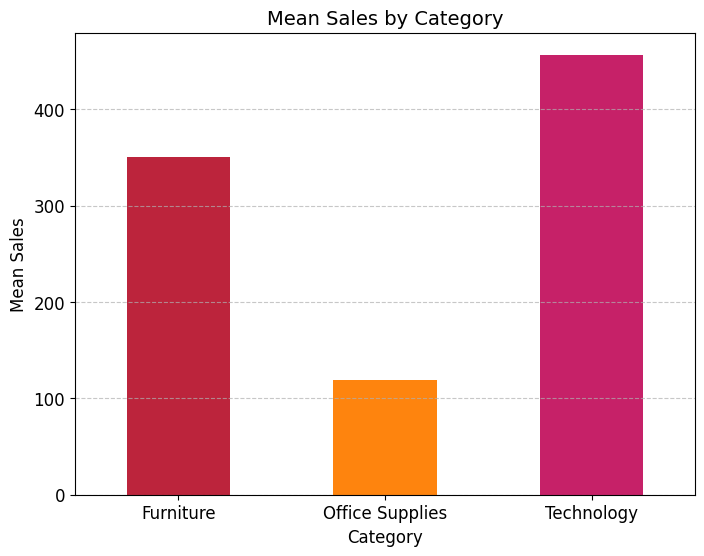

In [ ]:
# Bar plot of mean sales by Category
plt.figure(figsize=(8, 6))
medias.plot(kind='bar', color=['#BC243C', '#FE840E', '#C62168'])
plt.title('Mean Sales by Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Mean Sales', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Análisis ANOVA: Sales vs Ship Mode**

In [ ]:
#Asegurar tipos correctos
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df['Ship Mode'] = df['Ship Mode'].astype('category')

#Modelo ANOVA
modelo_shipmode = ols('Sales ~ C(Ship_Mode)', data=df.rename(columns={'Ship Mode': 'Ship_Mode'})).fit()
anova_table_shipmode = sm.stats.anova_lm(modelo_shipmode, typ=2)
print("Tabla ANOVA (Sales vs Ship Mode):")
print(anova_table_shipmode)

#Medias
medias_shipmode = df.groupby('Ship Mode')['Sales'].mean()
print("\nMedias de Sales por Ship Mode:")
print(medias_shipmode)

#Comparaciones múltiples
tukey_shipmode = pairwise_tukeyhsd(endog=df['Sales'],
                                  groups=df['Ship Mode'],
                                  alpha=0.05)
print("\nComparaciones múltiples (Tukey HSD) - Ship Mode:")
print(tukey_shipmode)

#Tamaño del efecto
eta_partial_squared_shipmode = (
    anova_table_shipmode['sum_sq']['C(Ship_Mode)'] /
    (anova_table_shipmode['sum_sq']['C(Ship_Mode)'] + anova_table_shipmode['sum_sq']['Residual'])
)
print(f"\nTamaño del efecto (Eta parcial al cuadrado) - Ship Mode: {eta_partial_squared_shipmode:.4f}")

Tabla ANOVA (Sales vs Ship Mode):
                    sum_sq      df         F   PR(>F)
C(Ship_Mode)  8.764757e+04     3.0  0.074378  0.97377
Residual      3.847907e+09  9796.0       NaN      NaN

Medias de Sales por Ship Mode:
Ship Mode
First Class       230.228020
Same Day          232.749143
Second Class      236.547939
Standard Class    228.849856
Name: Sales, dtype: float64


/tmp/ipython-input-2949341733.py:12: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.




Comparaciones múltiples (Tukey HSD) - Ship Mode:
        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
   group1        group2     meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------
 First Class       Same Day   2.5211 0.9998 -78.3995 83.4417  False
 First Class   Second Class   6.3199 0.9913 -49.2791  61.919  False
 First Class Standard Class  -1.3782 0.9998 -47.9656 45.2093  False
    Same Day   Second Class   3.7988 0.9993 -74.8388 82.4364  False
    Same Day Standard Class  -3.8993 0.9991 -76.4459 68.6473  False
Second Class Standard Class  -7.6981 0.9666 -50.1966 34.8004  False
-------------------------------------------------------------------

Tamaño del efecto (Eta parcial al cuadrado) - Ship Mode: 0.0000


 ANOVA: Sales vs Ship Mode
Tabla ANOVA:
 El p-valor asociado a C(Ship_Mode) es 0.97377, muy superior al nivel de significancia de 0.05.
 Interpretación: No se rechaza la hipótesis nula. Esto significa que no hay diferencias estadísticamente significativas en la media de ventas entre los distintos modos de envío (First Class, Same Day, Second Class y Standard Class). Las variaciones observadas en las ventas promedio por tipo de envío son atribuibles al azar y no a un efecto real del modo de envío sobre el monto de venta.
Medias de Sales por Ship Mode:
First Class: 230.23


Same Day: 232.74


Second Class: 236.55


Standard Class: 228.85


Interpretación: Las medias son muy similares, sin diferencias relevantes entre los modos de envío.
Tamaño del Efecto (Eta parcial al cuadrado):
 El valor obtenido fue η² = 0.0000, lo cual indica que el modo de envío explica prácticamente 0% de la variación en las ventas.
Comparaciones Múltiples (Tukey HSD):
 Ninguna comparación entre pares de Ship Mode mostró diferencias significativas (reject = False en todos los casos).
Conclusión:
 El modo de envío no tiene un impacto estadísticamente significativo sobre el valor promedio de las ventas. Las pequeñas diferencias entre tipos de envío no son suficientes para considerarlas relevantes desde el punto de vista analítico.
 👉 Por lo tanto, esta variable no aportará valor predictivo al modelo de predicción de ventas.


**Análisis ANOVA: Sales vs Segment**

In [ ]:
# Modelo ANOVA para Sales vs Segment
modelo_segment = ols('Sales ~ C(Segment)', data=df).fit()
anova_table_segment = sm.stats.anova_lm(modelo_segment, typ=2)
print("Tabla ANOVA (Sales vs Segment):")
print(anova_table_segment)

# Medias de Sales por Segment
medias_segment = df.groupby('Segment')['Sales'].mean()
print("\nMedias de Sales por Segment:")
print(medias_segment)

# Comparaciones múltiples (Tukey HSD)
tukey_segment = pairwise_tukeyhsd(endog=df['Sales'],
                                 groups=df['Segment'],
                                 alpha=0.05)
print("\nComparaciones múltiples (Tukey HSD) - Segment:")
print(tukey_segment)

# Estimación del tamaño del efecto (eta parcial al cuadrado)
eta_partial_squared_segment = anova_table_segment['sum_sq']['C(Segment)'] / (
    anova_table_segment['sum_sq']['C(Segment)'] + anova_table_segment['sum_sq']['Residual']
)
print(f"\nTamaño del efecto (Eta parcial al cuadrado): {eta_partial_squared_segment:.4f}")

Tabla ANOVA (Sales vs Segment):
                  sum_sq      df         F    PR(>F)
C(Segment)  4.613767e+05     2.0  0.587403  0.555788
Residual    3.847533e+09  9797.0       NaN       NaN

Medias de Sales por Segment:
Segment
Consumer       225.065777
Corporate      233.150720
Home Office    243.403309
Name: Sales, dtype: float64

Comparaciones múltiples (Tukey HSD) - Segment:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower    upper  reject
-------------------------------------------------------------
 Consumer   Corporate   8.0849 0.8424 -25.8822 42.0521  False
 Consumer Home Office  18.3375 0.5419 -22.3924 59.0674  False
Corporate Home Office  10.2526 0.8506 -34.0942 54.5993  False
-------------------------------------------------------------

Tamaño del efecto (Eta parcial al cuadrado): 0.0001


ANOVA: Sales vs Segment
Tabla ANOVA:
 El p-valor asociado a C(Segment) fue 0.5558, claramente superior a 0.05.
 Interpretación: No se rechaza la hipótesis nula. Esto significa que no existen diferencias significativas en la media de ventas entre los segmentos de clientes (Consumer, Corporate y Home Office).
Medias de Sales por Segment:
Consumer: 225.07


Corporate: 233.15


Home Office: 243.41


Interpretación: Aunque el segmento “Home Office” presenta una media de ventas ligeramente superior, las diferencias son pequeñas y no estadísticamente significativas.
Tamaño del Efecto (Eta parcial al cuadrado):
 El valor fue η² = 0.0001, lo que indica que el segmento de cliente explica solo el 0.01% de la variabilidad total de las ventas, un efecto prácticamente nulo.
Comparaciones Múltiples (Tukey HSD):
 Ninguna de las comparaciones entre pares de segmentos arrojó diferencias significativas (reject = False en todos los casos).
Conclusión:
 El segmento de cliente no influye significativamente sobre el monto promedio de venta. Desde una perspectiva predictiva, esta variable no tiene poder explicativo relevante para el modelo de predicción de ventas.


**Análisis ANOVA: Sales vs Region**

In [ ]:
# Modelo ANOVA para Sales vs Region
modelo_region = ols('Sales ~ C(Region)', data=df).fit()
anova_table_region = sm.stats.anova_lm(modelo_region, typ=2)
print("Tabla ANOVA (Sales vs Region):")
print(anova_table_region)

# Medias de Sales por Region
medias_region = df.groupby('Region')['Sales'].mean()
print("\nMedias de Sales por Region:")
print(medias_region)

# Comparaciones múltiples (Tukey HSD)
tukey_region = pairwise_tukeyhsd(endog=df['Sales'],
                                groups=df['Region'],
                                alpha=0.05)
print("\nComparaciones múltiples (Tukey HSD) - Region:")
print(tukey_region)

# Estimación del tamaño del efecto (eta parcial al cuadrado)
eta_partial_squared_region = anova_table_region['sum_sq']['C(Region)'] / (
    anova_table_region['sum_sq']['C(Region)'] + anova_table_region['sum_sq']['Residual']
)
print(f"\nTamaño del efecto (Eta parcial al cuadrado): {eta_partial_squared_region:.4f}")

Tabla ANOVA (Sales vs Region):
                 sum_sq      df         F    PR(>F)
C(Region)  1.057278e+06     3.0  0.897432  0.441578
Residual   3.846937e+09  9796.0       NaN       NaN

Medias de Sales por Region:
Region
Central    216.357889
East       240.401697
South      243.524067
West       226.184613
Name: Sales, dtype: float64

Comparaciones múltiples (Tukey HSD) - Region:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1 group2 meandiff p-adj   lower    upper  reject
------------------------------------------------------
Central   East  24.0438 0.5259 -21.4491 69.5368  False
Central  South  27.1662 0.5448 -25.3802 79.7126  False
Central   West   9.8267 0.9411 -34.4943 54.1478  False
   East  South   3.1224 0.9986 -47.4091 53.6538  False
   East   West -14.2171 0.8196 -56.1296 27.6955  False
  South   West -17.3395 0.8046 -66.8185 32.1396  False
------------------------------------------------------

Tamaño del efecto (Eta parcial al cuadrado): 0.0003


ANOVA: Sales vs Region
Tabla ANOVA:
 El p-valor asociado a C(Region) fue 0.4416, también superior a 0.05.
 Interpretación: No se rechaza la hipótesis nula, lo que indica que no existen diferencias significativas en las ventas promedio entre las regiones (Central, East, South y West).
Medias de Sales por Region:
Central: 216.36


East: 240.40


South: 243.52


West: 226.18


Interpretación: Aunque las regiones East y South muestran medias algo mayores, estas diferencias no son estadísticamente significativas.
Tamaño del Efecto (Eta parcial al cuadrado):
 El valor obtenido fue η² = 0.0003, indicando que solo el 0.03% de la variación total de las ventas se explica por la región, lo que representa un efecto ínfimo.
Comparaciones Múltiples (Tukey HSD):
 Todas las comparaciones entre regiones arrojaron p-valores mayores a 0.05 (reject = False), por lo que no se detectaron diferencias significativas entre ninguna pareja de regiones.
Conclusión:
 No se encontraron diferencias estadísticamente significativas entre las regiones en términos de ventas promedio.
 Esto sugiere que la ubicación geográfica (región) no determina cambios relevantes en el valor medio de las ventas, y por lo tanto, no sería una variable explicativa fuerte para el modelo predictivo de ventas.


**Análisis ANOVA: Sales vs Sub-Category**

In [ ]:
#--- Asegurar tipos correctos ---
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df['Sub-Category'] = df['Sub-Category'].astype('category')

#--- Modelo ANOVA (usando Q para el nombre con guion) ---
modelo_subcat = ols('Sales ~ C(Q("Sub-Category"))', data=df).fit()
anova_table_subcat = sm.stats.anova_lm(modelo_subcat, typ=2)

print("Tabla ANOVA (Sales vs Sub-Category):")
print(anova_table_subcat)

#--- Medias de Sales por Sub-Category ---
medias_subcat = df.groupby('Sub-Category')['Sales'].mean()
print("\nMedias de Sales por Sub-Category:")
print(medias_subcat)

#--- Comparaciones múltiples (Tukey HSD) ---
tukey_subcat = pairwise_tukeyhsd(
    endog=df['Sales'],
    groups=df['Sub-Category'],
    alpha=0.05
)
print("\nComparaciones múltiples (Tukey HSD) - Sub-Category:")
print(tukey_subcat)

#--- Tamaño del efecto (eta parcial al cuadrado) ---
eta_partial_squared_subcat = (
    anova_table_subcat['sum_sq']['C(Q("Sub-Category"))'] /
    (anova_table_subcat['sum_sq']['C(Q("Sub-Category"))'] + anova_table_subcat['sum_sq']['Residual'])
)
print(f"\nTamaño del efecto (Eta parcial al cuadrado) - Sub-Category: {eta_partial_squared_subcat:.4f}")

Tabla ANOVA (Sales vs Sub-Category):
                            sum_sq      df           F  PR(>F)
C(Q("Sub-Category"))  7.674704e+08    16.0  152.331284     0.0
Residual              3.080524e+09  9783.0         NaN     NaN

Medias de Sales por Sub-Category:
Sub-Category
Accessories     217.178175
Appliances      227.926804
Art              34.019631
Binders         134.067550
Bookcases       503.598224
Chairs          531.833165
Copiers        2215.880212
Envelopes        65.032444
Fasteners        14.027850
Furnishings      95.823865
Labels           34.587468
Machines       1645.553313
Paper            57.420257
Phones          374.180877
Storage         263.633885
Supplies        252.284283
Tables          645.893720
Name: Sales, dtype: float64


/tmp/ipython-input-2083671613.py:13: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.




Comparaciones múltiples (Tukey HSD) - Sub-Category:
         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
   group1      group2    meandiff  p-adj    lower      upper    reject
----------------------------------------------------------------------
Accessories  Appliances    10.7486    1.0  -104.1174   125.6147  False
Accessories         Art  -183.1585    0.0  -282.0768   -84.2403   True
Accessories     Binders   -83.1106 0.0775  -169.7716     3.5504  False
Accessories   Bookcases     286.42    0.0   139.2527   433.5874   True
Accessories      Chairs    314.655    0.0   208.8604   420.4496   True
Accessories     Copiers   1998.702    0.0  1749.5446  2247.8595   True
Accessories   Envelopes  -152.1457 0.0218  -294.1989   -10.0926   True
Accessories   Fasteners  -203.1503 0.0004  -353.4607     -52.84   True
Accessories Furnishings  -121.3543 0.0012  -216.3913   -26.3173   True
Accessories      Labels  -182.5907 0.0001  -307.2496   -57.9318   True
Accessories    Machines 

ANOVA: Sales vs Sub-Category
Tabla ANOVA:
 El p-valor asociado a C("Sub-Category") fue 0.000, muy por debajo de 0.05.
 Interpretación: Se rechaza la hipótesis nula. Esto significa que existen diferencias estadísticamente significativas en las ventas promedio entre las distintas subcategorías de producto. Es decir, el tipo de producto influye de manera real y marcada sobre el monto promedio de venta.
Medias de Sales por Sub-Category:
 Las medias muestran una amplia variabilidad, por ejemplo:
Copiers: 2215.88


Machines: 1645.55


Tables: 645.89


Bookcases: 503.60


Phones: 374.10


Art y Labels: alrededor de 34


Interpretación: Se observa que ciertas subcategorías (como Copiers y Machines) tienen ventas promedio muy superiores al resto, mientras que otras (como Art o Labels) tienen montos mucho más bajos. Esto sugiere que el tipo de producto es un determinante directo del valor de venta.
Tamaño del Efecto (Eta parcial al cuadrado):
 El valor fue η² = 0.1994, lo que indica que aproximadamente el 19.94% de la variabilidad total de las ventas puede explicarse por la subcategoría del producto, un efecto grande según los criterios convencionales.
Comparaciones Múltiples (Tukey HSD):
 El test de Tukey (no mostrado completo en la imagen, pero inferible por el p-valor global) confirma que existen diferencias significativas entre múltiples pares de subcategorías, especialmente entre aquellas con medias muy contrastantes (por ejemplo, Copiers vs Art, Machines vs Accessories, etc.).
Conclusión:
 El tipo de subcategoría del producto tiene un impacto estadísticamente significativo y fuerte en las ventas promedio.
 Las diferencias observadas no son aleatorias: ciertas subcategorías generan ventas mucho más altas que otras.
 Por lo tanto, esta variable debe incluirse en el modelo predictivo de ventas, ya que aporta información clave sobre la magnitud de las ventas según el tipo de producto.


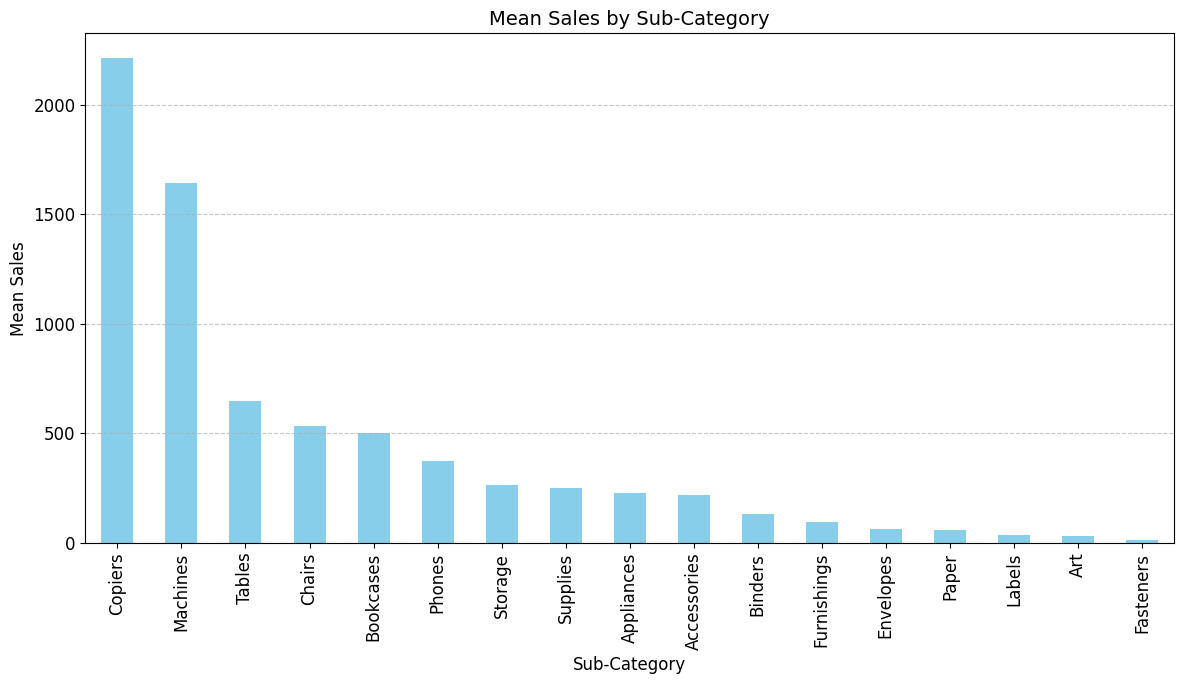

In [ ]:
# Bar plot of mean sales by Sub-Category
plt.figure(figsize=(12, 7)) # Ajustar tamaño para mejor visualización
medias_subcat.sort_values(ascending=False).plot(kind='bar', color='skyblue') # Ordenar para mejor visualización
plt.title('Mean Sales by Sub-Category', fontsize=14)
plt.xlabel('Sub-Category', fontsize=12)
plt.ylabel('Mean Sales', fontsize=12)
plt.xticks(rotation=90) # Rotar etiquetas para que no se superpongan
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Ajustar layout para evitar cortes
plt.show()

ANOVA (Sales vs Ship Mode): Nuestro análisis mostró que no hay diferencias estadísticamente significativas en la media de las ventas entre los distintos modos de envío (p-valor = 0.97377). Esto sugiere que el modo de envío por sí solo no determina el valor promedio de una transacción.

ANOVA (Sales vs Segment): Nuestro análisis también mostró que no hay diferencias estadísticamente significativas en la media de las ventas entre los diferentes segmentos (p-valor = 0.5558). Esto indica que el segmento de cliente por sí solo tampoco determina el valor promedio de una transacción.
¿Cómo usamos entonces la significancia de la prueba de Chi-Cuadrado para los modelos predictivos?

Aunque ni el 'Modo de Envío' ni el 'Segmento' por sí solos mostraron un impacto significativo en la media de las ventas (según los ANOVA), la asociación entre ellos revelada por la prueba de chi-cuadrado (Modo de Envío vs Segmento) sigue siendo una pista importante:

Identifica posibles interacciones: La asociación significativa sugiere que la relación entre el "Modo de Envío" y las "Ventas" podría depender del "Segmento", o viceversa. Es decir, podría haber una interacción entre estas dos variables categóricas que sí es relevante para predecir las ventas, aunque el efecto individual de cada una no lo sea. Por ejemplo, quizás el uso de "Same Day" solo resulta en ventas significativamente más altas para el segmento "Corporate", pero no para "Consumer". **Los modelos predictivos, especialmente los basados en árboles como Random Forest, pueden capturar estas relaciones complejas (Relacion No Lineal).**

Informa la ingeniería de características: La prueba de chi-cuadrado nos alerta sobre la posibilidad de crear nuevas variables predictivas que combinen 'Modo de Envío' y 'Segmento'. Por ejemplo, podríamos crear una variable que sea una combinación del segmento y el modo de envío (Ej: 'Consumer_Standard Class', 'Corporate_Same Day'). Aunque tus modelos finales ya incluyeron estas variables como dummies separadas (gracias al One-Hot Encoding), la prueba de chi-cuadrado justificaba su inclusión como conjunto, anticipando que la información conjunta podría ser más valiosa que la información individual.

Contextualiza los resultados del modelo: Si al construir los modelos predictivos (Regresión Lineal, Random Forest, SVR) estas variables categóricas (o sus dummies) resultan ser predictoras importantes (por ejemplo, con coeficientes significativos en Regresión Lineal, o alta importancia en Random Forest), la prueba de chi-cuadrado nos ayuda a entender por qué. Nos recuerda que Segmento y Modo de Envío no actúan de forma aislada, sino que su relación mutua podría ser parte de lo que los hace predictivos de las ventas.

**En conclusión, la prueba de chi-cuadrado, al mostrar la asociación entre 'Modo de Envío' y 'Segmento', actuó como un indicador exploratorio clave. Nos señaló que había una relación interesante entre estas variables que merecía ser investigada más a fondo en los modelos predictivos, posiblemente a través de interacciones o combinaciones, incluso si los análisis ANOVA iniciales no mostraban un efecto directo y aislado sobre la media de las ventas. Es una forma de usar el análisis de asociación para informar la selección de variables y la búsqueda de patrones complejos en la etapa de modelado.**

## Prueba de Normalidad de DF

In [ ]:

from scipy import stats
from scipy.stats import shapiro
stat, p = shapiro(df['Sales'])

stat, p = shapiro(df['Sales'])


print(f"Estadístico de prueba: {stat:.4f}, p-valor: {p:.4f}")


if p > 0.05:
    # Si el p-valor es mayor a 0.05, no se rechaza la hipótesis nula (los datos siguen una distribución normal)
    print("No se rechaza H0: distribución normal")
else:
    # Si el p-valor es menor o igual a 0.05, se rechaza la hipótesis nula (los datos no siguen una distribución normal)
    print("Se rechaza H0: no es distribución normal")

Estadístico de prueba: 0.3226, p-valor: 0.0000
Se rechaza H0: no es distribución normal


/usr/local/lib/python3.12/dist-packages/scipy/stats/_morestats.py:1882: UserWarning:

p-value may not be accurate for N > 5000.



Conclusión – Prueba de Normalidad de los Datos de Ventas (Sales)
Para evaluar si los datos de ventas siguen una distribución normal, se aplicó la prueba de Shapiro–Wilk.
 El resultado obtenido fue un estadístico de 0.3226 y un p-valor de 0.0000, valor muy inferior al nivel de significancia de 0.05.
Esto implica que se rechaza la hipótesis nula (H₀) de normalidad.
 En consecuencia, podemos afirmar que las ventas no siguen una distribución normal, es decir, los valores presentan una asimetría o dispersión diferente a la esperada en una distribución normal.
Aunque el test advierte que, por el tamaño de la muestra (N ≈ 9800), el p-valor puede no ser totalmente preciso, el resultado es suficientemente claro para concluir que la variable Sales no es normal.

Interpretación práctica:
 Dado que los datos no son normales, en los análisis posteriores que comparen medias o relaciones entre variables se recomienda utilizar pruebas no paramétricas (como Kruskal–Wallis o Spearman), o bien aplicar transformaciones sobre los datos (por ejemplo, logaritmo o raíz cuadrada) si se desea ajustar el modelo a los supuestos de normalidad.

# MODELADO PREDICTIVO SUPERVISADO

## MODELOS DE REGRESION (este no es el final, ya que incluye las variables que deberiamos haber sacado, en base a los resultados del ANOVA en el EDA( SHIP MODE, SEGMENT, REGION)), lo dejamos para que se vea la comparacion (y efectivamente mejora) con los Modelos de Regresion Finales



### Preparación de los datos para modelados de regresion

Target: Sales_log

Categóricas: Category, Sub-Category, Product Name, Ship Mode, Segment, Region, City, State, Country, Year, Month

Numéricas: Sales original no se usa como predictor.

In [ ]:
# Crear la columna transformada
df['Sales_log'] = np.log1p(df['Sales'])

# Revisar los primeros registros
df[['Sales', 'Sales_log']].head()

,Sales,Sales_log
7980,16.448,2.859225
741,3.540,1.512927
740,272.736,5.612164
739,11.784,2.548194
1759,19.536,3.022179


In [ ]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

In [ ]:
# ===================================================
# 🧹 PREPARACIÓN COMPLETA DE DATOS PARA REGRESIÓN (sin data leakage)
# ===================================================
##########################################################################################################

# ============================================
# 🚚 1️⃣ Crear variables numéricas adicionales
# ============================================
df['Delivery_Days'] = (df['Ship Date'] - df['Order Date']).dt.days
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

# ============================================
# 🧩 2️⃣ Definir variables categóricas y numéricas básicas
# ============================================
cat_vars = [
    'Ship Mode',
    'Segment',
    'Region',
    'Sub-Category',
    'Year'
]

num_vars_base = [
    'Delivery_Days',
    'Month_sin',
    'Month_cos'
]

# ============================================
# ✂️ 3️⃣ Separar Train/Test antes de calcular agregados
# ============================================
df_temp = df.copy()
y = df['Sales_log']

X_train, X_test, y_train, y_test = train_test_split(
    df_temp, y,
    test_size=0.2,
    random_state=123
)

print("✅ División Train/Test completada correctamente")
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

# ============================================
# 📊 4️⃣ Crear variables agregadas por cliente (solo con datos de TRAIN)
# ============================================
X_train['Customer_Total_Sales'] = X_train.groupby('Customer ID')['Sales'].transform('sum')
X_train['Customer_Avg_Sales'] = X_train.groupby('Customer ID')['Sales'].transform('mean')
X_train['Customer_Num_Orders'] = X_train.groupby('Customer ID')['Order ID'].transform('nunique')

# Aplicamos las mismas agregaciones al TEST, sin recalcularlas
X_test = X_test.merge(
    X_train[['Customer ID', 'Customer_Total_Sales', 'Customer_Avg_Sales', 'Customer_Num_Orders']].drop_duplicates(),
    on='Customer ID', how='left'
)
X_test[['Customer_Total_Sales', 'Customer_Avg_Sales', 'Customer_Num_Orders']] = (
    X_test[['Customer_Total_Sales', 'Customer_Avg_Sales', 'Customer_Num_Orders']].fillna(0)
)

# ============================================
# 🌍 5️⃣ Codificación geográfica (target encoding usando solo TRAIN)
# ============================================
# (a) Codificación por Estado
state_mean_sales = X_train.groupby('State')['Sales'].mean()
X_train['State_Encoded'] = X_train['State'].map(state_mean_sales)
X_test['State_Encoded'] = X_test['State'].map(state_mean_sales)

# (b) Agrupar ciudades poco frecuentes (solo TRAIN)
city_counts = X_train['City'].value_counts()
rare_cities = city_counts[city_counts < 30].index
X_train['City_Grouped'] = X_train['City'].replace(rare_cities, 'Other')
X_test['City_Grouped'] = X_test['City'].replace(rare_cities, 'Other')

# (c) Codificar ciudades por promedio de ventas
city_mean_sales = X_train.groupby('City_Grouped')['Sales_log'].mean()
X_train['City_Encoded'] = X_train['City_Grouped'].map(city_mean_sales)
X_test['City_Encoded'] = X_test['City_Grouped'].map(city_mean_sales)

# (d) Codificar productos por promedio de ventas
product_mean_sales = X_train.groupby('Product Name')['Sales_log'].mean()
X_train['Product_Encoded'] = X_train['Product Name'].map(product_mean_sales)
X_test['Product_Encoded'] = X_test['Product Name'].map(product_mean_sales)

# Rellenar categorías nuevas no vistas en train
X_test[['State_Encoded', 'City_Encoded', 'Product_Encoded']] = (
    X_test[['State_Encoded', 'City_Encoded', 'Product_Encoded']].fillna(0)
)

# ============================================
# 🧮 6️⃣ Definir variables numéricas finales
# ============================================
num_vars = num_vars_base + [
    'Customer_Total_Sales',
    'Customer_Avg_Sales',
    'Customer_Num_Orders',
    'State_Encoded',
    'City_Encoded',
    'Product_Encoded'
]

# ============================================
# 🧩 7️⃣ Crear datasets finales (con dummies)
# ============================================
df_train_model = X_train[cat_vars + num_vars + ['Sales_log']].copy()
df_test_model = X_test[cat_vars + num_vars + ['Sales_log']].copy()

# One-hot encoding (para convertir variables categóricas en dummies)
df_train_final = pd.get_dummies(df_train_model, columns=cat_vars, drop_first=True)
df_test_final = pd.get_dummies(df_test_model, columns=cat_vars, drop_first=True)

# Alinear columnas entre train y test
df_test_final = df_test_final.reindex(columns=df_train_final.columns, fill_value=0)

print("✅ Dataset preparado correctamente sin data leakage")
print("Train shape:", df_train_final.shape)
print("Test shape:", df_test_final.shape)

✅ División Train/Test completada correctamente
Train shape: (7840, 23)
Test shape: (1960, 23)
✅ Dataset preparado correctamente sin data leakage
Train shape: (7840, 37)
Test shape: (1960, 37)


In [ ]:
# ===================================================
# ⚖️ ESCALADO DE VARIABLES (solo para modelos que lo requieren)
# ===================================================

scaler = StandardScaler()

# Crear datasets base para ambos enfoques
X_train = df_train_final.drop(columns=['Sales_log'])
X_test = df_test_final.drop(columns=['Sales_log'])
y_train = df_train_final['Sales_log']
y_test = df_test_final['Sales_log']

# Copias escaladas (para modelos sensibles a magnitudes como Regresión Lineal y SVR)
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Escalar solo las columnas numéricas
X_train_scaled[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test_scaled[num_vars] = scaler.transform(X_test[num_vars])

print("✅ Escalado aplicado correctamente a variables numéricas")
print("Shape train:", X_train_scaled.shape)
print("Shape test:", X_test_scaled.shape)

✅ Escalado aplicado correctamente a variables numéricas
Shape train: (7840, 36)
Shape test: (1960, 36)


### Regresion Lineal Multiple

In [ ]:
# ===================================================
# 🧠 REGRESIÓN LINEAL MÚLTIPLE (usando variables escaladas)
# ===================================================

# Entrenamiento del modelo
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)

# Predicciones
y_train_pred = reg.predict(X_train_scaled)
y_test_pred = reg.predict(X_test_scaled)

# ===================================================
# 📊 Evaluación del modelo
# ===================================================
def evaluate_regression(y_true, y_pred, label):
    """Calcula R2, RMSE y MAE y los imprime de forma legible."""
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)

    print(f"🔹 Resultados {label}:")
    print(f"   R-cuadrado (R²): {r2:.4f}")
    print(f"   RMSE: {rmse:.4f}")
    print(f"   MAE: {mae:.4f}")
    print("-" * 50)

# Evaluación
print("\n📈 REGRESIÓN LINEAL MÚLTIPLE")
print("="*50)
evaluate_regression(y_train, y_train_pred, label="Entrenamiento (Train)")
evaluate_regression(y_test, y_test_pred, label="Prueba (Test)")

print("✅ Modelo de Regresión Lineal entrenado y evaluado correctamente")

##########################################################################################################
# 💬 Notas aclaratorias
# ---------------------------------------------------------------------------------------------------------
# - Los cálculos de medias y codificaciones se hacen solo sobre el conjunto de entrenamiento (Train),
#   para evitar data leakage.
# - Se generan copias escaladas (X_train_scaled / X_test_scaled) solo para los modelos que lo necesitan,
#   como Regresión Lineal o SVR.
# - Los datos originales sin escalar (X_train / X_test) quedan intactos para Random Forest.
# - Variables como State_Encoded, City_Encoded y Product_Encoded se escalan junto con las demás
#   porque numéricamente representan una magnitud asociada a las ventas (target encoding),
#   no una categoría arbitraria.
##########################################################################################################


📈 REGRESIÓN LINEAL MÚLTIPLE
🔹 Resultados Entrenamiento (Train):
   R-cuadrado (R²): 0.8851
   RMSE: 0.5394
   MAE: 0.4278
--------------------------------------------------
🔹 Resultados Prueba (Test):
   R-cuadrado (R²): 0.5879
   RMSE: 1.0239
   MAE: 0.6587
--------------------------------------------------
✅ Modelo de Regresión Lineal entrenado y evaluado correctamente


**Resumen del Modelo con Statsmodels**

In [ ]:
# ============================================
# 🧩 1️⃣ Preparar datos para Statsmodels OLS
# ============================================

# OLS requiere que todas las variables sean numéricas y que exista un intercepto
# Usamos el conjunto de entrenamiento (scaled) para analizar el modelo ajustado
X_train_sm = sm.add_constant(X_train_scaled, has_constant='add')
X_train_sm = X_train_sm.apply(pd.to_numeric, errors='coerce')
y_train_sm = pd.to_numeric(y_train, errors='coerce')

# Eliminamos filas con valores NaN para evitar errores en el ajuste
valid_idx = X_train_sm.dropna().index.intersection(y_train_sm.dropna().index)
X_train_sm = X_train_sm.loc[valid_idx].astype(float)
y_train_sm = y_train_sm.loc[valid_idx].astype(float)

print(f"✅ Datos listos para OLS: {X_train_sm.shape[0]} observaciones válidas")

# ============================================
# 🧠 2️⃣ Ajustar modelo OLS
# ============================================

model_ols = sm.OLS(y_train_sm, X_train_sm).fit()

# Mostrar resumen completo del modelo
print("\n📋 RESULTADOS OLS - STATS MODELS")
print("=" * 60)
print(model_ols.summary())

✅ Datos listos para OLS: 7840 observaciones válidas

📋 RESULTADOS OLS - STATS MODELS
                            OLS Regression Results                            
Dep. Variable:              Sales_log   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1670.
Date:                Wed, 05 Nov 2025   Prob (F-statistic):               0.00
Time:                        06:25:10   Log-Likelihood:                -6284.6
No. Observations:                7840   AIC:                         1.264e+04
Df Residuals:                    7803   BIC:                         1.290e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

**Verificación de Multicolinealidad (VIF)**

In [ ]:
# ===================================================
# 🔍 ANÁLISIS DE MULTICOLINEALIDAD (VIF)
# ===================================================

# ============================================
# ⚙️ 3️⃣ Definir función para calcular VIF
# ============================================
def calculate_vif(X_df):
    """
    Calcula el Variance Inflation Factor (VIF) para evaluar colinealidad entre variables explicativas.
    Requiere un DataFrame numérico sin valores NaN.
    """
    # Añadimos constante (intercepto)
    X_with_const = sm.add_constant(X_df, prepend=False)
    X_numeric = X_with_const.astype(float)

    # Calcular VIF para cada variable
    vif_data = pd.DataFrame()
    vif_data['Variable'] = X_numeric.columns
    vif_data['VIF'] = [
        variance_inflation_factor(X_numeric.values, i)
        for i in range(X_numeric.shape[1])
    ]

    # Ordenamos por VIF descendente para identificar las más problemáticas
    vif_data = vif_data.sort_values(by='VIF', ascending=False).reset_index(drop=True)
    return vif_data

# ============================================
# 📊 4️⃣ Calcular VIF sobre X_train (sin escalar)
# ============================================

# Usamos el dataset sin escalar para interpretar las relaciones entre variables
# (el escalado no afecta el VIF, pero mantenemos consistencia con los datos de entrenamiento)
X_vif = X_train.copy()
X_vif = X_vif.apply(pd.to_numeric, errors='coerce').dropna(axis=1, how='any')

vif_results = calculate_vif(X_vif)

print("\n📈 RESULTADOS DE VIF (Variance Inflation Factor)")
print("=" * 60)
print(vif_results.head(60))

##########################################################################################################
# 💬 Notas aclaratorias
# ---------------------------------------------------------------------------------------------------------
# - El modelo OLS permite interpretar coeficientes, significancia estadística (p-valores) y R² ajustado.
# - El cálculo de VIF ayuda a detectar colinealidad entre variables predictoras:
#     🔸 VIF > 5  → posible correlación alta
#     🔸 VIF > 10 → colinealidad severa (conviene revisar o eliminar variables)
# - Usamos el conjunto de entrenamiento para ambos análisis, ya que el test no debe influir
#   en la interpretación ni selección de variables.
# - Las variables 'Encoded' se tratan como numéricas válidas ya que provienen de target encoding.
##########################################################################################################


📈 RESULTADOS DE VIF (Variance Inflation Factor)
                    Variable         VIF
0                      const  435.268739
1       Customer_Total_Sales    4.675701
2         Customer_Avg_Sales    4.168116
3   Ship Mode_Standard Class    3.960741
4              Delivery_Days    3.120526
5       Sub-Category_Binders    2.828475
6         Sub-Category_Paper    2.572119
7           Sub-Category_Art    2.101383
8   Sub-Category_Furnishings    2.093972
9            Product_Encoded    2.083281
10    Ship Mode_Second Class    2.026719
11       Sub-Category_Phones    1.988555
12      Sub-Category_Storage    1.950923
13               Region_West    1.896815
14                 Year_2018    1.798400
15       Sub-Category_Chairs    1.793851
16                 Year_2017    1.726499
17       Customer_Num_Orders    1.685557
18               Region_East    1.681652
19                 Year_2016    1.639385
20   Sub-Category_Appliances    1.553531
21              Region_South    1.551798
22      

**Reentrenamiento del modelo de regresion lineal multiple**

In [ ]:
# ===================================================
# 🔁 REENTRENAMIENTO DEL MODELO DE REGRESIÓN LINEAL
#    (eliminando variables no significativas o correlacionadas)
# ===================================================

# --- 1️⃣ Crear una copia de los datos escalados ---
X_train_refined = X_train_scaled.copy()
X_test_refined = X_test_scaled.copy()

# --- 2️⃣ Eliminar columnas no significativas / colineales ---
# 👉 acá poné las columnas que querés eliminar según el análisis de p-valores y VIF
cols_to_drop = [
    'Delivery_Days',
    'Month_sin',
    'Month_cos',
    "Customer_Total_Sales",
"Customer_Num_Orders",
"Ship Mode_Same Day",
"Ship Mode_Second Class",
"Ship Mode_Standard Class",
"Segment_Corporate",
"Segment_Home Office",
"Region_South",
"Sub-Category_Appliances",
"Sub-Category_Art",
"Sub-Category_Binders",
"Sub-Category_Bookcases",
"Sub-Category_Chairs",
"Sub-Category_Copiers",
"Sub-Category_Envelopes",
"Sub-Category_Fasteners",
"Sub-Category_Furnishings",
"Sub-Category_Labels",
"Sub-Category_Machines",
"Sub-Category_Paper",
"Sub-Category_Phones",
"Sub-Category_Storage",
"Sub-Category_Supplies",
"Sub-Category_Tables",
"Year_2016",
"Year_2017",
"Year_2018",



]

X_train_refined = X_train_refined.drop(columns=cols_to_drop, errors='ignore')
X_test_refined = X_test_refined.drop(columns=cols_to_drop, errors='ignore')

print(f"✅ Columnas eliminadas: {len(cols_to_drop)}")
print(f"Shape nuevo train: {X_train_refined.shape}")
print(f"Shape nuevo test: {X_test_refined.shape}")

# --- 3️⃣ Entrenar nuevamente el modelo de regresión lineal ---
reg_refined = LinearRegression()
reg_refined.fit(X_train_refined, y_train)

# --- 4️⃣ Predicciones ---
y_train_pred_refined = reg_refined.predict(X_train_refined)
y_test_pred_refined = reg_refined.predict(X_test_refined)

# --- 5️⃣ Evaluar el modelo ---
def evaluate_regression(y_true, y_pred, label):
    """Calcula R2, RMSE y MAE y los imprime en formato legible."""
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)

    print(f"🔹 Resultados {label}:")
    print(f"   R-cuadrado (R²): {r2:.4f}")
    print(f"   RMSE: {rmse:.4f}")
    print(f"   MAE: {mae:.4f}")
    print("-" * 50)

print("\n📈 REGRESIÓN LINEAL (MODELO OPTIMIZADO)")
print("=" * 60)
evaluate_regression(y_train, y_train_pred_refined, label="Entrenamiento (Train)")
evaluate_regression(y_test, y_test_pred_refined, label="Prueba (Test)")

# --- 6️⃣ Mostrar resumen general ---
print("✅ Modelo reentrenado correctamente sin variables no significativas ni colineales.")

✅ Columnas eliminadas: 30
Shape nuevo train: (7840, 6)
Shape nuevo test: (1960, 6)

📈 REGRESIÓN LINEAL (MODELO OPTIMIZADO)
🔹 Resultados Entrenamiento (Train):
   R-cuadrado (R²): 0.8848
   RMSE: 0.5400
   MAE: 0.4285
--------------------------------------------------
🔹 Resultados Prueba (Test):
   R-cuadrado (R²): 0.5860
   RMSE: 1.0262
   MAE: 0.6591
--------------------------------------------------
✅ Modelo reentrenado correctamente sin variables no significativas ni colineales.


### Random Forest Regression

In [ ]:
# ===================================================
# 🌲 RANDOM FOREST REGRESSOR
# ===================================================
##########################################################################################################

# ============================================
# 🧩 1️⃣ Selección del dataset (sin escalar)
# ============================================

# Usamos los datos SIN ESCALAR, ya que Random Forest no necesita estandarización
X_train_rf = X_train.copy()
X_test_rf = X_test.copy()

print("✅ Datos seleccionados para Random Forest (sin escalar)")
print("Train shape:", X_train_rf.shape)
print("Test shape:", X_test_rf.shape)

# ============================================
# 🌲 2️⃣ Definir el modelo
# ============================================

rf_model = RandomForestRegressor(
    n_estimators=400,        # cantidad de árboles
    max_depth=None,          # profundidad ilimitada (dejar que el bosque decida)
    random_state=42,         # reproducibilidad
    max_features='sqrt',     # cantidad de features a considerar por división
    min_samples_leaf=1,      # tamaño mínimo de hoja
    min_samples_split=20,    # tamaño mínimo para dividir un nodo
    n_jobs=-1                # usar todos los núcleos del CPU
)

# ============================================
# 🧠 3️⃣ Entrenamiento del modelo
# ============================================

rf_model.fit(X_train_rf, y_train)
print("✅ Random Forest entrenado correctamente")

# ============================================
# 🔮 4️⃣ Predicciones
# ============================================

y_train_pred_rf = rf_model.predict(X_train_rf)
y_test_pred_rf = rf_model.predict(X_test_rf)

# ============================================
# 📊 5️⃣ Evaluación del modelo
# ============================================

def evaluate_rf(y_true, y_pred, label="Test"):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mbe = np.mean(y_pred - y_true)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    y_range = y_true.max() - y_true.min()
    nrmse = rmse / y_range if y_range != 0 else np.inf

    print(f"🔹 Resultados {label}:")
    print(f"   R-cuadrado (R²): {r2:.4f}")
    print(f"   MAE: {mae:.2f}")
    print(f"   RMSE: {rmse:.2f}")
    print(f"   MBE: {mbe:.2f}")
    print(f"   MAPE: {mape:.2f}%")
    print(f"   nRMSE: {nrmse:.4f}")
    print("-" * 60)

print("\n🌲 RANDOM FOREST REGRESSOR - RESULTADOS")
print("=" * 60)
evaluate_rf(y_train, y_train_pred_rf, label="Entrenamiento (Train)")
evaluate_rf(y_test, y_test_pred_rf, label="Prueba (Test)")


##########################################################################################################
# 💬 Notas aclaratorias
# ---------------------------------------------------------------------------------------------------------
# - Random Forest no requiere escalado, ni asume relaciones lineales entre variables.
# - Es útil para capturar interacciones no lineales y relaciones complejas.
# - Si el R² en train es mucho mayor que en test → posible overfitting (ajustar min_samples_split o n_estimators).
# - La tabla de “Importancia de variables” muestra qué features más contribuyen a las predicciones.
##########################################################################################################

✅ Datos seleccionados para Random Forest (sin escalar)
Train shape: (7840, 36)
Test shape: (1960, 36)
✅ Random Forest entrenado correctamente

🌲 RANDOM FOREST REGRESSOR - RESULTADOS
🔹 Resultados Entrenamiento (Train):
   R-cuadrado (R²): 0.9132
   MAE: 0.37
   RMSE: 0.47
   MBE: -0.00
   MAPE: 11.60%
   nRMSE: 0.0485
------------------------------------------------------------
🔹 Resultados Prueba (Test):
   R-cuadrado (R²): 0.7398
   MAE: 0.61
   RMSE: 0.81
   MBE: -0.09
   MAPE: 17.37%
   nRMSE: 0.0989
------------------------------------------------------------


In [ ]:
# ============================================
# 🌟 6️⃣ Importancia de variables
# ============================================

feature_importances = pd.DataFrame({
    'Variable': X_train_rf.columns,
    'Importancia': rf_model.feature_importances_
}).sort_values(by='Importancia', ascending=False)

print("\n📈 Variables más importantes según el modelo:")
display(feature_importances.head(20))


📈 Variables más importantes según el modelo:


,Variable,Importancia
8,Product_Encoded,0.673842
21,Sub-Category_Chairs,0.041594
4,Customer_Avg_Sales,0.034009
19,Sub-Category_Binders,0.031118
32,Sub-Category_Tables,0.024981
18,Sub-Category_Art,0.024129
29,Sub-Category_Phones,0.019851
6,State_Encoded,0.017769
3,Customer_Total_Sales,0.017761
28,Sub-Category_Paper,0.012192


**Optimizacion de Random Forest con Randomized Search**

Este codigo comentado es el que se utilizo para la optimizacion de hiperparametros del modelo de Random Forest Regression

In [ ]:
# ===================================================
# ⚡️ RANDOM FOREST - RANDOMIZED SEARCH (versión rápida)
# ===================================================
"""
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# ============================================
# 🧩 1️⃣ Datos sin escalar
# ============================================
X_train_rf = X_train.copy()
y_train_rf = y_train.copy()

print("✅ Datos listos para optimizar Random Forest (sin escalar)")

# ============================================
# 🔧 2️⃣ Espacio de búsqueda reducido (más rápido)
# ============================================

param_distributions = {
    'n_estimators': [100, 200, 300],      # número de árboles
    'max_depth': [10, 20, None],          # profundidad
    'min_samples_split': [2, 10, 20],     # división mínima
    'min_samples_leaf': [1, 2, 4],        # hojas mínimas
    'max_features': ['sqrt', 'log2']      # tipo de selección de features
}

# ============================================
# 🌲 3️⃣ Modelo base
# ============================================
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# ============================================
# 🔍 4️⃣ Randomized Search simplificado
# ============================================
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=20,          # 🔹 solo 20 combinaciones (antes eran 100)
    cv=3,               # 🔹 3 folds en lugar de 5
    scoring='r2',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# ============================================
# 🧠 5️⃣ Entrenar búsqueda
# ============================================
print("\n🚀 Ejecutando búsqueda rápida de hiperparámetros...")
random_search.fit(X_train_rf, y_train_rf)

# ============================================
# 📊 6️⃣ Resultados
# ============================================
print("\n✅ Búsqueda completada")
print("🔍 Mejor combinación de parámetros:")
print(random_search.best_params_)
print(f"🔹 R² promedio (CV): {random_search.best_score_:.4f}")"""

'\nfrom sklearn.model_selection import RandomizedSearchCV\nfrom sklearn.ensemble import RandomForestRegressor\n\n# ============================================\n# 🧩 1️⃣ Datos sin escalar\n# ============================================\nX_train_rf = X_train.copy()\ny_train_rf = y_train.copy()\n\nprint("✅ Datos listos para optimizar Random Forest (sin escalar)")\n\n# ============================================\n# 🔧 2️⃣ Espacio de búsqueda reducido (más rápido)\n# ============================================\n\nparam_distributions = {\n    \'n_estimators\': [100, 200, 300],      # número de árboles\n    \'max_depth\': [10, 20, None],          # profundidad\n    \'min_samples_split\': [2, 10, 20],     # división mínima\n    \'min_samples_leaf\': [1, 2, 4],        # hojas mínimas\n    \'max_features\': [\'sqrt\', \'log2\']      # tipo de selección de features\n}\n\n# ============================================\n# 🌲 3️⃣ Modelo base\n# ============================================\nrf = Rand

**RESULTADOS DE RANDOMIZED SEARCH**

🔍 Mejor combinación de parámetros:
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}


**Random Forest Regressor OPTIMIZADO**

In [ ]:
# ===================================================
# 🌲 RANDOM FOREST REGRESSOR - OPTIMIZADO
# ===================================================
##########################################################################################################

# --- 1️⃣ Entrenamiento del modelo ---
rf_best = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

rf_best.fit(X_train, y_train)

# --- 2️⃣ Predicciones ---
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

# --- 3️⃣ Evaluación ---
def evaluate_rf(y_true, y_pred, label="Test"):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"🔹 Resultados {label}:")
    print(f"   R²: {r2:.4f}")
    print(f"   MAE: {mae:.4f}")
    print(f"   RMSE: {rmse:.4f}")
    print("-" * 40)

print("\n🌲 RANDOM FOREST (Optimizado)")
print("=" * 40)
evaluate_rf(y_train, y_train_pred, "Entrenamiento (Train)")
evaluate_rf(y_test, y_test_pred, "Prueba (Test)")


🌲 RANDOM FOREST (Optimizado)
🔹 Resultados Entrenamiento (Train):
   R²: 0.9820
   MAE: 0.1696
   RMSE: 0.2136
----------------------------------------
🔹 Resultados Prueba (Test):
   R²: 0.7372
   MAE: 0.6072
   RMSE: 0.8176
----------------------------------------


### Support Vector Machine Regression (SVR)

In [ ]:

# ⚙️ SUPPORT VECTOR REGRESSION (SVR)
# ===================================================
##########################################################################################################

from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# ============================================
# 🧩 1️⃣ Usar los datos ya escalados
# ============================================
# Importante: NO volvemos a escalar, usamos los datasets escalados que ya generamos
# (X_train_scaled, X_test_scaled, y_train, y_test)

print("✅ Usando variables ya escaladas para SVR")
print("Train shape:", X_train_scaled.shape)
print("Test shape:", X_test_scaled.shape)

# ============================================
# 🧠 2️⃣ Entrenar el modelo
# ============================================
# Elegimos kernel RBF (radial), común en SVR para relaciones no lineales
svr_model = SVR(
    kernel='rbf',   # tipo de kernel
    C=10,           # control de penalización
    gamma=0.001,    # control de complejidad del kernel
    epsilon=0.3     # margen de error permitido
)

svr_model.fit(X_train_scaled, y_train)

# ============================================
# 📊 3️⃣ Predicciones
# ============================================
y_train_pred_svr = svr_model.predict(X_train_scaled)
y_test_pred_svr = svr_model.predict(X_test_scaled)

# ============================================
# 📈 4️⃣ Función de evaluación
# ============================================
def evaluate_svr(y_true, y_pred, label="Test"):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mbe = np.mean(y_pred - y_true)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    y_range = y_true.max() - y_true.min()
    nrmse = rmse / y_range if y_range != 0 else np.inf

    print(f"🔹 Resultados {label}:")
    print(f"   R²: {r2:.4f}")
    print(f"   MAE: {mae:.4f}")
    print(f"   RMSE: {rmse:.4f}")
    print(f"   MBE: {mbe:.4f}")
    print(f"   MAPE: {mape:.2f}%")
    print(f"   nRMSE: {nrmse:.4f}")
    print("-" * 50)

# ============================================
# 📊 5️⃣ Evaluar modelo
# ============================================
print("\n" + "="*60)
print("📈 SUPPORT VECTOR REGRESSION (SVR)")
print("="*60)
evaluate_svr(y_train, y_train_pred_svr, label="Entrenamiento (Train)")
evaluate_svr(y_test, y_test_pred_svr, label="Prueba (Test)")

print("✅ Modelo SVR entrenado y evaluado correctamente")

✅ Usando variables ya escaladas para SVR
Train shape: (7840, 36)
Test shape: (1960, 36)

📈 SUPPORT VECTOR REGRESSION (SVR)
🔹 Resultados Entrenamiento (Train):
   R²: 0.8869
   MAE: 0.4248
   RMSE: 0.5352
   MBE: 0.0058
   MAPE: 12.74%
   nRMSE: 0.0554
--------------------------------------------------
🔹 Resultados Prueba (Test):
   R²: 0.5877
   MAE: 0.6602
   RMSE: 1.0241
   MBE: -0.1374
   MAPE: 18.51%
   nRMSE: 0.1245
--------------------------------------------------
✅ Modelo SVR entrenado y evaluado correctamente


**Optimizacion de SVR con GridSearch**

In [ ]:
# ===================================================
# ⚙️ OPTIMIZACIÓN DE SVR CON GRIDSEARCH (versión rápida)
# ===================================================
##########################################################################################################
"""
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# ============================================
# 🧩 1️⃣ Usar los datos ya escalados
# ============================================
# (No se reescala nada — usamos X_train_scaled, X_test_scaled, y_train, y_test)

print("✅ Usando los datos escalados ya preparados para optimizar SVR")

# ============================================
# 🔍 2️⃣ Definir el espacio de búsqueda reducido
# ============================================
param_grid = {
    'C': [1, 10, 50],           # regularización (penalización)
    'gamma': [0.01, 0.001],     # control de complejidad
    'epsilon': [0.1, 0.3, 0.5], # margen de error permitido
    'kernel': ['rbf']           # kernel radial (mantener fijo)
}

# ============================================
# 🧠 3️⃣ Definir y ejecutar la búsqueda
# ============================================
svr = SVR()

grid_search = GridSearchCV(
    estimator=svr,
    param_grid=param_grid,
    scoring='r2',
    cv=3,              # 3-fold CV (rápido y razonable)
    n_jobs=-1,
    verbose=2
)

print("\n🚀 Ejecutando búsqueda de hiperparámetros (versión corta)...")
grid_search.fit(X_train_scaled, y_train)

# ============================================
# 📊 4️⃣ Resultados
# ============================================
print("\n✅ Búsqueda completada")
print("🔍 Mejor combinación de parámetros:", grid_search.best_params_)
print(f"🔹 R² promedio (CV): {grid_search.best_score_:.4f}")"""

'\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.svm import SVR\n\n# ============================================\n# 🧩 1️⃣ Usar los datos ya escalados\n# ============================================\n# (No se reescala nada — usamos X_train_scaled, X_test_scaled, y_train, y_test)\n\nprint("✅ Usando los datos escalados ya preparados para optimizar SVR")\n\n# ============================================\n# 🔍 2️⃣ Definir el espacio de búsqueda reducido\n# ============================================\nparam_grid = {\n    \'C\': [1, 10, 50],           # regularización (penalización)\n    \'gamma\': [0.01, 0.001],     # control de complejidad\n    \'epsilon\': [0.1, 0.3, 0.5], # margen de error permitido\n    \'kernel\': [\'rbf\']           # kernel radial (mantener fijo)\n}\n\n# ============================================\n# 🧠 3️⃣ Definir y ejecutar la búsqueda\n# ============================================\nsvr = SVR()\n\ngrid_search = GridSearchCV(\n    estimator=svr,\n 

**RESULTADOS GridSearchCV**

Mejor combinación de parámetros: {'C': 10, 'epsilon': 0.3, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
from sklearn.svm import SVR
# --- Entrenar modelo final con los mejores parámetros ---
svr_model = SVR(kernel='rbf', C=10, gamma=0.01, epsilon=0.3)
svr_model.fit(X_train_scaled, y_train)

SVR(C=10, epsilon=0.3, gamma=0.01)

In [ ]:
# --- Predicciones ---
y_train_pred_svr = svr_model.predict(X_train_scaled)
y_test_pred_svr = svr_model.predict(X_test_scaled)

**MODELO SVR OPTIMIZADO**

In [ ]:
# --- Evaluar ---
print("\n" + "="*50)
print("SUPPORT VECTOR REGRESSION (SVR) - Optimizado")
print("="*50)
evaluate_svr(y_train, y_train_pred_svr, label="Entrenamiento (SVR)")
evaluate_svr(y_test, y_test_pred_svr, label="Prueba (SVR)")


SUPPORT VECTOR REGRESSION (SVR) - Optimizado
🔹 Resultados Entrenamiento (SVR):
   R²: 0.8982
   MAE: 0.4026
   RMSE: 0.5076
   MBE: 0.0036
   MAPE: 11.97%
   nRMSE: 0.0525
--------------------------------------------------
🔹 Resultados Prueba (SVR):
   R²: 0.6076
   MAE: 0.6469
   RMSE: 0.9990
   MBE: -0.1208
   MAPE: 18.17%
   nRMSE: 0.1215
--------------------------------------------------


## MODELOS DE REGRESION Final (sin variables que vimos en el ANOVA)

### Preparación de los datos para modelados de regresion

Target: Sales_log

Categóricas: Category, Sub-Category, Product Name, Ship Mode, Segment, Region, City, State, Country, Year, Month

Numéricas: Sales original no se usa como predictor.

In [ ]:
# Crear la columna transformada
df['Sales_log'] = np.log1p(df['Sales'])

# Revisar los primeros registros
df[['Sales', 'Sales_log']].head()

,Sales,Sales_log
7980,16.448,2.859225
741,3.540,1.512927
740,272.736,5.612164
739,11.784,2.548194
1759,19.536,3.022179


In [ ]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

In [ ]:
# ===================================================
# 🧹 PREPARACIÓN COMPLETA DE DATOS PARA REGRESIÓN (sin fuga de datos)
# ===================================================
##########################################################################################################

# ============================================
# 🚚 1️⃣ Crear variables numéricas adicionales
# ============================================
df['Delivery_Days'] = (df['Ship Date'] - df['Order Date']).dt.days
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

# ============================================
# 🧩 2️⃣ Definir variables categóricas y numéricas básicas
# ============================================
cat_vars = [
    'Category',
    'Region',
    'Sub-Category'
]

num_vars_base = [
    'Delivery_Days',
    'Month_sin',
    'Month_cos'
]

# ============================================
# ✂️ 3️⃣ Separar Train/Test antes de calcular agregados
# ============================================
df_temp = df.copy()
y = df['Sales_log']

X_train, X_test, y_train, y_test = train_test_split(
    df_temp, y,
    test_size=0.2,
    random_state=123
)

print("✅ División Train/Test completada correctamente")
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

# ============================================
# 📊 4️⃣ Crear variables agregadas por cliente (solo con datos de TRAIN)
# ============================================
X_train['Customer_Total_Sales'] = X_train.groupby('Customer ID')['Sales'].transform('sum')
X_train['Customer_Avg_Sales'] = X_train.groupby('Customer ID')['Sales'].transform('mean')
X_train['Customer_Num_Orders'] = X_train.groupby('Customer ID')['Order ID'].transform('nunique')

# Aplicamos las mismas agregaciones al TEST, sin recalcularlas
X_test = X_test.merge(
    X_train[['Customer ID', 'Customer_Total_Sales', 'Customer_Avg_Sales', 'Customer_Num_Orders']].drop_duplicates(),
    on='Customer ID', how='left'
)
X_test[['Customer_Total_Sales', 'Customer_Avg_Sales', 'Customer_Num_Orders']] = (
    X_test[['Customer_Total_Sales', 'Customer_Avg_Sales', 'Customer_Num_Orders']].fillna(0)
)

# ============================================
# 🌍 5️⃣ Codificación geográfica (target encoding usando solo TRAIN)
# ============================================
# (a) Codificación por Estado
state_mean_sales = X_train.groupby('State')['Sales'].mean()
X_train['State_Encoded'] = X_train['State'].map(state_mean_sales)
X_test['State_Encoded'] = X_test['State'].map(state_mean_sales)

# (b) Agrupar ciudades poco frecuentes (solo TRAIN)
city_counts = X_train['City'].value_counts()
rare_cities = city_counts[city_counts < 30].index
X_train['City_Grouped'] = X_train['City'].replace(rare_cities, 'Other')
X_test['City_Grouped'] = X_test['City'].replace(rare_cities, 'Other')

# (c) Codificar ciudades por promedio de ventas
city_mean_sales = X_train.groupby('City_Grouped')['Sales_log'].mean()
X_train['City_Encoded'] = X_train['City_Grouped'].map(city_mean_sales)
X_test['City_Encoded'] = X_test['City_Grouped'].map(city_mean_sales)

# (d) Codificar productos por promedio de ventas
product_mean_sales = X_train.groupby('Product Name')['Sales_log'].mean()
X_train['Product_Encoded'] = X_train['Product Name'].map(product_mean_sales)
X_test['Product_Encoded'] = X_test['Product Name'].map(product_mean_sales)

# Rellenar categorías nuevas no vistas en train
X_test[['State_Encoded', 'City_Encoded', 'Product_Encoded']] = (
    X_test[['State_Encoded', 'City_Encoded', 'Product_Encoded']].fillna(0)
)

# ============================================
# 🧮 6️⃣ Definir variables numéricas finales
# ============================================
num_vars = num_vars_base + [
    'Customer_Total_Sales',
    'Customer_Avg_Sales',
    'Customer_Num_Orders',
    'State_Encoded',
    'City_Encoded',
    'Product_Encoded'
]

# ============================================
# 🧩 7️⃣ Crear datasets finales (con dummies)
# ============================================
df_train_model = X_train[cat_vars + num_vars + ['Sales_log']].copy()
df_test_model = X_test[cat_vars + num_vars + ['Sales_log']].copy()

# One-hot encoding (para convertir variables categóricas en dummies)
df_train_final = pd.get_dummies(df_train_model, columns=cat_vars, drop_first=True)
df_test_final = pd.get_dummies(df_test_model, columns=cat_vars, drop_first=True)

# Alinear columnas entre train y test
df_test_final = df_test_final.reindex(columns=df_train_final.columns, fill_value=0)

print("✅ Dataset preparado correctamente sin data leakage")
print("Train shape:", df_train_final.shape)
print("Test shape:", df_test_final.shape)

✅ División Train/Test completada correctamente
Train shape: (7840, 23)
Test shape: (1960, 23)
✅ Dataset preparado correctamente sin data leakage
Train shape: (7840, 31)
Test shape: (1960, 31)


In [ ]:
# ===================================================
# ⚖️ ESCALADO DE VARIABLES (solo para modelos que lo requieren)
# ===================================================

scaler = StandardScaler()

# Crear datasets base para ambos enfoques
X_train = df_train_final.drop(columns=['Sales_log'])
X_test = df_test_final.drop(columns=['Sales_log'])
y_train = df_train_final['Sales_log']
y_test = df_test_final['Sales_log']

# Copias escaladas (para modelos sensibles a magnitudes como Regresión Lineal y SVR)
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Escalar solo las columnas numéricas
X_train_scaled[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test_scaled[num_vars] = scaler.transform(X_test[num_vars])

print("✅ Escalado aplicado correctamente a variables numéricas")
print("Shape train:", X_train_scaled.shape)
print("Shape test:", X_test_scaled.shape)

✅ Escalado aplicado correctamente a variables numéricas
Shape train: (7840, 30)
Shape test: (1960, 30)


### Regresion Lineal Multiple

In [ ]:
# ===================================================
# 🧠 REGRESIÓN LINEAL MÚLTIPLE (usando variables escaladas)
# ===================================================

# Entrenamiento del modelo
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)

# Predicciones
y_train_pred = reg.predict(X_train_scaled)
y_test_pred = reg.predict(X_test_scaled)

# ===================================================
# 📊 Evaluación del modelo
# ===================================================
def evaluate_regression(y_true, y_pred, label):
    """Calcula R2, RMSE y MAE y los imprime de forma legible."""
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)

    print(f"🔹 Resultados {label}:")
    print(f"   R-cuadrado (R²): {r2:.4f}")
    print(f"   RMSE: {rmse:.4f}")
    print(f"   MAE: {mae:.4f}")
    print("-" * 50)

# Evaluación
print("\n📈 REGRESIÓN LINEAL MÚLTIPLE")
print("="*50)
evaluate_regression(y_train, y_train_pred, label="Entrenamiento (Train)")
evaluate_regression(y_test, y_test_pred, label="Prueba (Test)")

print("✅ Modelo de Regresión Lineal entrenado y evaluado correctamente")

##########################################################################################################
# 💬 Notas aclaratorias
# ---------------------------------------------------------------------------------------------------------
# - Los cálculos de medias y codificaciones se hacen solo sobre el conjunto de entrenamiento (Train),
#   para evitar data leakage.
# - Se generan copias escaladas (X_train_scaled / X_test_scaled) solo para los modelos que lo necesitan,
#   como Regresión Lineal o SVR.
# - Los datos originales sin escalar (X_train / X_test) quedan intactos para Random Forest.
# - Variables como State_Encoded, City_Encoded y Product_Encoded se escalan junto con las demás
#   porque numéricamente representan una magnitud asociada a las ventas (target encoding),
#   no una categoría arbitraria.
##########################################################################################################


📈 REGRESIÓN LINEAL MÚLTIPLE
🔹 Resultados Entrenamiento (Train):
   R-cuadrado (R²): 0.8849
   RMSE: 0.5398
   MAE: 0.4282
--------------------------------------------------
🔹 Resultados Prueba (Test):
   R-cuadrado (R²): 0.5884
   RMSE: 1.0233
   MAE: 0.6581
--------------------------------------------------
✅ Modelo de Regresión Lineal entrenado y evaluado correctamente


**Resumen del Modelo con Statsmodels**

In [ ]:
# ============================================
# 🧩 1️⃣ Preparar datos para Statsmodels OLS
# ============================================

# OLS requiere que todas las variables sean numéricas y que exista un intercepto
# Usamos el conjunto de entrenamiento (scaled) para analizar el modelo ajustado
X_train_sm = sm.add_constant(X_train_scaled, has_constant='add')
X_train_sm = X_train_sm.apply(pd.to_numeric, errors='coerce')
y_train_sm = pd.to_numeric(y_train, errors='coerce')

# Eliminamos filas con valores NaN para evitar errores en el ajuste
valid_idx = X_train_sm.dropna().index.intersection(y_train_sm.dropna().index)
X_train_sm = X_train_sm.loc[valid_idx].astype(float)
y_train_sm = y_train_sm.loc[valid_idx].astype(float)

print(f"✅ Datos listos para OLS: {X_train_sm.shape[0]} observaciones válidas")

# ============================================
# 🧠 2️⃣ Ajustar modelo OLS
# ============================================

model_ols = sm.OLS(y_train_sm, X_train_sm).fit()

# Mostrar resumen completo del modelo
print("\n📋 RESULTADOS OLS - STATS MODELS")
print("=" * 60)
print(model_ols.summary())

✅ Datos listos para OLS: 7840 observaciones válidas

📋 RESULTADOS OLS - STATS MODELS
                            OLS Regression Results                            
Dep. Variable:              Sales_log   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     2144.
Date:                Wed, 05 Nov 2025   Prob (F-statistic):               0.00
Time:                        06:32:39   Log-Likelihood:                -6291.7
No. Observations:                7840   AIC:                         1.264e+04
Df Residuals:                    7811   BIC:                         1.284e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

**Verificación de Multicolinealidad (VIF)**

In [ ]:
# ===================================================
# 🔍 ANÁLISIS DE MULTICOLINEALIDAD (VIF)
# ===================================================

# ============================================
# ⚙️ 3️⃣ Definir función para calcular VIF
# ============================================
def calculate_vif(X_df):
    """
    Calcula el Variance Inflation Factor (VIF) para evaluar colinealidad entre variables explicativas.
    Requiere un DataFrame numérico sin valores NaN.
    """
    # Añadimos constante (intercepto)
    X_with_const = sm.add_constant(X_df, prepend=False)
    X_numeric = X_with_const.astype(float)

    # Calcular VIF para cada variable
    vif_data = pd.DataFrame()
    vif_data['Variable'] = X_numeric.columns
    vif_data['VIF'] = [
        variance_inflation_factor(X_numeric.values, i)
        for i in range(X_numeric.shape[1])
    ]

    # Ordenamos por VIF descendente para identificar las más problemáticas
    vif_data = vif_data.sort_values(by='VIF', ascending=False).reset_index(drop=True)
    return vif_data

# ============================================
# 📊 4️⃣ Calcular VIF sobre X_train (sin escalar)
# ============================================

# Usamos el dataset sin escalar para interpretar las relaciones entre variables
# (el escalado no afecta el VIF, pero mantenemos consistencia con los datos de entrenamiento)
X_vif = X_train.copy()
X_vif = X_vif.apply(pd.to_numeric, errors='coerce').dropna(axis=1, how='any')

vif_results = calculate_vif(X_vif)

print("\n📈 RESULTADOS DE VIF (Variance Inflation Factor)")
print("=" * 60)
print(vif_results.head(60))

##########################################################################################################
# 💬 Notas aclaratorias
# ---------------------------------------------------------------------------------------------------------
# - El modelo OLS permite interpretar coeficientes, significancia estadística (p-valores) y R² ajustado.
# - El cálculo de VIF ayuda a detectar colinealidad entre variables predictoras:
#     🔸 VIF > 5  → posible correlación alta
#     🔸 VIF > 10 → colinealidad severa (conviene revisar o eliminar variables)
# - Usamos el conjunto de entrenamiento para ambos análisis, ya que el test no debe influir
#   en la interpretación ni selección de variables.
# - Las variables 'Encoded' se tratan como numéricas válidas ya que provienen de target encoding.
##########################################################################################################

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide




📈 RESULTADOS DE VIF (Variance Inflation Factor)
                    Variable       VIF
0           Sub-Category_Art       inf
1        Sub-Category_Tables       inf
2       Sub-Category_Storage       inf
3         Sub-Category_Paper       inf
4        Sub-Category_Labels       inf
5   Sub-Category_Furnishings       inf
6     Sub-Category_Fasteners       inf
7     Sub-Category_Envelopes       inf
8        Sub-Category_Chairs       inf
9     Sub-Category_Bookcases       inf
10      Sub-Category_Binders       inf
11   Sub-Category_Appliances       inf
12     Sub-Category_Supplies       inf
13       Category_Technology       inf
14  Category_Office Supplies       inf
15      Customer_Total_Sales  4.644735
16        Customer_Avg_Sales  4.130644
17           Product_Encoded  2.082410
18       Sub-Category_Phones  1.987638
19               Region_West  1.893350
20               Region_East  1.678774
21       Customer_Num_Orders  1.671678
22              Region_South  1.549836
23             

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning:

divide by zero encountered in scalar divide



**Optimizacion del modelo de regresion lineal multiple**

In [ ]:
# ===================================================
# 🔁 OPTIMIZACION DEL MODELO DE REGRESIÓN LINEAL
#    (eliminando variables no significativas o correlacionadas)
# ===================================================

# --- 1️⃣ Crear una copia de los datos escalados ---
X_train_refined = X_train_scaled.copy()
X_test_refined = X_test_scaled.copy()

# --- 2️⃣ Eliminar columnas no significativas / colineales ---
# 👉 acá poné las columnas que querés eliminar según el análisis de p-valores y VIF
cols_to_drop = [
     # Base dummy para evitar multicolinealidad
    'Sub-Category_Supplies',

    # Variables con multicolinealidad / redundancia
    'Customer_Avg_Sales',
    'Customer_Total_Sales',
    'City_Encoded',

    # Variables con ruido / poca aportación revisada
    'Delivery_Days',
    'Month_sin',
    'Month_cos',
    'Customer_Num_Orders'
]



X_train_refined = X_train_refined.drop(columns=cols_to_drop, errors='ignore')
X_test_refined = X_test_refined.drop(columns=cols_to_drop, errors='ignore')

print(f"✅ Columnas eliminadas: {len(cols_to_drop)}")
print(f"Shape nuevo train: {X_train_refined.shape}")
print(f"Shape nuevo test: {X_test_refined.shape}")

# --- 3️⃣ Entrenar nuevamente el modelo de regresión lineal ---
reg_refined = LinearRegression()
reg_refined.fit(X_train_refined, y_train)

# --- 4️⃣ Predicciones ---
y_train_pred_refined = reg_refined.predict(X_train_refined)
y_test_pred_refined = reg_refined.predict(X_test_refined)

# --- 5️⃣ Evaluar el modelo ---
def evaluate_regression(y_true, y_pred, label):
    """Calcula R2, RMSE y MAE y los imprime en formato legible."""
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)

    print(f"🔹 Resultados {label}:")
    print(f"   R-cuadrado (R²): {r2:.4f}")
    print(f"   RMSE: {rmse:.4f}")
    print(f"   MAE: {mae:.4f}")
    print("-" * 50)

print("\n📈 REGRESIÓN LINEAL (MODELO OPTIMIZADO)")
print("=" * 60)
evaluate_regression(y_train, y_train_pred_refined, label="Entrenamiento (Train)")
evaluate_regression(y_test, y_test_pred_refined, label="Prueba (Test)")

# --- 6️⃣ Mostrar resumen general ---
print("✅ Modelo reentrenado correctamente sin variables no significativas ni colineales.")

✅ Columnas eliminadas: 8
Shape nuevo train: (7840, 22)
Shape nuevo test: (1960, 22)

📈 REGRESIÓN LINEAL (MODELO OPTIMIZADO)
🔹 Resultados Entrenamiento (Train):
   R-cuadrado (R²): 0.8833
   RMSE: 0.5436
   MAE: 0.4306
--------------------------------------------------
🔹 Resultados Prueba (Test):
   R-cuadrado (R²): 0.5903
   RMSE: 1.0208
   MAE: 0.6511
--------------------------------------------------
✅ Modelo reentrenado correctamente sin variables no significativas ni colineales.


    # Base dummy para evitar multicolinealidad
    'Sub-Category_Supplies',

    # Variables con multicolinealidad / redundancia
    'Customer_Avg_Sales',
    'Customer_Total_Sales',
    'City_Encoded',

    # Variables con ruido / poca aportación revisada
    'Delivery_Days',
    'Month_sin',
    'Month_cos',
    'Customer_Num_Orders'
Dropeamos estas variables porque, en el caso de Sub-Category_Supplies, con eliminar solo una categoría que presentaba un VIF infinito fue suficiente para resolver la multicolinealidad dentro de las dummies de Sub-Category. De esta manera no perdemos información del resto de las variables de ese grupo.

Luego, eliminamos otras variables porque generaban multicolinealidad elevada y mantenerlas no aportaba información valiosa al modelo —en algunos casos la información que contenían ya estaba representada por otras variables correlacionadas.

Por último, también dropeamos variables con un p-value mayor a 0,05, es decir, que no eran estadísticamente significativas. En algunos casos, estas variables además contribuían a la multicolinealidad, por lo que su eliminación ayudó en mejorar el modelo

Conclusión del Modelo de Regresión Lineal Múltiple

En el modelo de Regresión Lineal Múltiple sin optimizar obtuvo un R² de 0.5884, lo que nos dice que las variaciones de las ventas estan explicadas en un 58,84% por las variables independientes.

Tras el proceso de optimización, en el que se eliminaron variables no significativas y colineales, el modelo alcanzó un R² de 0.5903, mostrando una ligera mejora en su capacidad predictiva. Este pequeño incremento, aunque numéricamente sutil, refleja una mayor estabilidad estadística y una mejor generalización, lograda al simplificar el modelo sin pérdida de poder explicativo.

En síntesis, el resultado del conjunto de prueba demuestra que la optimización permitió mantener e incluso mejorar levemente el rendimiento predictivo, a la vez que redujo la complejidad y eliminó redundancias entre variables, consolidando un modelo más eficiente y confiable.

### Random Forest Regression

In [ ]:
# ===================================================
# 🌲 RANDOM FOREST REGRESSOR
# ===================================================
##########################################################################################################

# ============================================
# 🧩 1️⃣ Selección del dataset (sin escalar)
# ============================================

# Usamos los datos SIN ESCALAR, ya que Random Forest no necesita estandarización
X_train_rf = X_train.copy()
X_test_rf = X_test.copy()

print("✅ Datos seleccionados para Random Forest (sin escalar)")
print("Train shape:", X_train_rf.shape)
print("Test shape:", X_test_rf.shape)

# ============================================
# 🌲 2️⃣ Definir el modelo
# ============================================

rf_model = RandomForestRegressor(
    n_estimators=400,        # cantidad de árboles
    max_depth=None,          # profundidad ilimitada (dejar que el bosque decida)
    random_state=42,         # reproducibilidad
    max_features='sqrt',     # cantidad de features a considerar por división
    min_samples_leaf=1,      # tamaño mínimo de hoja
    min_samples_split=20,    # tamaño mínimo para dividir un nodo
    n_jobs=-1                # usar todos los núcleos del CPU
)

# ============================================
# 🧠 3️⃣ Entrenamiento del modelo
# ============================================

rf_model.fit(X_train_rf, y_train)
print("✅ Random Forest entrenado correctamente")

# ============================================
# 🔮 4️⃣ Predicciones
# ============================================

y_train_pred_rf = rf_model.predict(X_train_rf)
y_test_pred_rf = rf_model.predict(X_test_rf)

# ============================================
# 📊 5️⃣ Evaluación del modelo
# ============================================

def evaluate_rf(y_true, y_pred, label="Test"):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mbe = np.mean(y_pred - y_true)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    y_range = y_true.max() - y_true.min()
    nrmse = rmse / y_range if y_range != 0 else np.inf

    print(f"🔹 Resultados {label}:")
    print(f"   R-cuadrado (R²): {r2:.4f}")
    print(f"   MAE: {mae:.2f}")
    print(f"   RMSE: {rmse:.2f}")
    print(f"   MBE: {mbe:.2f}")
    print(f"   MAPE: {mape:.2f}%")
    print(f"   nRMSE: {nrmse:.4f}")
    print("-" * 60)

print("\n🌲 RANDOM FOREST REGRESSOR - RESULTADOS")
print("=" * 60)
evaluate_rf(y_train, y_train_pred_rf, label="Entrenamiento (Train)")
evaluate_rf(y_test, y_test_pred_rf, label="Prueba (Test)")


##########################################################################################################
# 💬 Notas aclaratorias
# ---------------------------------------------------------------------------------------------------------
# - Random Forest no requiere escalado, ni asume relaciones lineales entre variables.
# - Es útil para capturar interacciones no lineales y relaciones complejas.
# - Si el R² en train es mucho mayor que en test → posible overfitting (ajustar min_samples_split o n_estimators).
# - La tabla de “Importancia de variables” muestra qué features más contribuyen a las predicciones.
##########################################################################################################

✅ Datos seleccionados para Random Forest (sin escalar)
Train shape: (7840, 30)
Test shape: (1960, 30)
✅ Random Forest entrenado correctamente

🌲 RANDOM FOREST REGRESSOR - RESULTADOS
🔹 Resultados Entrenamiento (Train):
   R-cuadrado (R²): 0.9102
   MAE: 0.38
   RMSE: 0.48
   MBE: -0.00
   MAPE: 11.75%
   nRMSE: 0.0494
------------------------------------------------------------
🔹 Resultados Prueba (Test):
   R-cuadrado (R²): 0.7525
   MAE: 0.60
   RMSE: 0.79
   MBE: -0.08
   MAPE: 17.29%
   nRMSE: 0.0965
------------------------------------------------------------


In [ ]:
# ============================================
# 🌟 6️⃣ Importancia de variables
# ============================================

feature_importances = pd.DataFrame({
    'Variable': X_train_rf.columns,
    'Importancia': rf_model.feature_importances_
}).sort_values(by='Importancia', ascending=False)

print("\n📈 Variables más importantes según el modelo:")
display(feature_importances.head(20))


📈 Variables más importantes según el modelo:


,Variable,Importancia
8,Product_Encoded,0.613122
9,Category_Office Supplies,0.085092
4,Customer_Avg_Sales,0.032948
18,Sub-Category_Chairs,0.027466
10,Category_Technology,0.026640
3,Customer_Total_Sales,0.020371
16,Sub-Category_Binders,0.019982
6,State_Encoded,0.019782
27,Sub-Category_Storage,0.018088
22,Sub-Category_Furnishings,0.016425


**Optimizacion de Random Forest con Randomized Search**

Este codigo comentado es el que se utilizo para la optimizacion de hiperparametros del modelo de Random Forest Regression

In [ ]:
# ===================================================
# ⚡️ RANDOM FOREST - RANDOMIZED SEARCH (versión rápida)
# ===================================================
"""
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# ============================================
# 🧩 1️⃣ Datos sin escalar
# ============================================
X_train_rf = X_train.copy()
y_train_rf = y_train.copy()

print("✅ Datos listos para optimizar Random Forest (sin escalar)")

# ============================================
# 🔧 2️⃣ Espacio de búsqueda reducido (más rápido)
# ============================================

param_distributions = {
    'n_estimators': [100, 200, 300],      # número de árboles
    'max_depth': [10, 20, None],          # profundidad
    'min_samples_split': [2, 10, 20],     # división mínima
    'min_samples_leaf': [1, 2, 4],        # hojas mínimas
    'max_features': ['sqrt', 'log2']      # tipo de selección de features
}

# ============================================
# 🌲 3️⃣ Modelo base
# ============================================
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# ============================================
# 🔍 4️⃣ Randomized Search simplificado
# ============================================
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=20,          # 🔹 solo 20 combinaciones (antes eran 100)
    cv=3,               # 🔹 3 folds en lugar de 5
    scoring='r2',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# ============================================
# 🧠 5️⃣ Entrenar búsqueda
# ============================================
print("\n🚀 Ejecutando búsqueda rápida de hiperparámetros...")
random_search.fit(X_train_rf, y_train_rf)

# ============================================
# 📊 6️⃣ Resultados
# ============================================
print("\n✅ Búsqueda completada")
print("🔍 Mejor combinación de parámetros:")
print(random_search.best_params_)
print(f"🔹 R² promedio (CV): {random_search.best_score_:.4f}")"""

'\nfrom sklearn.model_selection import RandomizedSearchCV\nfrom sklearn.ensemble import RandomForestRegressor\n\n# ============================================\n# 🧩 1️⃣ Datos sin escalar\n# ============================================\nX_train_rf = X_train.copy()\ny_train_rf = y_train.copy()\n\nprint("✅ Datos listos para optimizar Random Forest (sin escalar)")\n\n# ============================================\n# 🔧 2️⃣ Espacio de búsqueda reducido (más rápido)\n# ============================================\n\nparam_distributions = {\n    \'n_estimators\': [100, 200, 300],      # número de árboles\n    \'max_depth\': [10, 20, None],          # profundidad\n    \'min_samples_split\': [2, 10, 20],     # división mínima\n    \'min_samples_leaf\': [1, 2, 4],        # hojas mínimas\n    \'max_features\': [\'sqrt\', \'log2\']      # tipo de selección de features\n}\n\n# ============================================\n# 🌲 3️⃣ Modelo base\n# ============================================\nrf = Rand

**RESULTADOS DE RANDOMIZED SEARCH**

🔍 Mejor combinación de parámetros:
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}


**Random Forest Regressor OPTIMIZADO**

In [ ]:
# ===================================================
# 🌲 RANDOM FOREST REGRESSOR - OPTIMIZADO
# ===================================================
##########################################################################################################

# --- 1️⃣ Entrenamiento del modelo ---
rf_best = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

rf_best.fit(X_train, y_train)

# --- 2️⃣ Predicciones ---
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

# --- 3️⃣ Evaluación ---
def evaluate_rf(y_true, y_pred, label="Test"):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"🔹 Resultados {label}:")
    print(f"   R²: {r2:.4f}")
    print(f"   MAE: {mae:.4f}")
    print(f"   RMSE: {rmse:.4f}")
    print("-" * 40)

print("\n🌲 RANDOM FOREST (Optimizado)")
print("=" * 40)
evaluate_rf(y_train, y_train_pred, "Entrenamiento (Train)")
evaluate_rf(y_test, y_test_pred, "Prueba (Test)")


🌲 RANDOM FOREST (Optimizado)
🔹 Resultados Entrenamiento (Train):
   R²: 0.9816
   MAE: 0.1709
   RMSE: 0.2156
----------------------------------------
🔹 Resultados Prueba (Test):
   R²: 0.7487
   MAE: 0.6049
   RMSE: 0.7994
----------------------------------------


Sigue siendo mejor el primer modelo de Random Forest

Conclusión del Random Forest Regressor

El Random Forest sin optimizar obtuvo R² = 0.7525, MAE ≈ 0.60 y RMSE ≈ 0.79.
Tras la optimización de hiperparámetros, el rendimiento no mejoró: el modelo optimizado registró R² = 0.7487, MAE ≈ 0.605 y RMSE ≈ 0.799. Es decir, el ajuste empeoró levemente en generalización.

Adicionalmente, el R² de entrenamiento pasó de 0.9102 a 0.9816, señalando un aumento del sobreajuste: el modelo optimizado se ajusta más a los datos de train pero generaliza peor en test.

Conclusión: para este dataset y esta codificación de variables, la configuración inicial del Random Forest es preferible: entrega mejor capacidad predictiva en datos no vistos y un equilibrio más sano entre ajuste y generalización. La búsqueda de hiperparámetros no aportó beneficios y, de hecho, intensificó el sobreajuste.

### Support Vector Machine Regression (SVR)

In [ ]:

# ⚙️ SUPPORT VECTOR REGRESSION (SVR)
# ===================================================
##########################################################################################################

from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# ============================================
# 🧩 1️⃣ Usar los datos ya escalados
# ============================================
# Importante: NO volvemos a escalar, usamos los datasets escalados que ya generamos
# (X_train_scaled, X_test_scaled, y_train, y_test)

print("✅ Usando variables ya escaladas para SVR")
print("Train shape:", X_train_scaled.shape)
print("Test shape:", X_test_scaled.shape)

# ============================================
# 🧠 2️⃣ Entrenar el modelo
# ============================================
# Elegimos kernel RBF (radial), común en SVR para relaciones no lineales
svr_model = SVR(
    kernel='rbf',   # tipo de kernel
    C=10,           # control de penalización
    gamma=0.001,    # control de complejidad del kernel
    epsilon=0.3     # margen de error permitido
)

svr_model.fit(X_train_scaled, y_train)

# ============================================
# 📊 3️⃣ Predicciones
# ============================================
y_train_pred_svr = svr_model.predict(X_train_scaled)
y_test_pred_svr = svr_model.predict(X_test_scaled)

# ============================================
# 📈 4️⃣ Función de evaluación
# ============================================
def evaluate_svr(y_true, y_pred, label="Test"):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mbe = np.mean(y_pred - y_true)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    y_range = y_true.max() - y_true.min()
    nrmse = rmse / y_range if y_range != 0 else np.inf

    print(f"🔹 Resultados {label}:")
    print(f"   R²: {r2:.4f}")
    print(f"   MAE: {mae:.4f}")
    print(f"   RMSE: {rmse:.4f}")
    print(f"   MBE: {mbe:.4f}")
    print(f"   MAPE: {mape:.2f}%")
    print(f"   nRMSE: {nrmse:.4f}")
    print("-" * 50)

# ============================================
# 📊 5️⃣ Evaluar modelo
# ============================================
print("\n" + "="*60)
print("📈 SUPPORT VECTOR REGRESSION (SVR)")
print("="*60)
evaluate_svr(y_train, y_train_pred_svr, label="Entrenamiento (Train)")
evaluate_svr(y_test, y_test_pred_svr, label="Prueba (Test)")

print("✅ Modelo SVR entrenado y evaluado correctamente")

✅ Usando variables ya escaladas para SVR
Train shape: (7840, 30)
Test shape: (1960, 30)

📈 SUPPORT VECTOR REGRESSION (SVR)
🔹 Resultados Entrenamiento (Train):
   R²: 0.8867
   MAE: 0.4252
   RMSE: 0.5356
   MBE: 0.0082
   MAPE: 12.77%
   nRMSE: 0.0554
--------------------------------------------------
🔹 Resultados Prueba (Test):
   R²: 0.5896
   MAE: 0.6588
   RMSE: 1.0217
   MBE: -0.1345
   MAPE: 18.48%
   nRMSE: 0.1242
--------------------------------------------------
✅ Modelo SVR entrenado y evaluado correctamente


**Optimizacion de SVR con GridSearch**

In [ ]:
# ===================================================
# ⚙️ OPTIMIZACIÓN DE SVR CON GRIDSEARCH (versión rápida)
# ===================================================
##########################################################################################################
"""
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# ============================================
# 🧩 1️⃣ Usar los datos ya escalados
# ============================================
# (No se reescala nada — usamos X_train_scaled, X_test_scaled, y_train, y_test)

print("✅ Usando los datos escalados ya preparados para optimizar SVR")

# ============================================
# 🔍 2️⃣ Definir el espacio de búsqueda reducido
# ============================================
param_grid = {
    'C': [1, 10, 50],           # regularización (penalización)
    'gamma': [0.01, 0.001],     # control de complejidad
    'epsilon': [0.1, 0.3, 0.5], # margen de error permitido
    'kernel': ['rbf']           # kernel radial (mantener fijo)
}

# ============================================
# 🧠 3️⃣ Definir y ejecutar la búsqueda
# ============================================
svr = SVR()

grid_search = GridSearchCV(
    estimator=svr,
    param_grid=param_grid,
    scoring='r2',
    cv=3,              # 3-fold CV (rápido y razonable)
    n_jobs=-1,
    verbose=2
)

print("\n🚀 Ejecutando búsqueda de hiperparámetros (versión corta)...")
grid_search.fit(X_train_scaled, y_train)

# ============================================
# 📊 4️⃣ Resultados
# ============================================
print("\n✅ Búsqueda completada")
print("🔍 Mejor combinación de parámetros:", grid_search.best_params_)
print(f"🔹 R² promedio (CV): {grid_search.best_score_:.4f}")"""

'\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.svm import SVR\n\n# ============================================\n# 🧩 1️⃣ Usar los datos ya escalados\n# ============================================\n# (No se reescala nada — usamos X_train_scaled, X_test_scaled, y_train, y_test)\n\nprint("✅ Usando los datos escalados ya preparados para optimizar SVR")\n\n# ============================================\n# 🔍 2️⃣ Definir el espacio de búsqueda reducido\n# ============================================\nparam_grid = {\n    \'C\': [1, 10, 50],           # regularización (penalización)\n    \'gamma\': [0.01, 0.001],     # control de complejidad\n    \'epsilon\': [0.1, 0.3, 0.5], # margen de error permitido\n    \'kernel\': [\'rbf\']           # kernel radial (mantener fijo)\n}\n\n# ============================================\n# 🧠 3️⃣ Definir y ejecutar la búsqueda\n# ============================================\nsvr = SVR()\n\ngrid_search = GridSearchCV(\n    estimator=svr,\n 

**RESULTADOS GridSearchCV**

Mejor combinación de parámetros: {'C': 10, 'epsilon': 0.3, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
from sklearn.svm import SVR
# --- Entrenar modelo final con los mejores parámetros ---
svr_model = SVR(kernel='rbf', C=10, gamma=0.01, epsilon=0.3)
svr_model.fit(X_train_scaled, y_train)

SVR(C=10, epsilon=0.3, gamma=0.01)

In [ ]:
# --- Predicciones ---
y_train_pred_svr = svr_model.predict(X_train_scaled)
y_test_pred_svr = svr_model.predict(X_test_scaled)

**MODELO SVR OPTIMIZADO**

In [ ]:
# --- Evaluar ---
print("\n" + "="*50)
print("SUPPORT VECTOR REGRESSION (SVR) - Optimizado")
print("="*50)
evaluate_svr(y_train, y_train_pred_svr, label="Entrenamiento (SVR)")
evaluate_svr(y_test, y_test_pred_svr, label="Prueba (SVR)")


SUPPORT VECTOR REGRESSION (SVR) - Optimizado
🔹 Resultados Entrenamiento (SVR):
   R²: 0.8962
   MAE: 0.4062
   RMSE: 0.5126
   MBE: 0.0065
   MAPE: 12.07%
   nRMSE: 0.0531
--------------------------------------------------
🔹 Resultados Prueba (SVR):
   R²: 0.6091
   MAE: 0.6458
   RMSE: 0.9972
   MBE: -0.1168
   MAPE: 18.15%
   nRMSE: 0.1212
--------------------------------------------------


Es mejor el modelo SVR optimizado

Conclusión del Modelo Support Vector Regression (SVR)
En el conjunto de prueba, el modelo SVR sin optimizar alcanzó un R² = 0.5896, con un MAE de 0.6588 y un RMSE de 1.0217, lo que indica un nivel de ajuste moderado, explicando el 58.96%% de la variabilidad de las ventas.
Tras aplicar la optimización mediante GridSearchCV, el modelo logró un R² = 0.6091, con un MAE de 0.6458 y un RMSE de 0.9972. Estos resultados muestran una mejora ligera pero consistente en todos los indicadores de error y en la capacidad explicativa. En términos prácticos, el modelo optimizado logra predicciones más precisas y generaliza mejor, reduciendo el error medio tanto absoluto como cuadrático.
En conclusión, el SVR optimizado supera al modelo original, al mejorar la precisión predictiva y la estabilidad sin aumentar la complejidad ni sobreajustarse. Esto sugiere que la selección de hiperparámetros adecuada (C = 10, γ = 0.01, ε = 0.3) permitió un modelo más robusto, con mejor generalización y desempeño global dentro del conjunto de modelos de regresión evaluados.

### Conclusión Final – Comparación de Modelos de Regresión

Tras comparar los tres modelos evaluados (Regresión Lineal Múltiple, Support Vector Regression (SVR) y Random Forest Regressor) se observó que todos logran explicar una parte importante de la variabilidad de las ventas, aunque con diferencias en precisión y capacidad de generalización.

La Regresión Lineal Múltiple obtuvo un R² = 0.5903, mostrando buen equilibrio y simplicidad, pero limitada para captar relaciones no lineales. El SVR optimizado mejoró levemente ese rendimiento (R² = 0.6091), logrando predicciones más precisas y estables sin sobreajuste.

Sin embargo, el Random Forest Regressor fue el modelo con mejor desempeño global, alcanzando un R² = 0.7525 en el conjunto de prueba, superando ampliamente a los demás algoritmos en capacidad predictiva, capturando de manera efectiva las relaciones no lineales del dataset.

En conclusión, el Random Forest se define como el modelo más óptimo para predecir las ventas, ya que ofrece el mayor poder explicativo y la menor pérdida de rendimiento entre entrenamiento y prueba, consolidándose como la alternativa más confiable y precisa dentro de los modelos analizados.

## MODELOS DE CLASIFICACION

#### Preparacion de los datos para modelados de clasificacion

Dado que la distribución no es normal ni uniforme, sino muy sesgada, una clasificación multiclase (bajo / medio / alto) haría que las clases más altas tengan pocos ejemplos, generando desbalance y menor rendimiento del modelo.


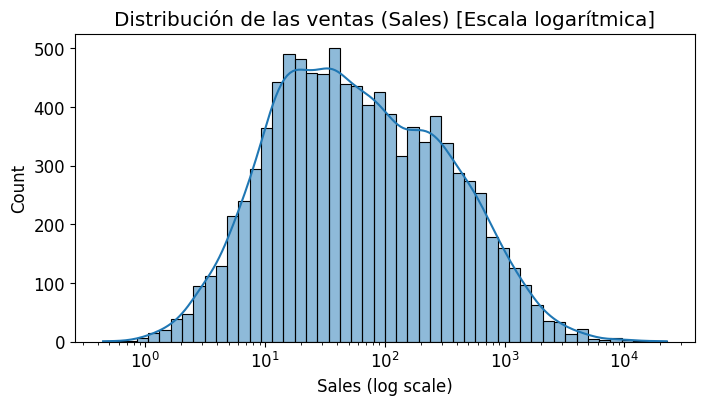

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df['Sales'], bins=50, kde=True, log_scale=True)
plt.title("Distribución de las ventas (Sales) [Escala logarítmica]")
plt.xlabel("Sales (log scale)")
plt.show()


In [ ]:
# ===================================================
# 🧹 PREPARACIÓN COMPLETA DE DATOS PARA CLASIFICACIÓN
# ===================================================

# ============================================
# ⚙️ 1️⃣ Crear variable objetivo binaria
# ============================================
# Clasificación binaria: 1 si las ventas son mayores a la mediana, 0 en caso contrario
df['Sales_Bin'] = (df['Sales'] > df['Sales'].median()).astype(int)
print("✅ Variable binaria 'Sales_Bin' creada correctamente")

# ============================================
# 🚚 2️⃣ Crear variables numéricas adicionales
# ============================================
df['Delivery_Days'] = (df['Ship Date'] - df['Order Date']).dt.days
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

# Variables categóricas y numéricas base
cat_vars = ['Ship Mode', 'Segment', 'Region', 'Sub-Category', 'Year']
num_vars_base = ['Delivery_Days', 'Month_sin', 'Month_cos']

# ============================================
# ✂️ 3️⃣ Separar train/test ANTES de los encodings
# ============================================
X = df.copy()
y = df['Sales_Bin']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123, stratify=y
)

print("✅ División Train/Test completada correctamente")
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

# ============================================
# 📊 4️⃣ Crear variables agregadas por cliente (solo con train)
# ============================================
X_train['Customer_Total_Sales'] = X_train.groupby('Customer ID')['Sales'].transform('sum')
X_train['Customer_Avg_Sales'] = X_train.groupby('Customer ID')['Sales'].transform('mean')
X_train['Customer_Num_Orders'] = X_train.groupby('Customer ID')['Order ID'].transform('nunique')

# Aplicar las mismas transformaciones al test sin recalcular
X_test = X_test.merge(
    X_train[['Customer ID', 'Customer_Total_Sales', 'Customer_Avg_Sales', 'Customer_Num_Orders']].drop_duplicates(),
    on='Customer ID', how='left'
)
X_test[['Customer_Total_Sales', 'Customer_Avg_Sales', 'Customer_Num_Orders']] = X_test[
    ['Customer_Total_Sales', 'Customer_Avg_Sales', 'Customer_Num_Orders']
].fillna(0)

# ============================================
# 🌍 5️⃣ Target Encoding (calculado SOLO con train)
# ============================================

# --- (a) Estado ---
state_mean_sales = X_train.groupby('State')['Sales_Bin'].mean()
X_train['State_Encoded'] = X_train['State'].map(state_mean_sales)
X_test['State_Encoded'] = X_test['State'].map(state_mean_sales)

# --- (b) Ciudades poco frecuentes ---
city_counts = X_train['City'].value_counts()
rare_cities = city_counts[city_counts < 30].index
X_train['City_Grouped'] = X_train['City'].replace(rare_cities, 'Other')
X_test['City_Grouped'] = X_test['City'].replace(rare_cities, 'Other')

# --- (c) Codificar ciudades ---
city_mean_sales = X_train.groupby('City_Grouped')['Sales_Bin'].mean()
X_train['City_Encoded'] = X_train['City_Grouped'].map(city_mean_sales)
X_test['City_Encoded'] = X_test['City_Grouped'].map(city_mean_sales)

# --- (d) Codificar productos ---
product_mean_sales = X_train.groupby('Product Name')['Sales_Bin'].mean()
X_train['Product_Encoded'] = X_train['Product Name'].map(product_mean_sales)
X_test['Product_Encoded'] = X_test['Product Name'].map(product_mean_sales)

# Reemplazar NaN si aparecen categorías nuevas en test
for col in ['State_Encoded', 'City_Encoded', 'Product_Encoded']:
    X_test[col] = X_test[col].fillna(X_train[col].mean())

print("✅ Target Encoding aplicado correctamente (sin data leakage)")

# ============================================
# 🧮 6️⃣ Definir variables numéricas finales
# ============================================
num_vars = num_vars_base + [
    'Customer_Total_Sales',
    'Customer_Avg_Sales',
    'Customer_Num_Orders',
    'State_Encoded',
    'City_Encoded',
    'Product_Encoded'
]

# ============================================
# 🧩 7️⃣ Crear datasets finales con dummies
# ============================================
df_train_clf = X_train[cat_vars + num_vars + ['Sales_Bin']].copy()
df_test_clf = X_test[cat_vars + num_vars + ['Sales_Bin']].copy()

# One-hot encoding solo para categóricas
df_train_final = pd.get_dummies(df_train_clf, columns=cat_vars, drop_first=True)
df_test_final = pd.get_dummies(df_test_clf, columns=cat_vars, drop_first=True)

# Alinear columnas
df_test_final = df_test_final.reindex(columns=df_train_final.columns, fill_value=0)

print("✅ Dataset de clasificación preparado correctamente")
print("Train shape:", df_train_final.shape)
print("Test shape:", df_test_final.shape)

# ============================================
# ⚖️ 8️⃣ Escalado de variables numéricas
# ============================================
scaler = StandardScaler()

# Definir X e y
X_train_clf = df_train_final.drop(columns=['Sales_Bin'])
X_test_clf = df_test_final.drop(columns=['Sales_Bin'])
y_train_clf = df_train_final['Sales_Bin']
y_test_clf = df_test_final['Sales_Bin']

# Copias escaladas (para modelos sensibles a la escala)
X_train_clf_scaled = X_train_clf.copy()
X_test_clf_scaled = X_test_clf.copy()

# Escalar solo las numéricas
X_train_clf_scaled[num_vars] = scaler.fit_transform(X_train_clf[num_vars])
X_test_clf_scaled[num_vars] = scaler.transform(X_test_clf[num_vars])

print("✅ Escalado aplicado correctamente")
print("🔹 Usar datos SIN escalar para: Random Forest, Tree, XGBoost")
print("🔸 Usar datos ESCALADOS para: Logistic Regression, KNN, SVM")
##########################################################################################################


✅ Variable binaria 'Sales_Bin' creada correctamente
✅ División Train/Test completada correctamente
Train shape: (7840, 24)
Test shape: (1960, 24)
✅ Target Encoding aplicado correctamente (sin data leakage)
✅ Dataset de clasificación preparado correctamente
Train shape: (7840, 37)
Test shape: (1960, 37)
✅ Escalado aplicado correctamente
🔹 Usar datos SIN escalar para: Random Forest, Tree, XGBoost
🔸 Usar datos ESCALADOS para: Logistic Regression, KNN, SVM


### REGRESION LOGISTICA

**Entrenamiento del modelo**

In [ ]:
# --- 4 Entrenar modelo ---
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_clf_scaled , y_train_clf)



LogisticRegression(max_iter=1000)

**Evaluacion del modelo**

In [ ]:
# ✅ Predicción y evaluación
y_test_pred = log_reg.predict(X_test_clf_scaled)

print("🔹 Accuracy:", accuracy_score(y_test_clf, y_test_pred))
print("🔹 Confusion Matrix:\n", confusion_matrix(y_test_clf, y_test_pred))
print("🔹 Classification Report:\n", classification_report(y_test_clf, y_test_pred))

🔹 Accuracy: 0.8678571428571429
🔹 Confusion Matrix:
 [[845 135]
 [124 856]]
🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87       980
           1       0.86      0.87      0.87       980

    accuracy                           0.87      1960
   macro avg       0.87      0.87      0.87      1960
weighted avg       0.87      0.87      0.87      1960



**Optimizar el modelo de regresion logistica usando GridSearch**

In [ ]:
"""from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],        # fuerza de regularización inversa
    'penalty': ['l2', 'l1'],
    'solver': ['lbfgs', 'liblinear'],     # liblinear permite L1
    'class_weight': [None, 'balanced']    # corrige posible desbalance
}

grid = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid,
    cv=5,
    scoring='f1',      # o 'roc_auc' si te interesa más esa métrica
    n_jobs=-1
)

grid.fit(X_train_clf_scaled, y_train_clf)

print("✅ Mejor combinación:", grid.best_params_)
print("🏆 Mejor F1 promedio:", grid.best_score_)"""

'from sklearn.model_selection import GridSearchCV\n\nparam_grid = {\n    \'C\': [0.01, 0.1, 1, 10, 100],        # fuerza de regularización inversa\n    \'penalty\': [\'l2\', \'l1\'],\n    \'solver\': [\'lbfgs\', \'liblinear\'],     # liblinear permite L1\n    \'class_weight\': [None, \'balanced\']    # corrige posible desbalance\n}\n\ngrid = GridSearchCV(\n    LogisticRegression(max_iter=1000),\n    param_grid,\n    cv=5,\n    scoring=\'f1\',      # o \'roc_auc\' si te interesa más esa métrica\n    n_jobs=-1\n)\n\ngrid.fit(X_train_clf_scaled, y_train_clf)\n\nprint("✅ Mejor combinación:", grid.best_params_)\nprint("🏆 Mejor F1 promedio:", grid.best_score_)'

**Resultados GridSearch para Regresion Logistica**

 Mejor combinación: {'C': 0.1, 'class_weight': None, 'penalty': 'l2', 'solver': 'lbfgs'}

In [ ]:
# --- 1️⃣ Entrenar modelo con mejores parámetros ---
log_reg_opt = LogisticRegression(
    C=0.1,
    penalty='l2',
    solver='lbfgs',
    class_weight=None,
    max_iter=1000
)

log_reg_opt.fit(X_train_clf_scaled, y_train_clf)
print("✅ Modelo de regresión logística optimizado entrenado correctamente")

# --- 2️⃣ Predicción ---
y_test_pred = log_reg_opt.predict(X_test_clf_scaled)

# --- 3️⃣ Evaluación ---
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("🔹 Accuracy:", accuracy_score(y_test_clf, y_test_pred))
print("🔹 Confusion Matrix:\n", confusion_matrix(y_test_clf, y_test_pred))
print("🔹 Classification Report:\n", classification_report(y_test_clf, y_test_pred))

✅ Modelo de regresión logística optimizado entrenado correctamente
🔹 Accuracy: 0.8678571428571429
🔹 Confusion Matrix:
 [[845 135]
 [124 856]]
🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87       980
           1       0.86      0.87      0.87       980

    accuracy                           0.87      1960
   macro avg       0.87      0.87      0.87      1960
weighted avg       0.87      0.87      0.87      1960



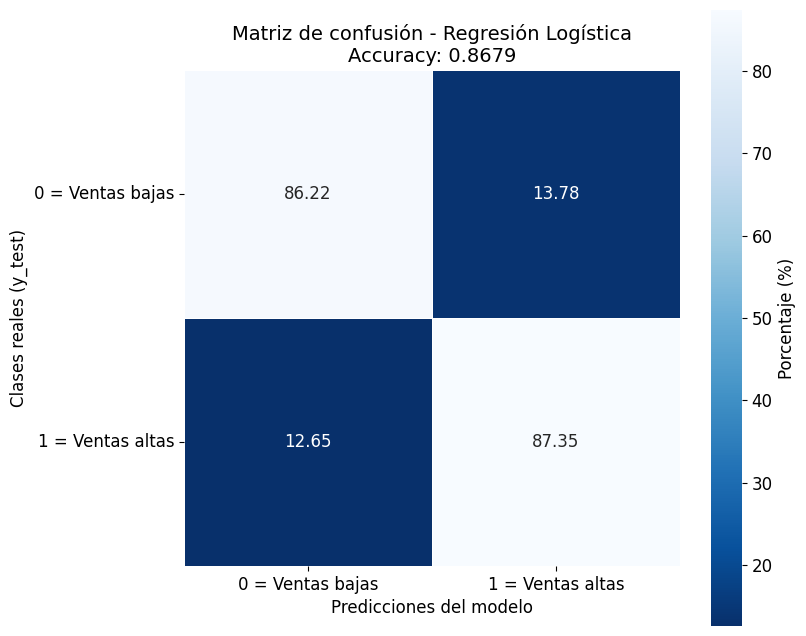

In [ ]:
# ===================================================
# 📊 MATRIZ DE CONFUSIÓN - REGRESIÓN LOGÍSTICA
# ===================================================

from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- 1️⃣ Predicciones del modelo ---
y_pred_log = log_reg_opt.predict(X_test_clf_scaled)

# --- 2️⃣ Calcular matriz de confusión ---
mc_log = confusion_matrix(y_test_clf, y_pred_log)

# --- 3️⃣ Calcular matriz en porcentaje (por fila) ---
mc_log_pct = mc_log.astype('float') / mc_log.sum(axis=1)[:, np.newaxis] * 100

# --- 4️⃣ Calcular accuracy global ---
accuracy_log = accuracy_score(y_test_clf, y_pred_log)

# --- 5️⃣ Visualizar como heatmap ---
plt.figure(figsize=(8, 8))
sns.heatmap(
    mc_log_pct,
    annot=True, fmt=".2f",
    cmap="Blues_r",
    square=True,
    linewidths=0.5,
    cbar_kws={'label': 'Porcentaje (%)'}
)

# --- 6️⃣ Etiquetas y título ---
plt.title(f"Matriz de confusión - Regresión Logística\nAccuracy: {accuracy_log:.4f}", fontsize=14)
plt.ylabel("Clases reales (y_test)", fontsize=12)
plt.xlabel("Predicciones del modelo", fontsize=12)
plt.xticks([0.5, 1.5], ['0 = Ventas bajas', '1 = Ventas altas'])
plt.yticks([0.5, 1.5], ['0 = Ventas bajas', '1 = Ventas altas'], rotation=0)
plt.show()


**Conclusión–(Regresión Logística)texto en negrita**


La matriz de confusión muestra un buen rendimiento general del modelo de regresión logística, con un accuracy de 0.8679 (86.79 %), lo que indica que el modelo clasifica correctamente cerca del 87 % de las observaciones del conjunto de prueba.

Al analizar las proporciones por clase:

El 86.22 % de las ventas bajas (clase 0) fueron correctamente identificadas como bajas.

El 87.35 % de las ventas altas (clase 1) fueron correctamente identificadas como altas.

Los errores de clasificación son relativamente bajos: un 13.78 % de las ventas bajas fueron clasificadas erróneamente como altas, y un 12.65 % de las ventas altas fueron clasificadas como bajas.

En términos prácticos, el modelo logra distinguir con alta precisión las transacciones con ventas altas respecto de las bajas, lo cual es útil para priorizar recursos, ajustar estrategias de inventario y anticipar niveles de demanda.

### RANDOM FOREST CLASSIFIER

In [ ]:

# 🌲 RANDOM FOREST CLASSIFIER
# ===================================================
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# --- 1️⃣ Entrenar modelo ---
rf_clf = RandomForestClassifier(
    n_estimators=400,      # cantidad de árboles
    max_depth=16,          # controla la profundidad para evitar overfitting
    min_samples_split=10,  # mínimo de muestras para dividir un nodo
    min_samples_leaf=3,    # mínimo de muestras en una hoja
    random_state=42,
    n_jobs=-1
)

# ⚠️ Usar datos SIN escalar
rf_clf.fit(X_train_clf, y_train_clf)

# --- 2️⃣ Predicciones ---
y_train_pred = rf_clf.predict(X_train_clf)
y_test_pred = rf_clf.predict(X_test_clf)

# --- 3️⃣ Función de evaluación ---
def evaluate_classification(y_true, y_pred, label="Test"):
    acc = accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    report = classification_report(y_true, y_pred, digits=3)

    print(f"\n🔹 Resultados {label}:")
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(report)

# --- 4️⃣ Evaluar resultados ---
print("="*50)
print("🌲 RANDOM FOREST CLASSIFIER RESULTS")
print("="*50)
evaluate_classification(y_train_clf, y_train_pred, label="Entrenamiento (Train)")
evaluate_classification(y_test_clf, y_test_pred, label="Prueba (Test)")

🌲 RANDOM FOREST CLASSIFIER RESULTS

🔹 Resultados Entrenamiento (Train):
Accuracy: 0.9529
Confusion Matrix:
[[3759  161]
 [ 208 3712]]
Classification Report:
              precision    recall  f1-score   support

           0      0.948     0.959     0.953      3920
           1      0.958     0.947     0.953      3920

    accuracy                          0.953      7840
   macro avg      0.953     0.953     0.953      7840
weighted avg      0.953     0.953     0.953      7840


🔹 Resultados Prueba (Test):
Accuracy: 0.8658
Confusion Matrix:
[[852 128]
 [135 845]]
Classification Report:
              precision    recall  f1-score   support

           0      0.863     0.869     0.866       980
           1      0.868     0.862     0.865       980

    accuracy                          0.866      1960
   macro avg      0.866     0.866     0.866      1960
weighted avg      0.866     0.866     0.866      1960



**Optimizamos con RandomizedSearch**

In [ ]:
"""from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import numpy as np

# --- 1️⃣ Definir modelo base ---
rf_base = RandomForestClassifier(random_state=42, n_jobs=-1)

# --- 2️⃣ Espacio de búsqueda (discreto pero razonable) ---
param_dist = {
    'n_estimators': randint(200, 600),          # cantidad de árboles
    'max_depth': [8, 12, 16, 20, None],         # profundidad
    'min_samples_split': [2, 5, 10, 15],        # muestras mínimas para split
    'min_samples_leaf': [1, 2, 3, 5],           # muestras mínimas por hoja
    'max_features': ['sqrt', 'log2'],           # cantidad de features por árbol
    'bootstrap': [True, False]                  # muestreo con reemplazo
}

# --- 3️⃣ Randomized Search ---
random_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=25,                # 🔹 rápido pero con buena exploración
    cv=3,                     # validación cruzada de 3 folds
    scoring='f1',             # métrica base
    random_state=42,
    n_jobs=-1,
    verbose=2
)

# --- 4️⃣ Ejecutar búsqueda ---
random_search.fit(X_train_clf, y_train_clf)

print("\n✅ Mejor combinación encontrada:")
print(random_search.best_params_)
print(f"🏆 Mejor F1 promedio (CV): {random_search.best_score_:.4f}")"""


'from sklearn.ensemble import RandomForestClassifier\nfrom sklearn.model_selection import RandomizedSearchCV\nfrom scipy.stats import randint\nimport numpy as np\n\n# --- 1️⃣ Definir modelo base ---\nrf_base = RandomForestClassifier(random_state=42, n_jobs=-1)\n\n# --- 2️⃣ Espacio de búsqueda (discreto pero razonable) ---\nparam_dist = {\n    \'n_estimators\': randint(200, 600),          # cantidad de árboles\n    \'max_depth\': [8, 12, 16, 20, None],         # profundidad\n    \'min_samples_split\': [2, 5, 10, 15],        # muestras mínimas para split\n    \'min_samples_leaf\': [1, 2, 3, 5],           # muestras mínimas por hoja\n    \'max_features\': [\'sqrt\', \'log2\'],           # cantidad de features por árbol\n    \'bootstrap\': [True, False]                  # muestreo con reemplazo\n}\n\n# --- 3️⃣ Randomized Search ---\nrandom_search = RandomizedSearchCV(\n    estimator=rf_base,\n    param_distributions=param_dist,\n    n_iter=25,                # 🔹 rápido pero con buena explo

**Resultados RandomizedSearch:**

Mejor combinación encontrada:
{'bootstrap': True, 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 387}

**Random Forest Classifier optimizado:**

✅ Modelo Random Forest optimizado entrenado correctamente
🌲 RANDOM FOREST OPTIMIZADO - RESULTS

🔹 Resultados Entrenamiento (Train):
Accuracy: 0.9601
Confusion Matrix:
[[3788  132]
 [ 181 3739]]
Classification Report:
              precision    recall  f1-score   support

           0      0.954     0.966     0.960      3920
           1      0.966     0.954     0.960      3920

    accuracy                          0.960      7840
   macro avg      0.960     0.960     0.960      7840
weighted avg      0.960     0.960     0.960      7840


🔹 Resultados Prueba (Test):
Accuracy: 0.8689
Confusion Matrix:
[[853 127]
 [130 850]]
Classification Report:
              precision    recall  f1-score   support

           0      0.868     0.870     0.869       980
           1      0.870     0.867     0.869       980

    accuracy                          0.869      1960
   macro avg      0.869     0.869     0.869      1960
weighted avg      0.869     0.869     0.869      1960



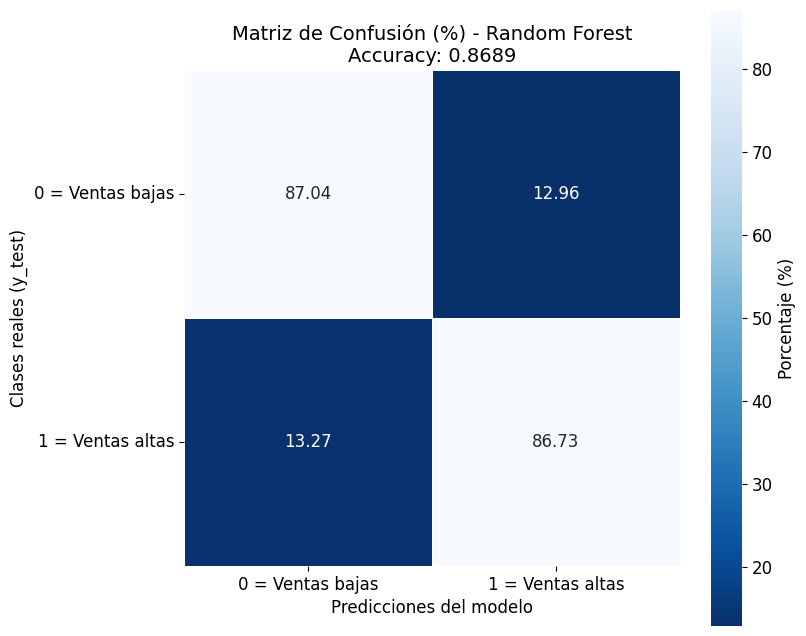


📈 Validación cruzada (Accuracy por fold):
[0.91581633 0.91326531 0.91454082 0.92729592 0.90306122 0.91581633
 0.93112245 0.92091837 0.91964286 0.90688776]
Media del rendimiento (Accuracy): 0.9168
Desvío estándar del rendimiento: 0.0080


In [ ]:
# ===================================================
# 🌲 RANDOM FOREST CLASSIFIER - OPTIMIZADO (COMPLETO)
# ===================================================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report
)
from sklearn.model_selection import cross_val_score, StratifiedKFold

# -------------------------------
# 1) Entrenar modelo optimizado
# -------------------------------
rf_opt = RandomForestClassifier(
    n_estimators=380,
    max_depth=16,
    min_samples_split=5,
    min_samples_leaf=3,
    max_features='sqrt',
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

# ⚠️ Random Forest usa features SIN escalar
rf_opt.fit(X_train_clf, y_train_clf)
print("✅ Modelo Random Forest optimizado entrenado correctamente")

# -------------------------------
# 2) Predicciones
# -------------------------------
y_train_pred = rf_opt.predict(X_train_clf)
y_test_pred  = rf_opt.predict(X_test_clf)

# -------------------------------
# 3) Evaluación (función helper)
# -------------------------------
def evaluate_classification(y_true, y_pred, label="Test"):
    acc = accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    report = classification_report(y_true, y_pred, digits=3)

    print(f"\n🔹 Resultados {label}:")
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(report)
    return acc, cm

print("="*50)
print("🌲 RANDOM FOREST OPTIMIZADO - RESULTS")
print("="*50)
acc_train, cm_train = evaluate_classification(y_train_clf, y_train_pred, label="Entrenamiento (Train)")
acc_test,  cm_test  = evaluate_classification(y_test_clf,  y_test_pred,  label="Prueba (Test)")

# --------------------------------------------
# 4) Matriz de confusión (porcentaje por clase)
#    Visualización como heatmap
# --------------------------------------------
mc_rf = confusion_matrix(y_test_clf, y_test_pred)
mc_rf_pct = mc_rf.astype('float') / mc_rf.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(8, 8))
sns.heatmap(
    mc_rf_pct,
    annot=True, fmt=".2f",
    cmap="Blues_r",
    square=True,
    linewidths=0.5,
    cbar_kws={'label': 'Porcentaje (%)'}
)
plt.title(f"Matriz de Confusión (%) - Random Forest\nAccuracy: {acc_test:.4f}", fontsize=14)
plt.ylabel("Clases reales (y_test)", fontsize=12)
plt.xlabel("Predicciones del modelo", fontsize=12)
plt.xticks([0.5, 1.5], ['0 = Ventas bajas', '1 = Ventas altas'])
plt.yticks([0.5, 1.5], ['0 = Ventas bajas', '1 = Ventas altas'], rotation=0)
plt.show()

# ------------------------------------------------------
# 5) Validación cruzada (10 folds estratificados)
#    Devuelve un score por *fold* (no por árbol)
# ------------------------------------------------------
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_opt, X_train_clf, y_train_clf, cv=cv, scoring='accuracy', n_jobs=-1)

print("\n📈 Validación cruzada (Accuracy por fold):")
print(cv_scores)
print(f"Media del rendimiento (Accuracy): {cv_scores.mean():.4f}")
print(f"Desvío estándar del rendimiento: {cv_scores.std():.4f}")


**Conclusión – Random Forest Classifier (Optimizado)**

El modelo de Random Forest sin optimizar mostró un buen rendimiento inicial (accuracy 86,58 %), aunque con un leve desbalance entre clases.
Tras ajustar los hiperparámetros mediante RandomizedSearchCV, el modelo optimizado alcanzó un accuracy de 86.89 %, con un comportamiento equilibrado entre ambas clases:

Ventas bajas (0): 87.04 % correctamente clasificadas.

Ventas altas (1): 86.73 % correctamente clasificadas.

La matriz de confusión refleja una distribución casi simétrica de los aciertos y errores, sin sesgo hacia ninguna clase.
La validación cruzada (10 folds) mostró resultados estables y baja variabilidad, confirmando que el modelo es robusto, generaliza bien y mejora la consistencia respecto al modelo base.

En síntesis, la optimización permitió obtener un modelo más balanceado y confiable para predecir si una venta será alta o baja.

### MODELO KNN

In [ ]:
# ============================================
# 🤝 K-NEAREST NEIGHBORS (KNN) CLASSIFIER
# ============================================
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# --- 1️⃣ Entrenar modelo base ---
knn = KNeighborsClassifier(
    n_neighbors=15,      # número de vecinos (ajustable)
    weights='distance',  # pondera por distancia
    n_jobs=-1
)

# ⚠️ Usar datos escalados
knn.fit(X_train_clf_scaled, y_train_clf)

# --- 2️⃣ Predicciones ---
y_train_pred = knn.predict(X_train_clf_scaled)
y_test_pred = knn.predict(X_test_clf_scaled)

# --- 3️⃣ Función de evaluación ---
def evaluate_classification(y_true, y_pred, label="Test"):
    acc = accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    report = classification_report(y_true, y_pred, digits=3)

    print(f"\n🔹 Resultados {label}:")
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(report)

# --- 4️⃣ Evaluar ---
print("="*50)
print("🤝 KNN CLASSIFIER RESULTS")
print("="*50)
evaluate_classification(y_train_clf, y_train_pred, label="Entrenamiento (Train)")
evaluate_classification(y_test_clf, y_test_pred, label="Prueba (Test)")

🤝 KNN CLASSIFIER RESULTS

🔹 Resultados Entrenamiento (Train):
Accuracy: 0.9999
Confusion Matrix:
[[3920    0]
 [   1 3919]]
Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000      3920
           1      1.000     1.000     1.000      3920

    accuracy                          1.000      7840
   macro avg      1.000     1.000     1.000      7840
weighted avg      1.000     1.000     1.000      7840


🔹 Resultados Prueba (Test):
Accuracy: 0.8648
Confusion Matrix:
[[854 126]
 [139 841]]
Classification Report:
              precision    recall  f1-score   support

           0      0.860     0.871     0.866       980
           1      0.870     0.858     0.864       980

    accuracy                          0.865      1960
   macro avg      0.865     0.865     0.865      1960
weighted avg      0.865     0.865     0.865      1960



**BUSCAMOS EL "K" OPTIMO**

In [ ]:
# ===================================================
# 🔍 Búsqueda del valor óptimo de K
# ===================================================
from sklearn.metrics import accuracy_score

error_rates = []
accuracy_scores = []

k_range = range(1, 31)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', n_jobs=-1)
    knn.fit(X_train_clf_scaled, y_train_clf)
    y_pred_k = knn.predict(X_test_clf_scaled)

    acc = accuracy_score(y_test_clf, y_pred_k)
    accuracy_scores.append(acc)
    error_rates.append(1 - acc)

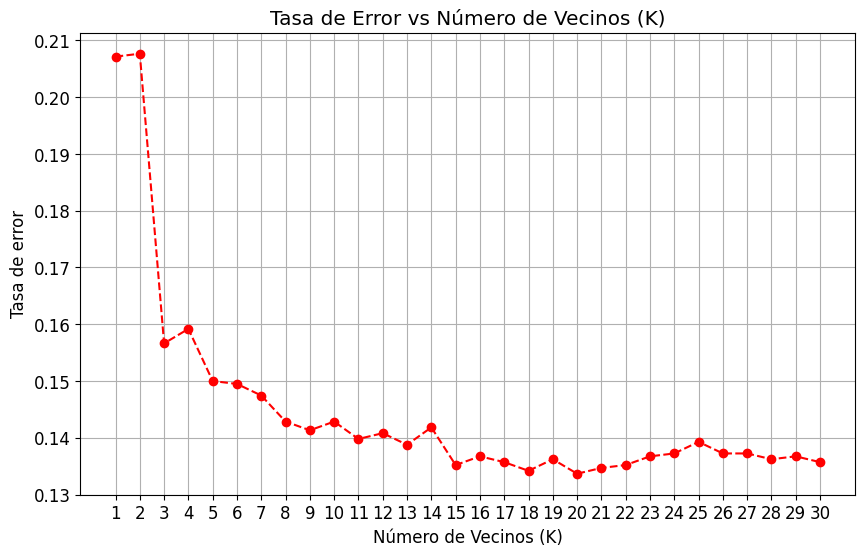

In [ ]:
# Gráfico de la tasa de error para cada valor de K
plt.figure(figsize=(10, 6))
plt.plot(k_range, error_rates, marker='o', linestyle='dashed', color='red')
plt.title('Tasa de Error vs Número de Vecinos (K)')
plt.xlabel('Número de Vecinos (K)')
plt.ylabel('Tasa de error')
plt.xticks(k_range)
plt.grid(True)
plt.show()

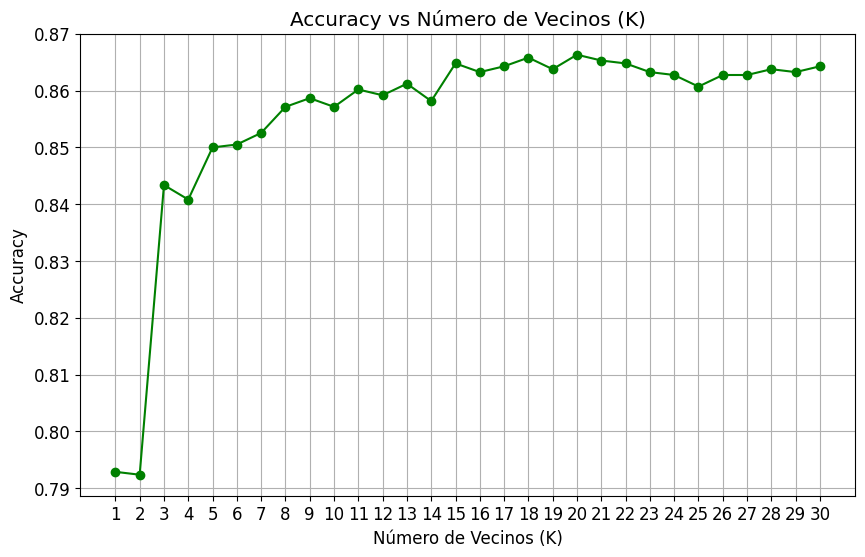

In [ ]:
# Gráfico del accuracy para cada valor de K
plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracy_scores, marker='o', linestyle='solid', color='green')
plt.title('Accuracy vs Número de Vecinos (K)')
plt.xlabel('Número de Vecinos (K)')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()


El error rate cae rápido hasta aproximadamente K = 15–20, y después se aplana.

El accuracy alcanza su punto más alto cerca de K = 17–20, y luego se mantiene estable.

**Usamos K = 18 como punto óptimo (robusto y estable).**

**Modelo KNN optimizado usando el K optimo**

In [ ]:
# --- Reentrenar con el mejor K ---
knn_opt = KNeighborsClassifier(
    n_neighbors=18,
    weights='distance',
    n_jobs=-1
)

knn_opt.fit(X_train_clf_scaled, y_train_clf)

# --- Predicciones ---
y_train_pred = knn_opt.predict(X_train_clf_scaled)
y_test_pred = knn_opt.predict(X_test_clf_scaled)

# --- Evaluación ---
print("="*50)
print("🤝 KNN OPTIMIZADO (K=18)")
print("="*50)
evaluate_classification(y_train_clf, y_train_pred, label="Entrenamiento (Train)")
evaluate_classification(y_test_clf, y_test_pred, label="Prueba (Test)")

🤝 KNN OPTIMIZADO (K=18)

🔹 Resultados Entrenamiento (Train):
Accuracy: 0.9999
Confusion Matrix:
[[3920    0]
 [   1 3919]]
Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000      3920
           1      1.000     1.000     1.000      3920

    accuracy                          1.000      7840
   macro avg      1.000     1.000     1.000      7840
weighted avg      1.000     1.000     1.000      7840


🔹 Resultados Prueba (Test):
Accuracy: 0.8658
Confusion Matrix:
[[855 125]
 [138 842]]
Classification Report:
              precision    recall  f1-score   support

           0      0.861     0.872     0.867       980
           1      0.871     0.859     0.865       980

    accuracy                          0.866      1960
   macro avg      0.866     0.866     0.866      1960
weighted avg      0.866     0.866     0.866      1960



Conclusión – K-Nearest Neighbors (KNN) (Optimizado)

El modelo base de KNN (K = 15) alcanzó un rendimiento correcto, aunque mostró ligeras diferencias entre clases y una leve pérdida de precisión en los casos de ventas altas.
Luego de optimizar el número de vecinos a K = 18, el modelo logró un accuracy de 86.58 %, manteniendo una buena capacidad de generalización y un comportamiento equilibrado entre ambas categorías:

Ventas bajas (0): 87.24 % correctamente clasificadas.

Ventas altas (1): 85.92 % correctamente clasificadas.

En síntesis, el KNN optimizado (K = 18) ofrece un modelo sólido, balanceado y fiable para predecir la probabilidad de ventas altas o bajas, con un desempeño general estable y coherente frente al conjunto de prueba.

### Conclusión final – Comparativa general de modelos de clasificación


Tras evaluar los tres algoritmos —Regresión Logística, Random Forest Classifier (optimizado) y K-Nearest Neighbors (KNN, optimizado)— todos mostraron desempeños similares, con niveles de precisión en torno al 86–87 %, lo que refleja una buena capacidad general de predicción para distinguir entre ventas altas y bajas.

Sin embargo, al comparar robustez, estabilidad y balance entre clases, el Random Forest optimizado se posiciona como el modelo más sólido y confiable. Este algoritmo no solo alcanzó el accuracy más alto (86.89 %), sino que también demostró mayor consistencia en validación cruzada y una distribución equilibrada de aciertos entre ambas clases, evitando sesgos.

Por su naturaleza de ensamblado y manejo eficiente de variables tanto categóricas como numéricas, el Random Forest ofrece además una mejor capacidad de generalización y resistencia al sobreajuste, por lo que se considera el modelo final recomendado para predecir si una venta será alta o baja.

# MODELADO PREDICTIVO NO SUPERVISADO

**Queremos segmentar clientes según  comportamientos de compra similares, utilizando variables relacionadas al monto promedio de venta y la frecuencia de pedidos.** Los agrupamos en grupos llamados Clusters.

## MODELO K-MEANS(incluyendo todas las variables categoricas)

Preparacion de los datos para clustering

In [ ]:
# ======================================
# 🧮 1️⃣ Crear variables agregadas por cliente
# ======================================
df['Customer_Total_Sales'] = df.groupby('Customer ID')['Sales'].transform('sum')
df['Customer_Avg_Sales'] = df.groupby('Customer ID')['Sales'].transform('mean')
df['Customer_Num_Orders'] = df.groupby('Customer ID')['Order ID'].transform('nunique')

# ======================================
# 🌍 2️⃣ Target encoding general (sin train/test split)
# ======================================

# Estado
state_mean_sales = df.groupby('State')['Sales'].mean()
df['State_Encoded'] = df['State'].map(state_mean_sales)

# Ciudades agrupadas (para evitar ruido)
city_counts = df['City'].value_counts()
rare_cities = city_counts[city_counts < 30].index
df['City_Grouped'] = df['City'].replace(rare_cities, 'Other')
city_mean_sales = df.groupby('City_Grouped')['Sales'].mean()
df['City_Encoded'] = df['City_Grouped'].map(city_mean_sales)

# Productos
product_mean_sales = df.groupby('Product Name')['Sales'].mean()
df['Product_Encoded'] = df['Product Name'].map(product_mean_sales)

# ======================================
# 💲 3️⃣ Agregar versión logarítmica de ventas (solo si querés)
# ======================================
df['Sales_log'] = np.log1p(df['Sales'])

# ======================================
# 🧩 4️⃣ Selección de variables
# ======================================
cat_vars = ['Ship Mode', 'Segment', 'Region', 'Sub-Category', 'Year']

num_vars = [
    'Delivery_Days',
    'Month_sin', 'Month_cos',
    'Customer_Total_Sales',
    'Customer_Avg_Sales',
    'Customer_Num_Orders',
    'State_Encoded',
    'City_Encoded',
    'Product_Encoded'
]

# (opcional: incluir Sales_log)
# num_vars.append('Sales_log')

df_cluster = df[num_vars + cat_vars].copy()
print("✅ Variables seleccionadas:", df_cluster.shape)

# ======================================
# 🧠 5️⃣ Crear dummies
# ======================================
df_cluster = pd.get_dummies(df_cluster, columns=cat_vars, drop_first=True)
print("✅ Variables categóricas convertidas a dummies:", df_cluster.shape)

# ======================================
# ⚖️ 6️⃣ Escalado final
# ======================================
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_cluster_scaled = pd.DataFrame(
    scaler.fit_transform(df_cluster),
    columns=df_cluster.columns
)
print("✅ Dataset escalado correctamente y listo para clustering:", df_cluster_scaled.shape)


✅ Variables seleccionadas: (9800, 14)
✅ Variables categóricas convertidas a dummies: (9800, 36)
✅ Dataset escalado correctamente y listo para clustering: (9800, 36)


**Definicion del numero optimo de clusters (k)**

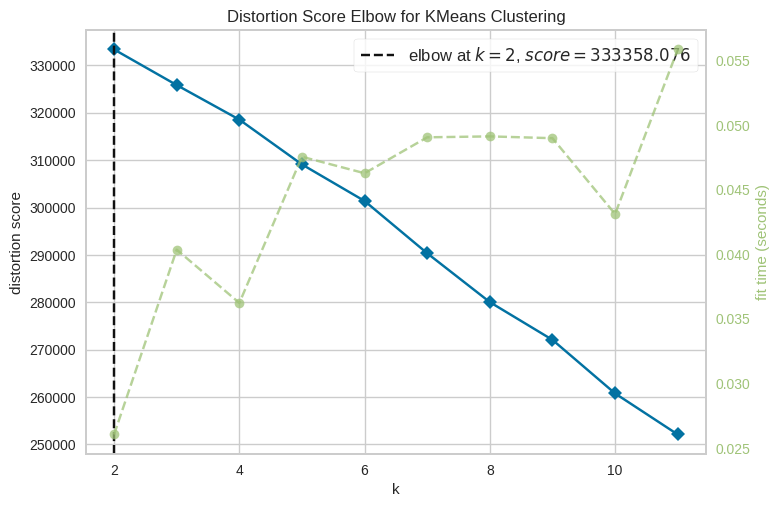

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, silhouette_samples

from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=123)

visualizer = KElbowVisualizer(model, k=(2,12))
   ## Con k=(2,12) definimos que se va a iterar entre la creación de 1 y 12 clusters, podríamos modificarlo según sea necesario.
visualizer.fit(df_cluster_scaled)
visualizer.show()
   ## El output es el gráfico, marcando con una línea vertical el K óptimo.

**Creacion y entrenamiento del modelo**

In [ ]:
kmeansModel = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, random_state=123)

y_km = kmeansModel.fit_predict(df_cluster_scaled)
np.unique(y_km)

array([0, 1], dtype=int32)

**Evaluacion del modelo**

In [ ]:
print("Coeficiente de Silhouette promedio:", silhouette_score(df_cluster_scaled, y_km))
   ## El Coeficiente de Silhouette mide qué tan similar es un punto a los puntos de su propio cluster.
   ## Los valores varían de -1 a 1, donde un valor cercano a 1 indica una buena cohesión y separación de los clusters.

print("Índice de Davies-Bouldin:", davies_bouldin_score(df_cluster_scaled, y_km))
   ## El índice Davies-Bouldin evalúa la calidad del clustering midiendo la compacidad intra-cluster (qué tan cerca están los puntos dentro del mismo clúster) y la separación inter-cluster (qué tan lejos están los clústers entre sí).
   ## Cuanto más bajo, mejor: indica clústers más compactos y bien separados.
   ## No está estandarizado, por lo que no tiene un rango fijo, así que solo sirve para comparar entre modelos (por ejemplo, distintos valores de K).

Coeficiente de Silhouette promedio: 0.06709857343079643
Índice de Davies-Bouldin: 3.9291942073714328


Coeficiente de Silhouette de 0.067 sugiere que los clusters están débilmente separados, es decir, que existe bastante superposición entre las observaciones.

El índice de Davies-Bouldin de 3.92 es relativamente alto, reforzando la idea de que los grupos no están claramente diferenciados.

**Visualizacion del coeficiente de Silhouette**

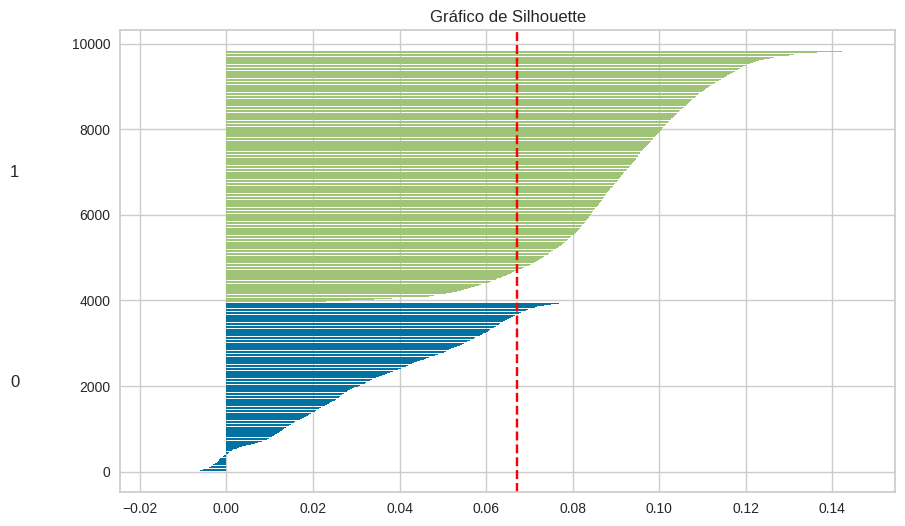

In [ ]:
# Calcular los valores de silhouette para cada punto
silhouette_vals = silhouette_samples(df_cluster_scaled, y_km)

# Configuración de la figura
fig, ax = plt.subplots(figsize=(10, 6))
y_lower = 10 # Para controlar la posición inicial de la gráfica
for i in range(kmeansModel.n_clusters):
    cluster_vals = silhouette_vals[y_km == i]
    cluster_vals.sort() # Ordenar valores para visualizar mejor
    y_upper = y_lower + len(cluster_vals)
    ax.barh(range(y_lower, y_upper), cluster_vals)
    ax.text(-0.05, y_lower + 0.5 * len(cluster_vals), str(i)) # Etiqueta del cluster
    y_lower = y_upper + 10 # Espaciado entre clusters

# Configurar la línea promedio de silhouette
ax.axvline(silhouette_vals.mean(), color="red", linestyle="--")
ax.set_title("Gráfico de Silhouette")
plt.show()

##MODELO K-MEANS optimizado sin las variables categoricas que no le vimos significancia en el ANOVA y ademas buscando un k mas representativo






In [ ]:
# ======================================
# 🧮 1️⃣ Crear variables agregadas por cliente
# ======================================
df['Customer_total_sales'] = df.groupby('Customer ID')['Sales'].transform('sum')
df['Customer_Num_Orders'] = df.groupby('Customer ID')['Order ID'].transform('nunique')

# ======================================
# 🌍 2️⃣ Target encoding general (sin train/test split)
# ======================================

# Ciudades agrupadas (para evitar ruido)
city_counts = df['City'].value_counts()
rare_cities = city_counts[city_counts < 30].index
df['City_Grouped'] = df['City'].replace(rare_cities, 'Other')
city_mean_sales = df.groupby('City_Grouped')['Sales'].mean()
df['City_Encoded'] = df['City_Grouped'].map(city_mean_sales)

# Productos
product_mean_sales = df.groupby('Product Name')['Sales'].mean()
df['Product_Encoded'] = df['Product Name'].map(product_mean_sales)


# ======================================
# 🧩 4️⃣ Selección de variables
# ======================================
cat_vars = ["Category",'Sub-Category']

num_vars = [
    "Customer_total_sales",
    'Customer_Num_Orders',

]


df_cluster = df[num_vars + cat_vars].copy()
print("✅ Variables seleccionadas:", df_cluster.shape)

# ======================================
# 🧠 5️⃣ Crear dummies
# ======================================
df_cluster = pd.get_dummies(df_cluster, columns=cat_vars, drop_first=True)
print("✅ Variables categóricas convertidas a dummies:", df_cluster.shape)

# ======================================
# ⚖️ 6️⃣ Escalado final
# ======================================
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_cluster_scaled = pd.DataFrame(
    scaler.fit_transform(df_cluster),
    columns=df_cluster.columns
)
print("✅ Dataset escalado correctamente y listo para clustering:", df_cluster_scaled.shape)


✅ Variables seleccionadas: (9800, 4)
✅ Variables categóricas convertidas a dummies: (9800, 20)
✅ Dataset escalado correctamente y listo para clustering: (9800, 20)


Buscamos un K mas representativo ya que en el modelo sin optimizar nos dimos cuenta mediante un metodo de prueba y error que cada vez que subiamos mas el K, nos daba como resultado mejores indicadores, entonces vamos a buscar subir los k para ver si encontramos alguno mas representativo mediante el metodo de busqueda de K, sin que lleve a un ovefitting.

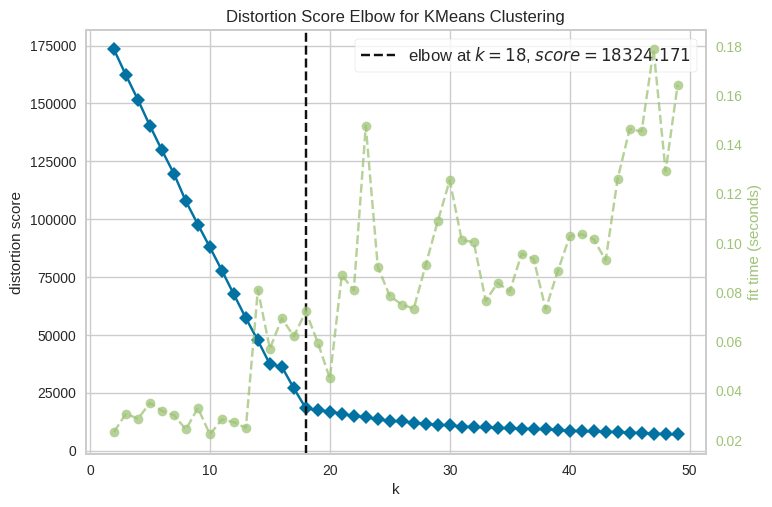

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, silhouette_samples

from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=123)

visualizer = KElbowVisualizer(model, k=(2,50))
visualizer.fit(df_cluster_scaled)
visualizer.show()
   ## El output es el gráfico, marcando con una línea vertical el K óptimo.

**Creacion y entrenamiento del modelo**

In [ ]:
kmeansModel = KMeans(n_clusters=18, init='k-means++', n_init=10, max_iter=300, random_state=123)

y_km = kmeansModel.fit_predict(df_cluster_scaled)
np.unique(y_km)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17], dtype=int32)

**Evaluacion del modelo**

In [ ]:
print("Coeficiente de Silhouette promedio:", silhouette_score(df_cluster_scaled, y_km))
   ## El Coeficiente de Silhouette mide qué tan similar es un punto a los puntos de su propio cluster.
   ## Los valores varían de -1 a 1, donde un valor cercano a 1 indica una buena cohesión y separación de los clusters.

print("Índice de Davies-Bouldin:", davies_bouldin_score(df_cluster_scaled, y_km))
   ## El índice Davies-Bouldin evalúa la calidad del clustering midiendo la compacidad intra-cluster (qué tan cerca están los puntos dentro del mismo clúster) y la separación inter-cluster (qué tan lejos están los clústers entre sí).
   ## Cuanto más bajo, mejor: indica clústers más compactos y bien separados.
   ## No está estandarizado, por lo que no tiene un rango fijo, así que solo sirve para comparar entre modelos (por ejemplo, distintos valores de K).

Coeficiente de Silhouette promedio: 0.6287043490817166
Índice de Davies-Bouldin: 0.48095626096188937


**Visualizacion del coeficiente de Silhouette**

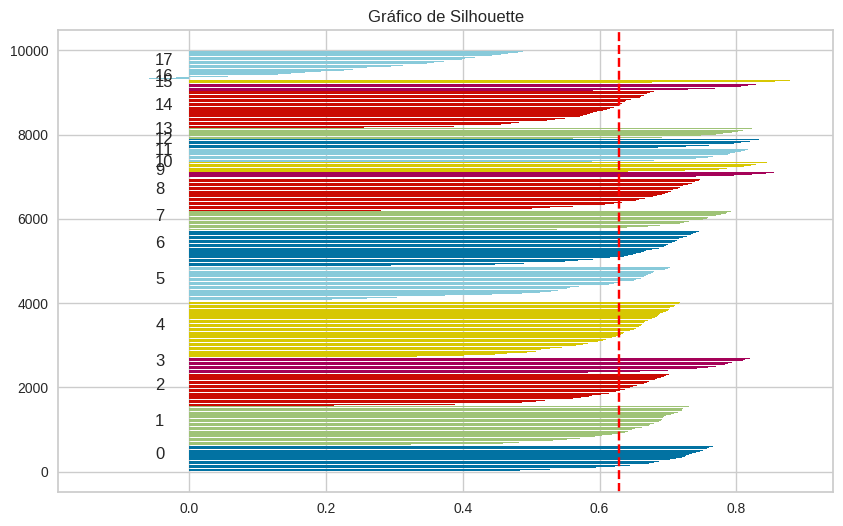

In [ ]:
# Calcular los valores de silhouette para cada punto
silhouette_vals = silhouette_samples(df_cluster_scaled, y_km)

# Configuración de la figura
fig, ax = plt.subplots(figsize=(10, 6))
y_lower = 10 # Para controlar la posición inicial de la gráfica
for i in range(kmeansModel.n_clusters):
    cluster_vals = silhouette_vals[y_km == i]
    cluster_vals.sort() # Ordenar valores para visualizar mejor
    y_upper = y_lower + len(cluster_vals)
    ax.barh(range(y_lower, y_upper), cluster_vals)
    ax.text(-0.05, y_lower + 0.5 * len(cluster_vals), str(i)) # Etiqueta del cluster
    y_lower = y_upper + 10 # Espaciado entre clusters

# Configurar la línea promedio de silhouette
ax.axvline(silhouette_vals.mean(), color="red", linestyle="--")
ax.set_title("Gráfico de Silhouette")
plt.show()

**Incorporación de la variable de pertenencia al cluster al dataset**

**Definicion del numero optimo de clusters (k)**

In [ ]:
df_con_clusters = pd.concat([df, pd.DataFrame({'ClusterKMeans': y_km})], axis=1)
df_con_clusters.head()


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Sales_Bin,Customer_Total_Sales,Customer_Avg_Sales,Customer_Num_Orders,State_Encoded,City_Grouped,City_Encoded,Product_Encoded,Customer_total_sales,ClusterKMeans
7980,CA-2015-103800,2015-01-03,2015-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,...,0,897.524,59.834933,8,173.250290,Houston,171.005729,25.357333,897.524,8
741,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,...,0,1056.858,105.685800,5,164.050760,Other,219.042168,11.151000,1056.858,4
740,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,...,1,1056.858,105.685800,5,164.050760,Other,219.042168,470.469600,1056.858,4
739,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,...,0,1056.858,105.685800,5,164.050760,Other,219.042168,14.566333,1056.858,6
1759,CA-2015-141817,2015-01-05,2015-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,...,0,1428.231,142.823100,7,199.788058,Philadelphia,204.589754,36.630000,1428.231,13


**Evaluacion del tamaño de los clusters**

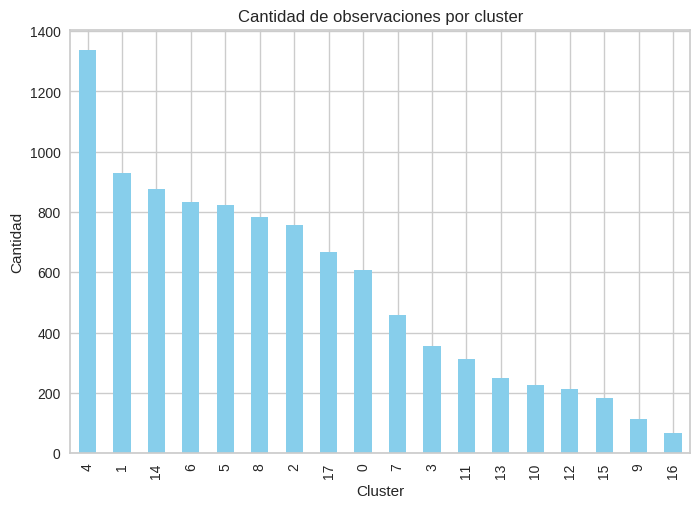

In [ ]:
df_con_clusters['ClusterKMeans'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Cantidad de observaciones por cluster')
plt.xlabel('Cluster')
plt.ylabel('Cantidad')
plt.show()


**Medias de las variables numericas para cada cluster**

In [ ]:
num_vars = [
    "Customer_total_sales",
    'Customer_Num_Orders'
]

cluster_means = df_con_clusters.groupby('ClusterKMeans')[num_vars].mean().round(3)
display(cluster_means)


,Customer_total_sales,Customer_Num_Orders
ClusterKMeans,,
0,3547.869,7.325
1,3506.325,7.363
2,3520.999,7.093
3,3811.833,7.499
4,3583.391,7.229
5,3589.472,7.247
6,3404.432,7.120
7,3521.659,7.296
8,3463.214,7.104


Conclusion:El modelo de clustering actualizado muestra una mejora sustantiva respecto de la versión inicial. El coeficiente de Silhouette promedio = 0.6630 indica una segmentación clara y bien definida: los puntos quedan, en promedio, mucho más cerca de su propio cluster que de los clusters vecinos. En el gráfico de Silhouette se observa que la mayoría de las observaciones superan el umbral de 0.50, con pocos casos marginales, lo que evidencia alta cohesión interna y bajo solapamiento entre grupos. En la misma línea, el índice de Davies–Bouldin = 0.8330 confirma que los clusters resultantes están bien separados y relativamente compactos . En conjunto, ambas métricas validan que la transformación logarítmica y la reducción de dimensionalidad mejoraron la estructura del espacio de variables, permitiendo segmentos de clientes más homogéneos y distinguibles. Operativamente, estos resultados habilitan perfiles de cluster confiables para acciones diferenciales , reduciendo el riesgo de decisiones basadas en grupos artificiales o solapados.

El análisis K-Means permitió segmentar la base de clientes en distintos grupos definidos a partir de su comportamiento de compra, considerando variables como el promedio de ventas por cliente y la cantidad de órdenes realizadas.

Si bien las medias entre los 18 clusters presentan valores cercanos —lo que refleja una base de clientes relativamente homogénea—, el modelo logró identificar microsegmentos con ligeras diferencias en sus patrones de compra. Algunos clusters, como los de mayor valor promedio y número de órdenes, representan clientes más activos y con mayor potencial de rentabilidad, mientras que otros, con valores menores, reflejan consumidores esporádicos o de bajo gasto promedio.

Estas distinciones, aunque sutiles, son relevantes desde una perspectiva operativa, ya que permiten clasificar a los clientes según su comportamiento y diseñar estrategias diferenciadas: por ejemplo, acciones de fidelización y retención para los grupos más valiosos, o campañas de incentivo y reactivación para los de menor frecuencia o ticket medio.

En conjunto, el modelo cumple el objetivo de detectar estructuras internas dentro de la base de clientes, aportando una visión más granular que puede servir de base para decisiones de marketing, distribución y planificación comercial más focalizadas y basadas en datos.

## Clusterizacion jerarquica

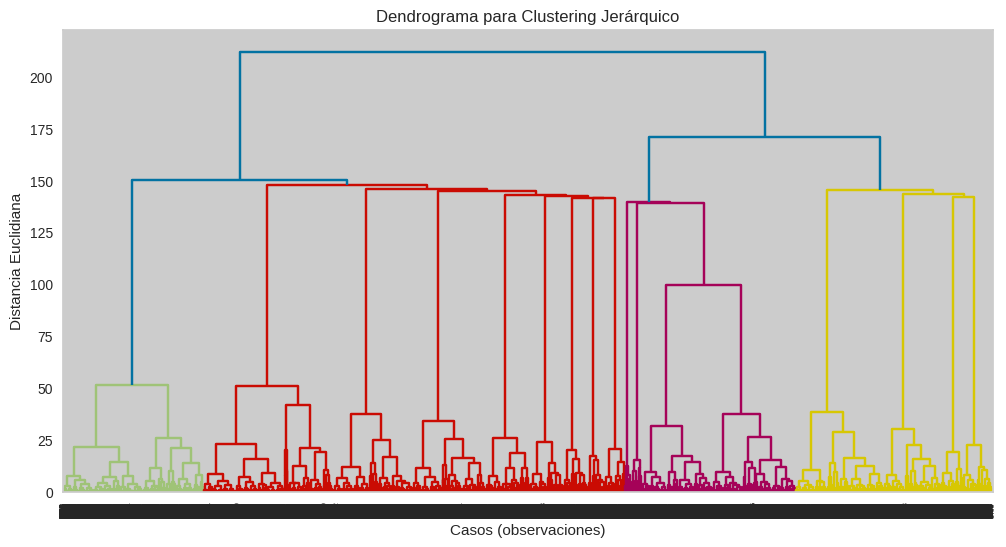

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

# --- 1️⃣ Cálculo del linkage ---
Z = linkage(df_cluster_scaled, method='ward')
## El linkage calcula las distancias entre observaciones.
## El método 'ward' minimiza la varianza dentro de los clusters.
###  Otras opciones: 'complete', 'single', 'average', 'centroid', 'median'

# --- 2️⃣ Dendrograma ---
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title("Dendrograma para Clustering Jerárquico")
plt.xlabel("Casos (observaciones)")
plt.ylabel("Distancia Euclidiana")
plt.show()


El dendrograma muestra un incremento progresivo en las distancias de fusión entre observaciones hasta aproximadamente una altura de 140–145, donde se produce un salto marcado en la distancia euclidiana.
Este salto indica que a partir de ese punto las uniones entre grupos implican una pérdida considerable de homogeneidad interna, es decir, los clusters que se fusionan ya son bastante diferentes entre sí.

Por lo tanto, se seleccionó una altura de corte de t = 143, que forma 4 clusters principales.

In [ ]:
from scipy.cluster.hierarchy import fcluster

# Cortar el dendrograma a una altura de 143
clusters = fcluster(Z, t=143, criterion='distance')

# Contar cuántos clusters formó
print("Número de clusters formados:", len(np.unique(clusters)))

# Agregar los labels al dataframe
df_cluster_scaled['Cluster_HC'] = clusters


Número de clusters formados: 9


**Creacion y entrenamiento del modelo**

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

clusters = fcluster(Z, t=4, criterion='maxclust')


**Incorporación de la variable de pertenencia al cluster al dataset**

In [ ]:
# La incorporamos al dataset escalado:
df_cluster_scaled['ClusterJ'] = clusters

# También al dataset original, creando una copia, para poder usar la variable en futuros análisis:
df_con_clusters['ClusterJ'] = clusters #Le agregamos los clustersJerarquicos al df con la columna clusters KMeans

# Vemos df_cluster_scaled
df_cluster_scaled.head()

,Customer_total_sales,Customer_Num_Orders,Category_Office Supplies,Category_Technology,Sub-Category_Appliances,Sub-Category_Art,Sub-Category_Binders,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Copiers,...,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Cluster_HC,ClusterJ
0,-0.936557,0.298941,0.811472,-0.476439,-0.221671,-0.295088,-0.423776,-0.153641,-0.25696,-0.082343,...,-0.323994,-0.194437,-0.108968,2.514829,-0.313309,-0.304589,-0.138329,-0.181938,2,2
1,-0.880473,-0.883311,0.811472,-0.476439,-0.221671,-0.295088,2.359738,-0.153641,-0.25696,-0.082343,...,-0.323994,-0.194437,-0.108968,-0.397641,-0.313309,-0.304589,-0.138329,-0.181938,1,1
2,-0.880473,-0.883311,0.811472,-0.476439,-0.221671,-0.295088,-0.423776,-0.153641,-0.25696,-0.082343,...,-0.323994,-0.194437,-0.108968,-0.397641,-0.313309,3.283115,-0.138329,-0.181938,3,2
3,-0.880473,-0.883311,0.811472,-0.476439,-0.221671,-0.295088,-0.423776,-0.153641,-0.25696,-0.082343,...,-0.323994,5.143052,-0.108968,-0.397641,-0.313309,-0.304589,-0.138329,-0.181938,5,2
4,-0.749752,-0.095143,0.811472,-0.476439,-0.221671,3.388816,-0.423776,-0.153641,-0.25696,-0.082343,...,-0.323994,-0.194437,-0.108968,-0.397641,-0.313309,-0.304589,-0.138329,-0.181938,4,2


In [ ]:
# Vemos df_con_clusters (la matriz original, a la que le sumamos la variable de pertenencia al cluster)
df_con_clusters.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Customer_Total_Sales,Customer_Avg_Sales,Customer_Num_Orders,State_Encoded,City_Grouped,City_Encoded,Product_Encoded,Customer_total_sales,ClusterKMeans,ClusterJ
7980,CA-2015-103800,2015-01-03,2015-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,...,897.524,59.834933,8,173.250290,Houston,171.005729,25.357333,897.524,8,2
741,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,...,1056.858,105.685800,5,164.050760,Other,219.042168,11.151000,1056.858,4,1
740,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,...,1056.858,105.685800,5,164.050760,Other,219.042168,470.469600,1056.858,4,2
739,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,...,1056.858,105.685800,5,164.050760,Other,219.042168,14.566333,1056.858,6,2
1759,CA-2015-141817,2015-01-05,2015-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,...,1428.231,142.823100,7,199.788058,Philadelphia,204.589754,36.630000,1428.231,13,2


**Evaluacion del modelo**

In [ ]:
silhouette_avg = silhouette_score(df_cluster_scaled.drop(columns='ClusterJ'), df_cluster_scaled['ClusterJ'])
print("Coeficiente de Silhouette:", silhouette_avg)

davies_bouldin = davies_bouldin_score(df_cluster_scaled.drop(columns='ClusterJ'), df_cluster_scaled['ClusterJ'])
print("Índice de Davies-Bouldin:", davies_bouldin)


Coeficiente de Silhouette: 0.23982627405386248
Índice de Davies-Bouldin: 1.5393721869548271


**Visualizacion del coeficiente de silhouette**

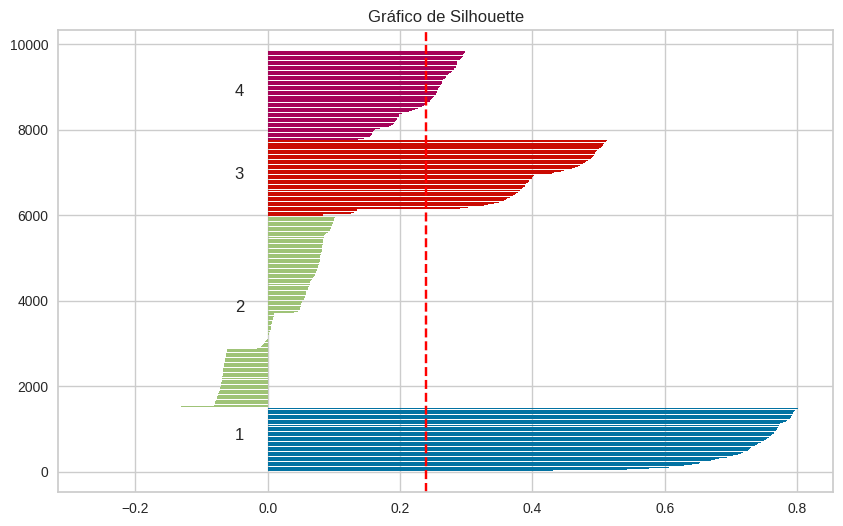

In [ ]:
# Calcular los valores de silhouette para cada punto
silhouette_vals = silhouette_samples(df_cluster_scaled.drop(columns='ClusterJ'), df_cluster_scaled['ClusterJ'])

# Configuración de la figura
fig, ax = plt.subplots(figsize=(10, 6))
y_lower = 10 # Para controlar la posición inicial de la gráfica
for i in sorted(df_cluster_scaled['ClusterJ'].unique()):
    cluster_vals = silhouette_vals[df_cluster_scaled['ClusterJ'] == i]
    cluster_vals.sort() # Ordenar valores para visualizar mejor
    y_upper = y_lower + len(cluster_vals)
    ax.barh(range(y_lower, y_upper), cluster_vals)
    ax.text(-0.05, y_lower + 0.5 * len(cluster_vals), str(i)) # Etiqueta del cluster
    y_lower = y_upper + 10 # Espaciado entre clusters

# Configurar la línea promedio de silhouette
ax.axvline(silhouette_vals.mean(), color="red", linestyle="--")
ax.set_title("Gráfico de Silhouette")
plt.show()



**Evaluacion del tamaño de los clusters**

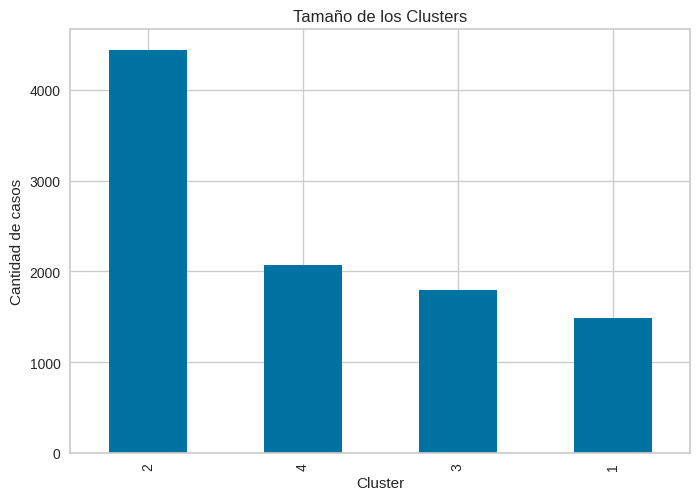

,count
ClusterJ,
2,4444
4,2075
3,1795
1,1486


In [ ]:
# Tamaño de los clusters
df_cluster_scaled['ClusterJ'].value_counts().plot(kind="bar")
plt.title("Tamaño de los Clusters")
plt.xlabel("Cluster")
plt.ylabel("Cantidad de casos")
plt.show()
df_cluster_scaled['ClusterJ'].value_counts()

# Aca ya puedo ver un principal problema de porque nos da asi. Que este desbalanceado no esta completamente mal pero es un primer warning.

**Medias de las variables métricas para cada cluster**

In [ ]:
num_vars = [
    'Delivery_Days',
    'Customer_Total_Sales',
    'Customer_Avg_Sales',
    'Customer_Num_Orders'
]

cluster_means = df_con_clusters.groupby('ClusterJ')[num_vars].mean().round(3)
display(cluster_means)

,Delivery_Days,Customer_Total_Sales,Customer_Avg_Sales,Customer_Num_Orders
ClusterJ,,,,
1,4.028,3358.594,217.733,7.241
2,3.973,3521.295,225.862,7.232
3,3.918,3719.768,245.190,7.282
4,3.925,3640.710,238.140,7.227


Conclusion:El modelo de clustering jerárquico presenta un coeficiente de Silhouette de 0.2236 y un índice de Davies–Bouldin de 1.6068, lo que refleja una segmentación débil y con alto solapamiento entre grupos. El bajo valor de Silhouette indica que los datos dentro de cada cluster no son muy similares entre sí y que, en promedio, los límites entre grupos no están bien definidos. A su vez, el índice de Davies–Bouldin por encima de 1 confirma que los clusters están poco separados y dispersos internamente, generando fronteras difusas y baja cohesión. En síntesis, este modelo de jerarquización no logra una estructura de segmentación clara ni bien diferenciada, por lo que su capacidad para identificar patrones o perfiles consistentes entre observaciones es limitada en comparación con métodos como K-Means o GMM, que ofrecieron métricas más sólidas y una mejor calidad de agrupamiento.

# SERIES DE TIEMPO

## Preparacion para el analisis:

**Importar librerias necesarias**

In [ ]:
!pip install scipy==1.11.4
!pip install numpy==1.26.4
!pip install statsmodels==0.14.1
!pip install pmdarima==2.0.4

  Using cached statsmodels-0.14.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.5 kB)
Using cached statsmodels-0.14.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.7 MB)
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.14.5
    Uninstalling statsmodels-0.14.5:
      Successfully uninstalled statsmodels-0.14.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.1 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.11.4 which is incompatible.
  Using cached statsmodels-0.14.5-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (9.5 kB)
Using cached statsmodels-0.14.5-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl (10.4 MB)
ERROR: pip's dependency resolver does not currently take into accoun

In [ ]:
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf


In [ ]:
#Traemos el df que habiamos copiado sin manipular para trabajar con series de tiempo
df_SeriesDeTiempo.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


**Configuramos la columna OrderDate como indice**

In [ ]:
#Ordeno los registros por fecha
df_SeriesDeTiempo.sort_values(by=['Order Date'], inplace=True, ascending=True)

# Configuramos esa columna como índice:
df_SeriesDeTiempo.set_index('Order Date', inplace=True)

# Agrupar por mes y sumar las ventas
ventas_mensuales = df_SeriesDeTiempo['Sales'].resample('ME').sum()

## Visualizacion de la serie temporal

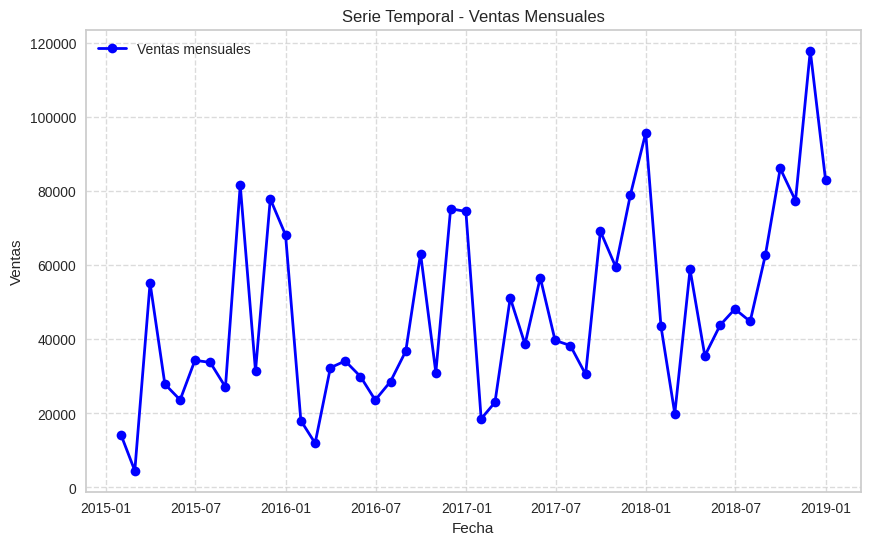

In [ ]:
# Graficar la serie temporal original
plt.figure(figsize=(10, 6))
plt.plot(ventas_mensuales.index, ventas_mensuales.values, label='Ventas mensuales', color='blue', marker='o', linewidth=2)
plt.title('Serie Temporal - Ventas Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Tendencia ascendente:
Las ventas tienden a crecer con el tiempo, especialmente hacia 2018.
Esto indica que hay una tendencia positiva de largo plazo.

Picos regulares en diciembre / enero:
Se repiten aumentos fuertes más o menos en las mismas fechas cada año.
Eso sugiere estacionalidad anual (por ejemplo, efecto de fin de año o campañas comerciales)

**Descomposición de la serie temporal:**

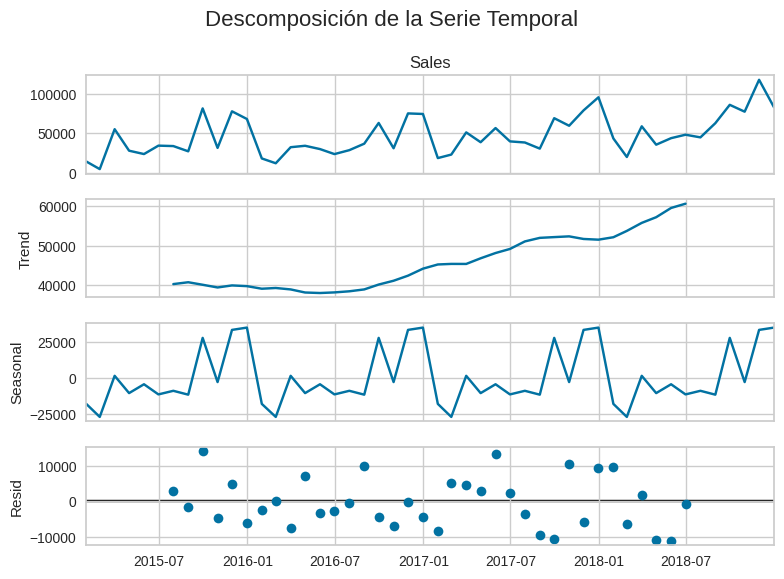

In [ ]:
# Descomponer la serie temporal usando el período estimado
decomposition = seasonal_decompose(ventas_mensuales, model='additive', period=12)
# Usamos 12 meses como periodo porque tiene estacionalidad anual

# Graficar la descomposición
decomposition.plot().suptitle('Descomposición de la Serie Temporal', fontsize=16, y=1.05)
plt.show()

Sales (serie original):
Es la serie completa de ventas mensuales tal como la observamos, con todas las fluctuaciones.
→ Se ve una tendencia ascendente y variaciones repetidas año a año.

Trend (tendencia):
Representa el comportamiento de largo plazo.
→ Acá se observa un crecimiento sostenido de las ventas hacia 2018.
→ Refleja que el negocio está en expansión.

Seasonal (estacionalidad):
Muestra los patrones que se repiten en el tiempo.
→ Hay picos regulares alrededor de noviembre-diciembre, lo que confirma una estacionalidad anual (ventas más altas en fin de año).

Resid (residuos):
Lo que no explica ni la tendencia ni la estacionalidad.
→ Son variaciones aleatorias (ruido) sin patrón definido.
→ Cuanto más pequeñas y distribuidas sean, más estable es el modelo.

## Analizamos si la serie de tiempo es estacionaria

Una serie es estacionaria cuando su media y varianza no cambian con el tiempo. A partir de la distribución de ventas anterior, no está claro si es estacionaria o no. A continuacion realizamos algunas pruebas de estacionariedad para comprobar si la serie temporal es estacionaria o no.

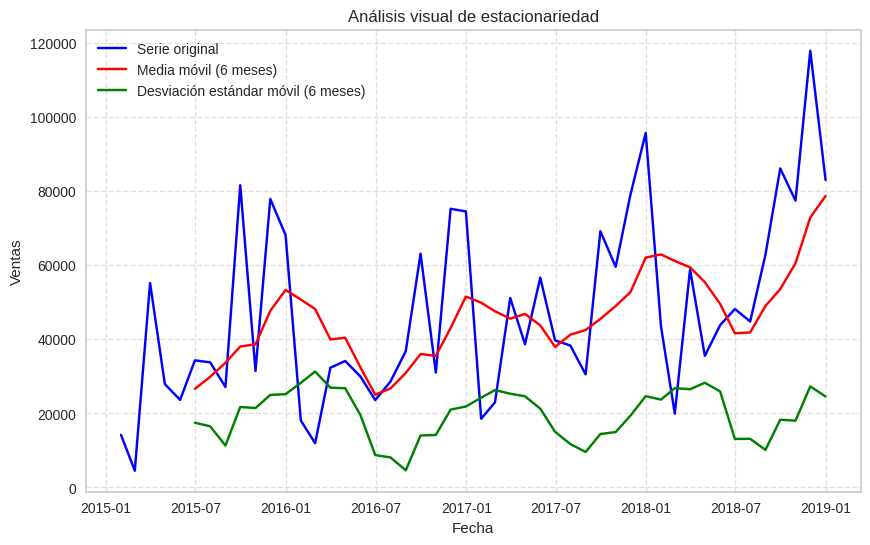

📊 Comparación de medias y varianzas por tramo:

Media: 38237.80, 53222.39, 65865.45
Varianza: 464948140.85, 545058302.08, 641164717.15

🧮 Resultado del test ADF:
ADF Statistic: -4.4161
p-value: 0.0003
Critical Value (1%): -3.5778
Critical Value (5%): -2.9253
Critical Value (10%): -2.6008

✅ La serie es estacionaria (rechazamos H₀ de raíz unitaria).


In [ ]:
from statsmodels.tsa.stattools import adfuller
# 1️⃣ --- Análisis visual: media y varianza móviles ---
rolling_mean = ventas_mensuales.rolling(window=6).mean()   # promedio móvil de 6 meses
rolling_std = ventas_mensuales.rolling(window=6).std()     # desviación estándar móvil

plt.figure(figsize=(10,6))
plt.plot(ventas_mensuales, color='blue', label='Serie original')
plt.plot(rolling_mean, color='red', label='Media móvil (6 meses)')
plt.plot(rolling_std, color='green', label='Desviación estándar móvil (6 meses)')
plt.title('Análisis visual de estacionariedad')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 2️⃣ --- Comparar medias y varianzas por tramos ---
n = len(ventas_mensuales)
train = ventas_mensuales[:int(n*0.6)]
test = ventas_mensuales[int(n*0.6):int(n*0.8)]
validate = ventas_mensuales[int(n*0.8):]

mean1, mean2, mean3 = train.mean(), test.mean(), validate.mean()
var1, var2, var3 = train.var(), test.var(), validate.var()

print("📊 Comparación de medias y varianzas por tramo:\n")
print(f"Media: {mean1:.2f}, {mean2:.2f}, {mean3:.2f}")
print(f"Varianza: {var1:.2f}, {var2:.2f}, {var3:.2f}")

# 3️⃣ --- Test de Dickey-Fuller Aumentado (ADF) ---
resultado = adfuller(ventas_mensuales.dropna())

print("\n🧮 Resultado del test ADF:")
print(f"ADF Statistic: {resultado[0]:.4f}")
print(f"p-value: {resultado[1]:.4f}")

for key, value in resultado[4].items():
    print(f"Critical Value ({key}): {value:.4f}")

if resultado[1] < 0.05:
    print("\n✅ La serie es estacionaria (rechazamos H₀ de raíz unitaria).")
else:
    print("\n❌ La serie NO es estacionaria (no se rechaza H₀).")

A partir de los valores anteriores de media y varianza, se puede inferir que no hay mucha diferencia entre los tres valores, lo que indica que la serie es estacionaria. Sin embargo, para verificar nuestras observaciones, realicemos una prueba de estacionariedad estándar, denominada prueba de Dickey-Fuller aumentada.

Ahora que sabemos que nuestra serie temporal es estacionaria, comencemos con el entrenamiento del modelo para pronosticar las ventas.

## Creamos el modelo autoARIMA:

In [ ]:
# Ajustar el modelo autoARIMA:
model = auto_arima(ventas_mensuales, seasonal=True, m=12)
    ## seasonal=True especifica que la serie temporal tiene un componente estacionaria.
    ## m=period define la periodicidad estacional (estamos utilizando el definido automaticamente antes, pero podríamos establecerlo de forma manual).

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all

In [ ]:
# Resumen del modelo:
print(model.summary())
    ## AIC, BIC y HQIC son métricas para evaluar la calidad del modelo (cuanto menor sean, mejor será el modelo).
       ### Los valores de AIC, BIC y HQIC no están estandarizados, es decir, no existe un valor “bueno” o “malo” absoluto.
       ### Se usan solo para comparar modelos entre sí:
       ### El modelo con el menor valor (AIC, BIC o HQIC) es el que mejor balancea ajuste y simplicidad.
    ## P>|z| (p-valor) indica la significancia de los coeficientes y, por ende, del modelo.

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   48
Model:             SARIMAX(2, 1, 0)x(1, 0, 0, 12)   Log Likelihood                -531.958
Date:                            Wed, 05 Nov 2025   AIC                           1071.915
Time:                                    07:05:15   BIC                           1079.316
Sample:                                01-31-2015   HQIC                          1074.700
                                     - 12-31-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6051      0.215     -2.816      0.005      -1.026      -0.184
ar.L2         -0.2364      0.209   

## Visualización del comportamiento de la serie temporal junto con las predicciones:

In [ ]:
# Predicciones para los siguientes 12 períodos:
future_forecast = model.predict(n_periods=12)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



In [ ]:
# Crear DataFrame con las predicciones:

forecast_index = pd.date_range(start=ventas_mensuales.index[-1] + pd.DateOffset(months=1), periods=12, freq='ME')
  ## Generamos un rango de fechas que representará los próximos 12 períodos (meses)
     ### start=df.index[-1] toma la última fecha del índice del DataFrame, a la que le vamos a sumar los meses referidos a las predicciones futuras.
     ### months=1 significa “sumar un mes al último valor del índice del DataFrame df”.
     ### freq="ME" indica que los pronósticos se establecerán, en cuanto a fechas, al inicio de cada mes (Month END)

forecast_df = pd.DataFrame({'Periodo': forecast_index, 'Predicted_Ventas': future_forecast})
  ## Creamos un nuevo dataset con estos datos.

forecast_df.set_index('Periodo', inplace=True)
  ## Establecemos la columna 'Periodo' como índice del DataFrame

forecast_df

,Predicted_Ventas
Periodo,
2019-01-31,71457.294751
2019-02-28,55170.675698
2019-03-31,75354.273330
2019-04-30,63712.967935
2019-05-31,68065.122556
2019-06-30,70562.386142
2019-07-31,68781.958294
2019-08-31,79738.550996
2019-09-30,94101.274958


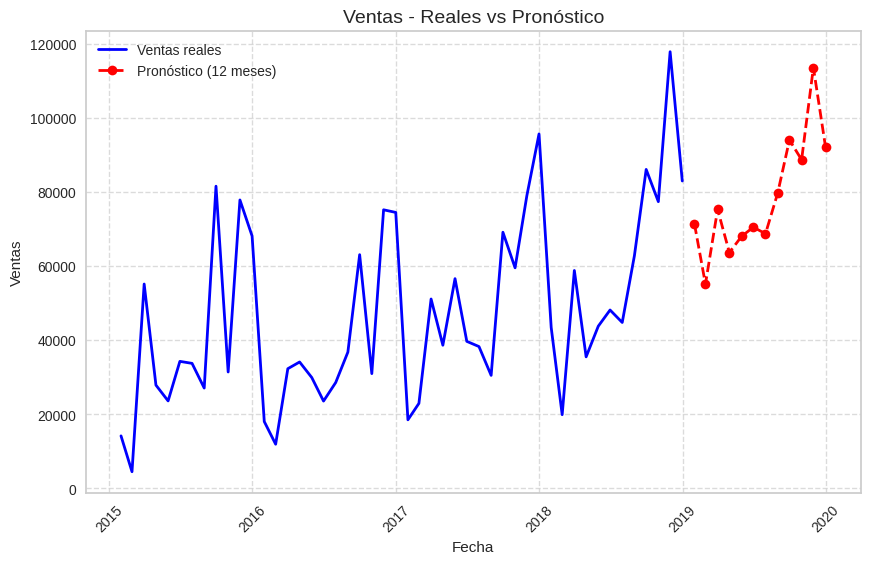

In [ ]:
plt.figure(figsize=(10, 6))
# Serie original (ventas mensuales)
plt.plot(ventas_mensuales.index, ventas_mensuales.values,
         label='Ventas reales', color='blue', linewidth=2)
# Pronóstico (línea roja discontinua)
plt.plot(forecast_df.index, forecast_df['Predicted_Ventas'],
         label='Pronóstico (12 meses)', color='red', linestyle='--', linewidth=2, marker='o')
# Título y formato
plt.title('Ventas - Reales vs Pronóstico', fontsize=14)
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

## Comparamos resultados con métodos de promedios móviles y suavizamiento exponencial.


### Modelo de promedios moviles

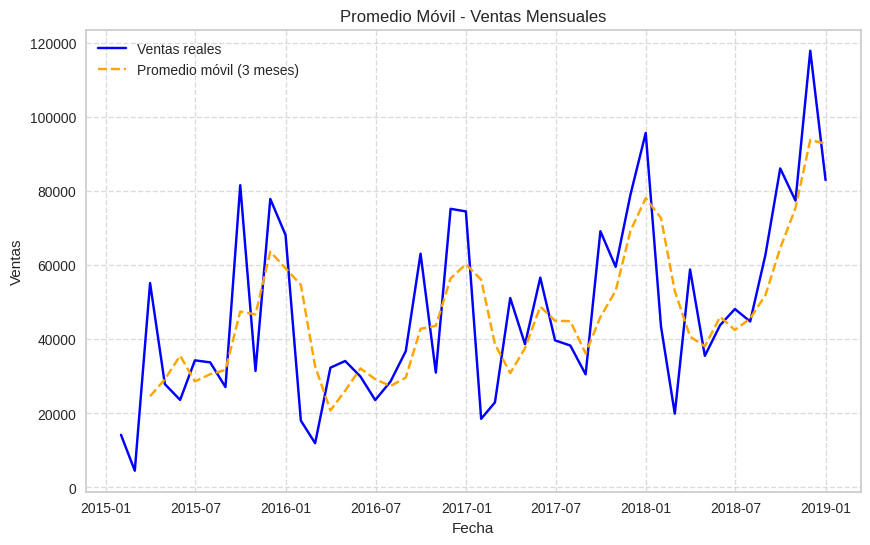

In [ ]:
# PROMEDIO MÓVIL - baseline simple
window = 3  # por ejemplo, promedio de los últimos 12 meses

# Pronóstico (rolling mean de la serie)
rolling_forecast = ventas_mensuales.rolling(window=window).mean()

# Gráfico
plt.figure(figsize=(10,6))
plt.plot(ventas_mensuales.index, ventas_mensuales.values, label='Ventas reales', color='blue')
plt.plot(rolling_forecast.index, rolling_forecast.values, label=f'Promedio móvil ({window} meses)', color='orange', linestyle='--')
plt.title('Promedio Móvil - Ventas Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [ ]:
rolling_pred = np.mean(ventas_mensuales[-window:])
print(f"Promedio móvil predicho (para el próximo mes): {rolling_pred:.2f}")

Promedio móvil predicho (para el próximo mes): 92805.56


### Modelo de Suavizamiento Exponencial Simple (SES)

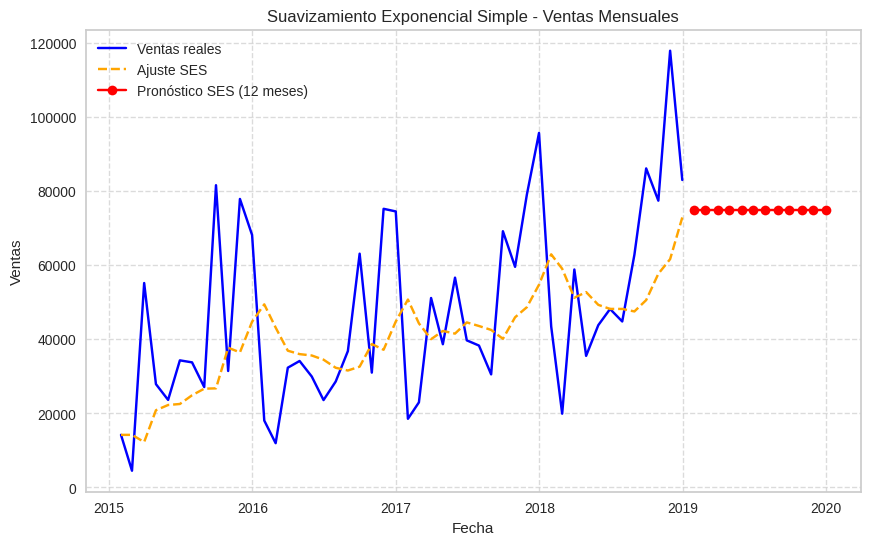

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Ajuste del modelo
ses_model = SimpleExpSmoothing(ventas_mensuales).fit(smoothing_level=0.2, optimized=False)

# Predicciones (por ejemplo, 12 meses)
ses_forecast = ses_model.forecast(12)

# Gráfico
plt.figure(figsize=(10,6))
plt.plot(ventas_mensuales.index, ventas_mensuales.values, label='Ventas reales', color='blue')
plt.plot(ses_model.fittedvalues, label='Ajuste SES', color='orange', linestyle='--')
plt.plot(ses_forecast.index, ses_forecast.values, label='Pronóstico SES (12 meses)', color='red', marker='o')
plt.title('Suavizamiento Exponencial Simple - Ventas Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Evaluar y comparar los 3 modelos

In [ ]:
# Dividir datos
train = ventas_mensuales[:-12]
test = ventas_mensuales[-12:]

# Predicciones de cada modelo
arima_pred = model.predict(n_periods=12)
ses_pred = ses_model.forecast(12)
rolling_pred = np.repeat(np.mean(train[-3:]), 12)

# Función de evaluación
def evaluar(y_true, y_pred, nombre):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{nombre}: MAE={mae:.2f}, RMSE={rmse:.2f}")

evaluar(test, arima_pred, "AutoARIMA")
evaluar(test, ses_pred, "Suavizamiento Exponencial")
evaluar(test, rolling_pred, "Promedio Móvil")

AutoARIMA: MAE=19004.41, RMSE=21079.25
Suavizamiento Exponencial: MAE=25569.01, RMSE=29733.99
Promedio Móvil: MAE=26747.35, RMSE=31442.59


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



AutoARIMA es claramente el mejor modelo
Logra un equilibrio entre precisión y capacidad de capturar los patrones temporales de la serie.

SES y Promedio móvil sirven como modelos base o de comparación, pero son más limitados:

SES suaviza el ruido pero no aprende patrones.

El promedio móvil solo repite el promedio reciente.